<a href="https://colab.research.google.com/github/Sushrut0202/CIIMS/blob/main/Combined_AMR_Year_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ONE HEALTH AMR SURVEILLANCE ANALYSIS
Upload your Human AMR data file:


Saving Human Samples.xlsx to Human Samples (4).xlsx

Upload your Animal AMR data file:


Saving Animal Samples.xlsx to Animal Samples (2).xlsx

Upload your Environmental AMR data file:


Saving Enviormental Samples.xlsx to Enviormental Samples (2).xlsx

✓ Data loaded successfully!
Total samples: 1451
Human: 696, Animal: 469, Environment: 295

GENERATING VISUALIZATIONS

1. Resistance by Location/Farm and Antibiotic Class (All Sources)


/tmp/ipython-input-3153000864.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)


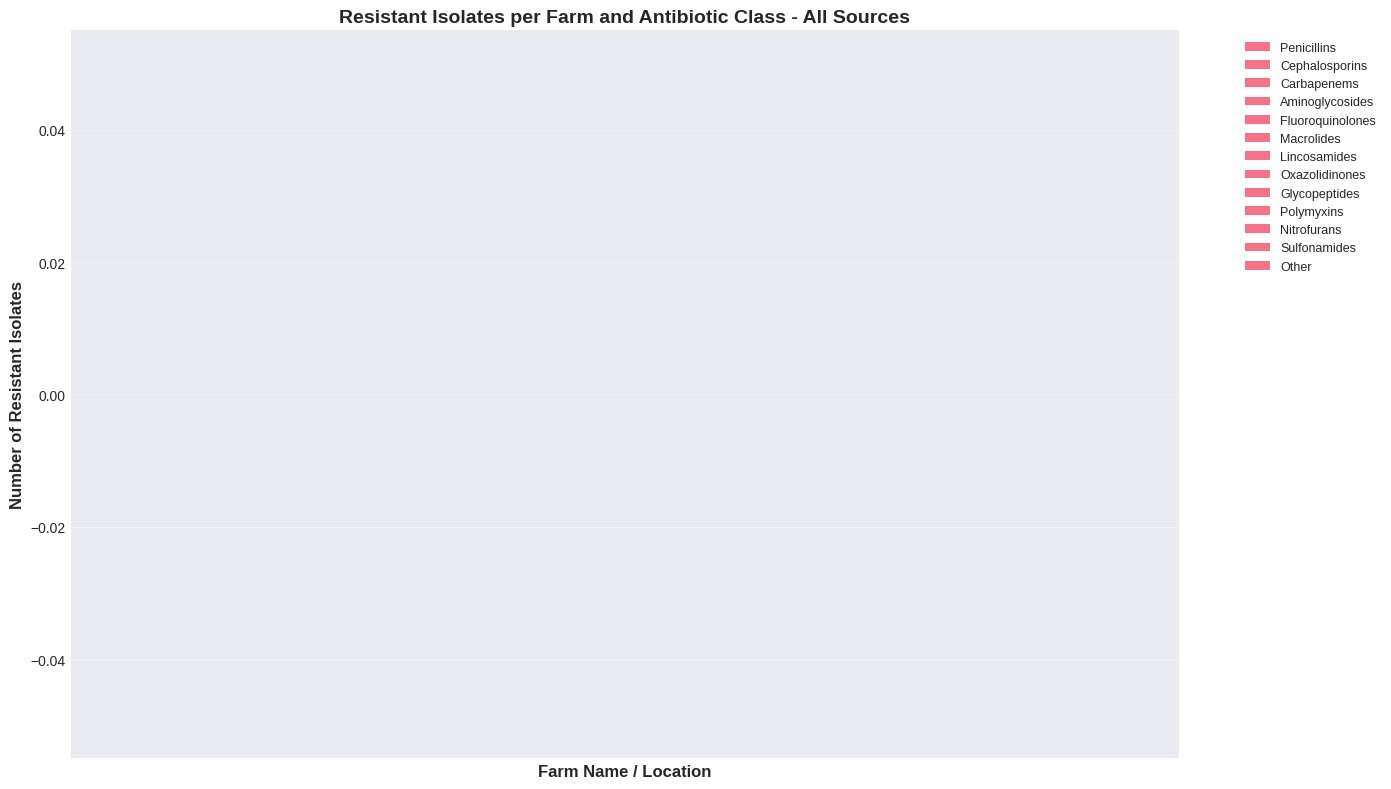


2. Resistance by Pathogen and Antibiotic Class (All Sources)


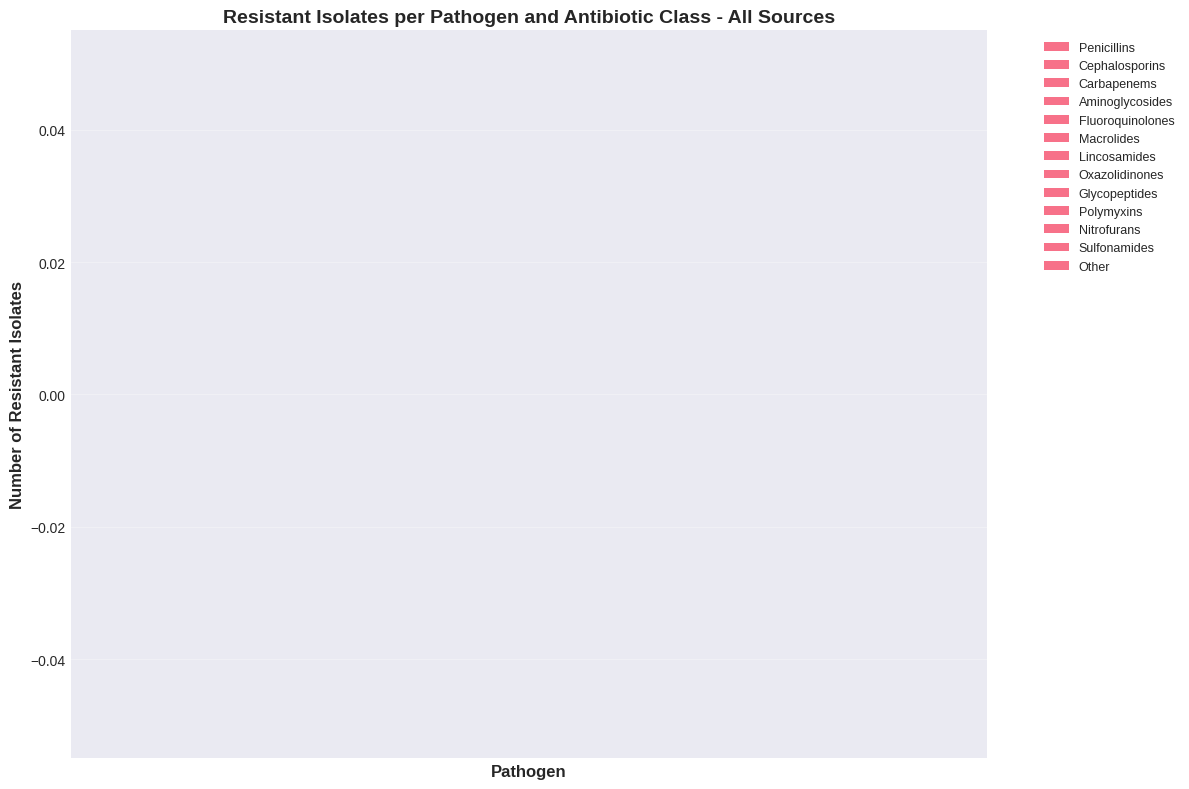


3. One Health Comparison: Resistance by Source


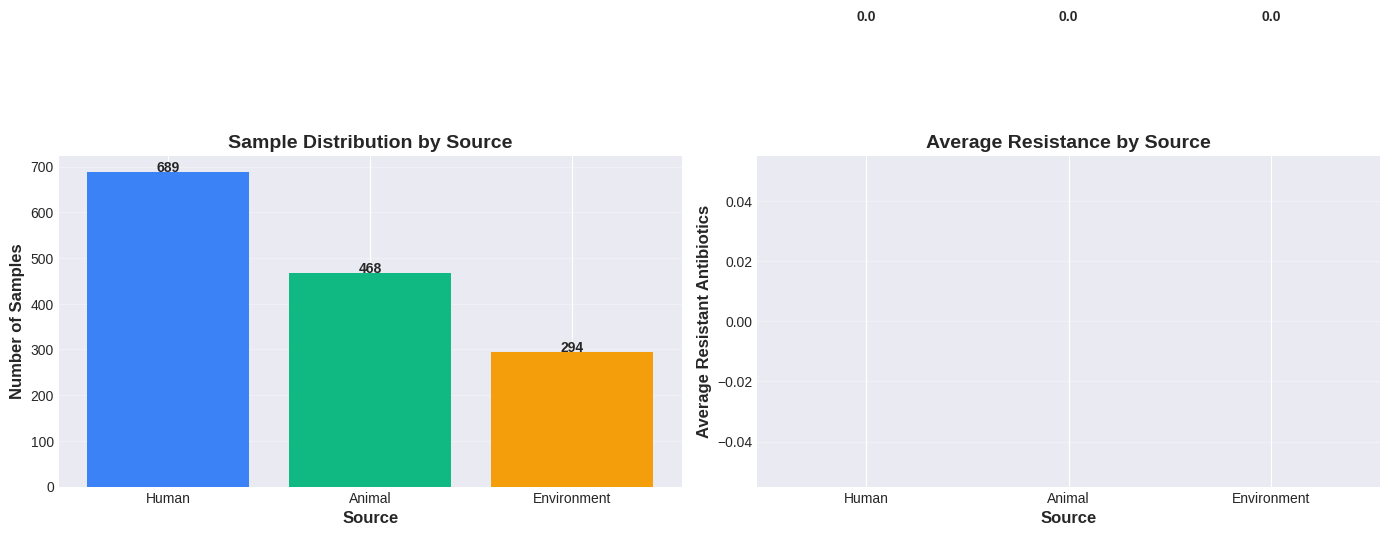


4. Multi-Drug Resistance (MDR) Analysis


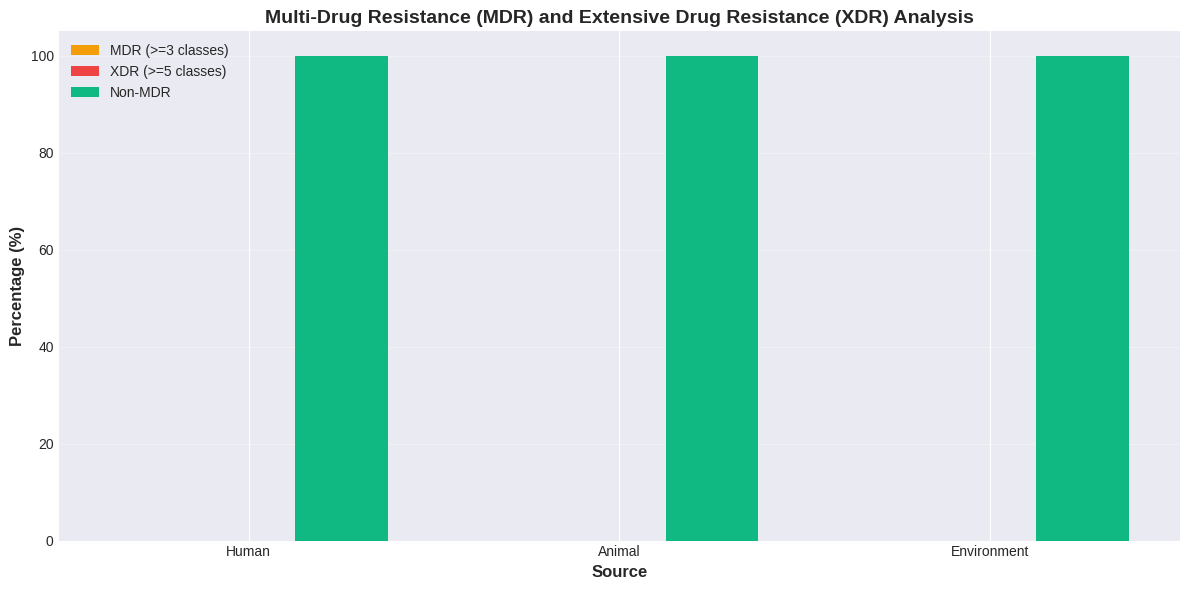


MDR/XDR Summary:
     Source  MDR (%)  XDR (%)  Non-MDR (%)
      Human      0.0      0.0        100.0
     Animal      0.0      0.0        100.0
Environment      0.0      0.0        100.0

5. Geographic Distribution of Resistance


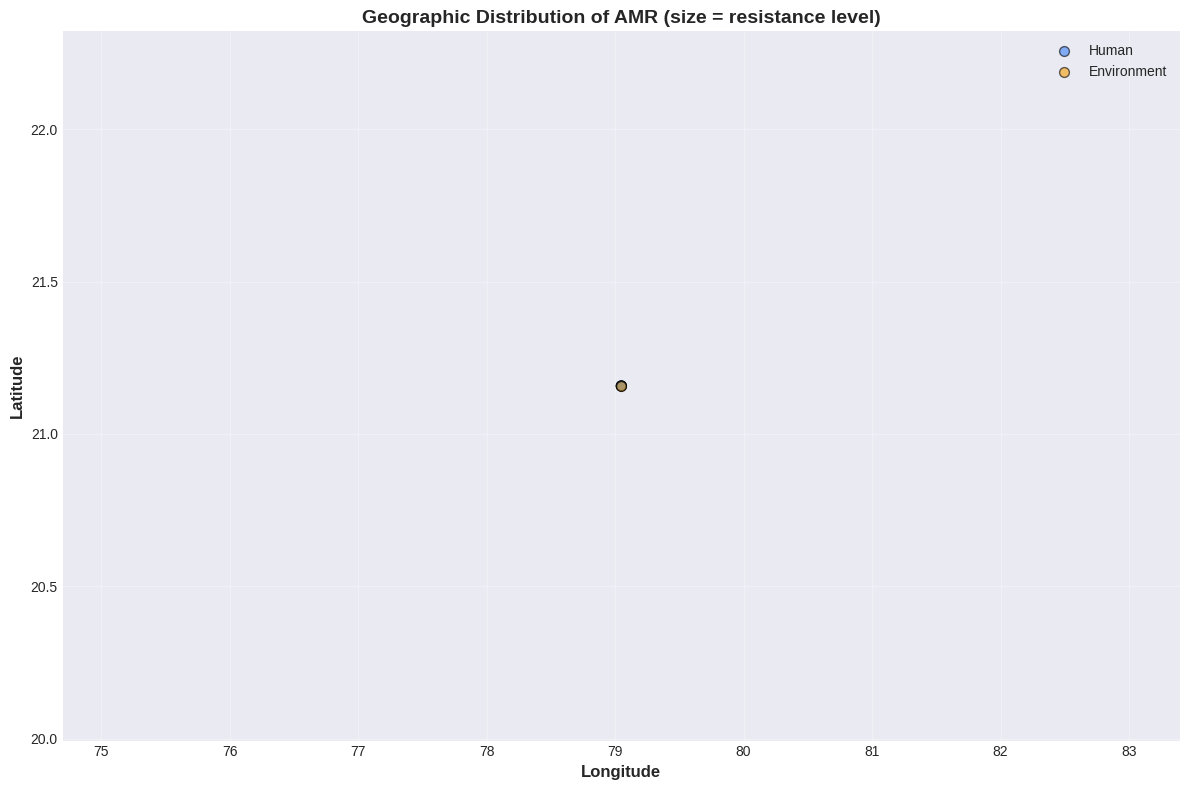


6. Resistance Heatmap
No pathogens or relevant antibiotic resistance data found for heatmap.

SOURCE-SPECIFIC ANALYSES

7. Human Samples - Resistance by Location


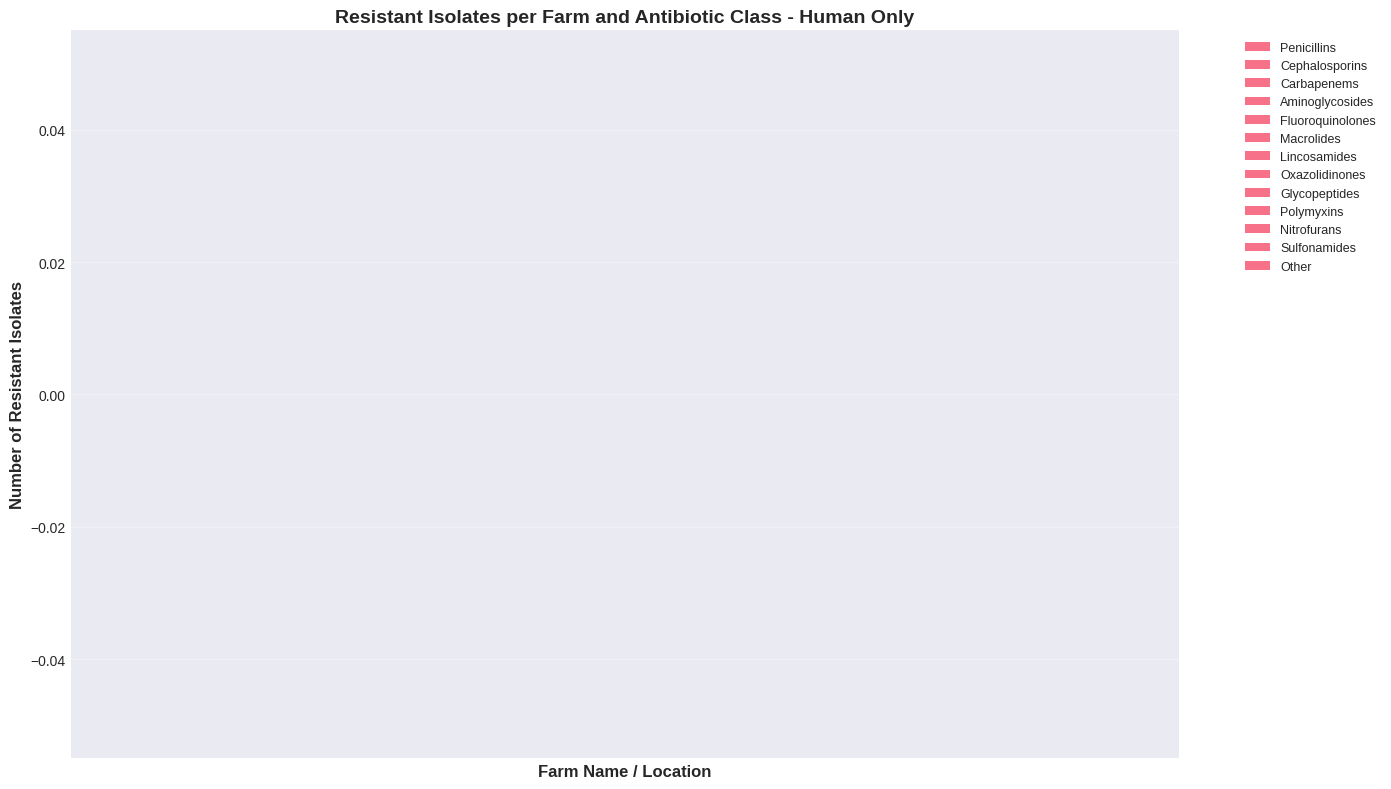


8. Human Samples - Resistance by Pathogen


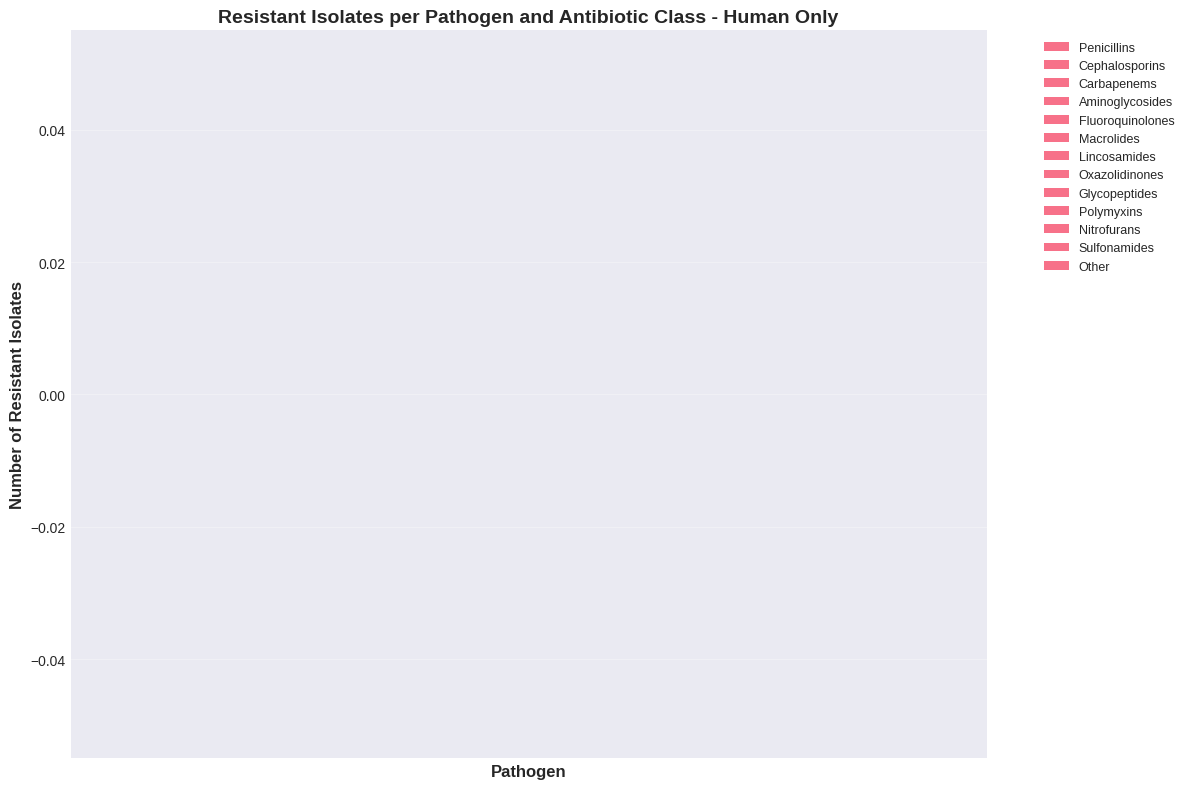


9. Animal Samples - Resistance by Location


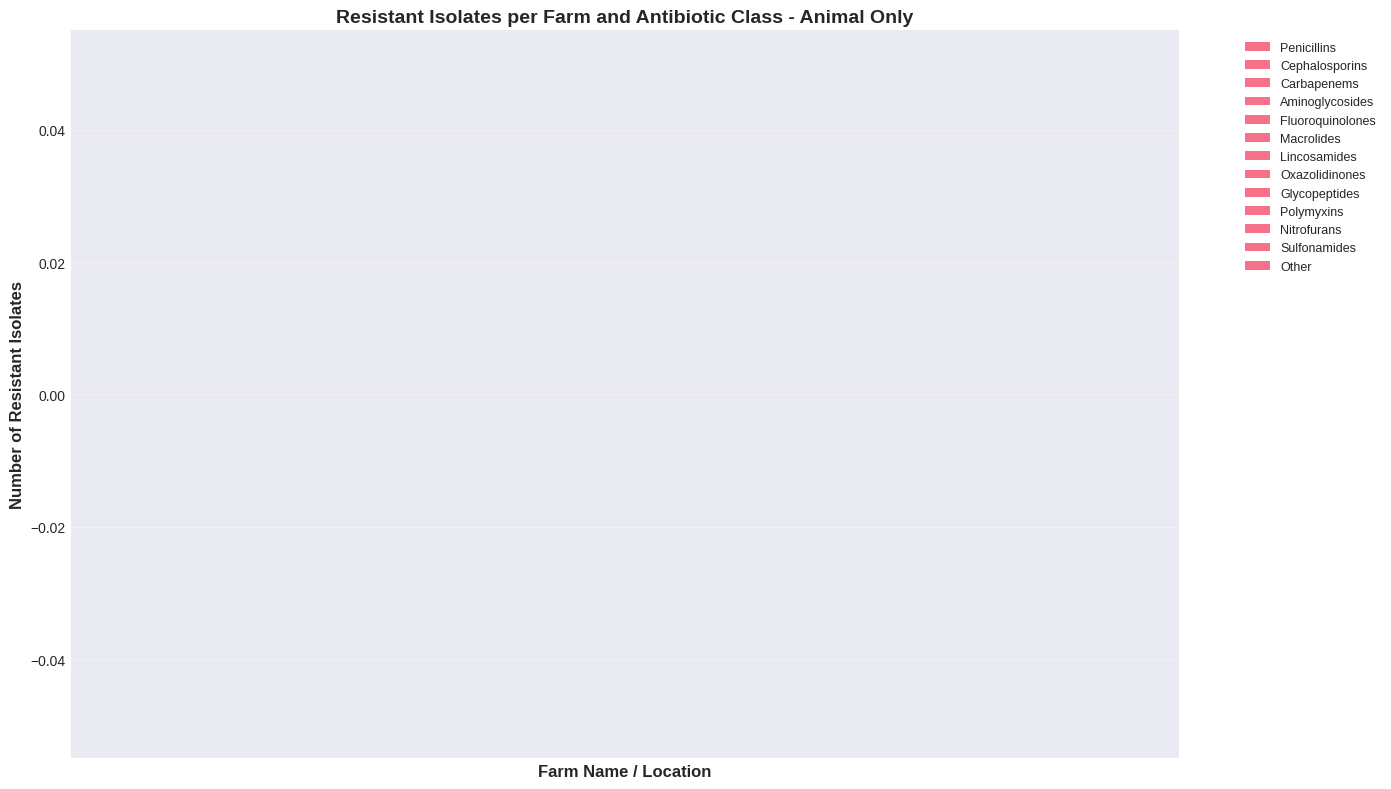


10. Animal Samples - Resistance by Pathogen


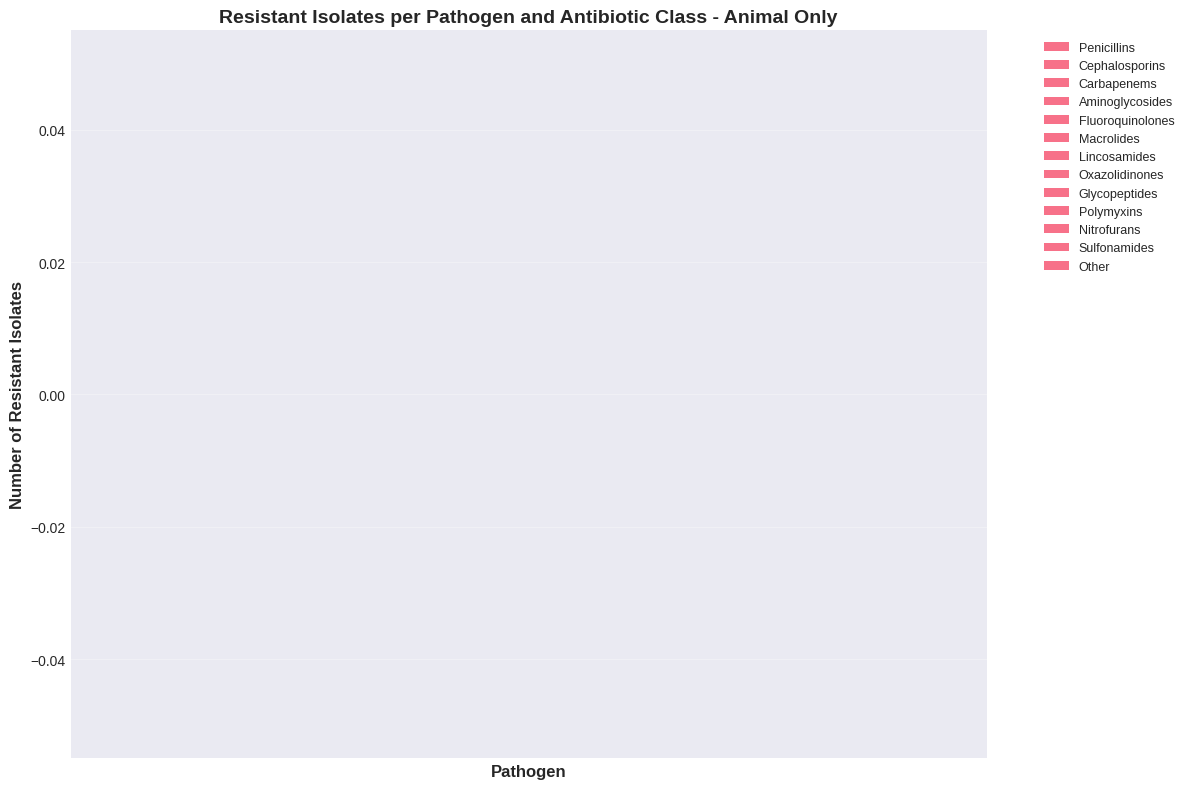


11. Environmental Samples - Resistance by Location


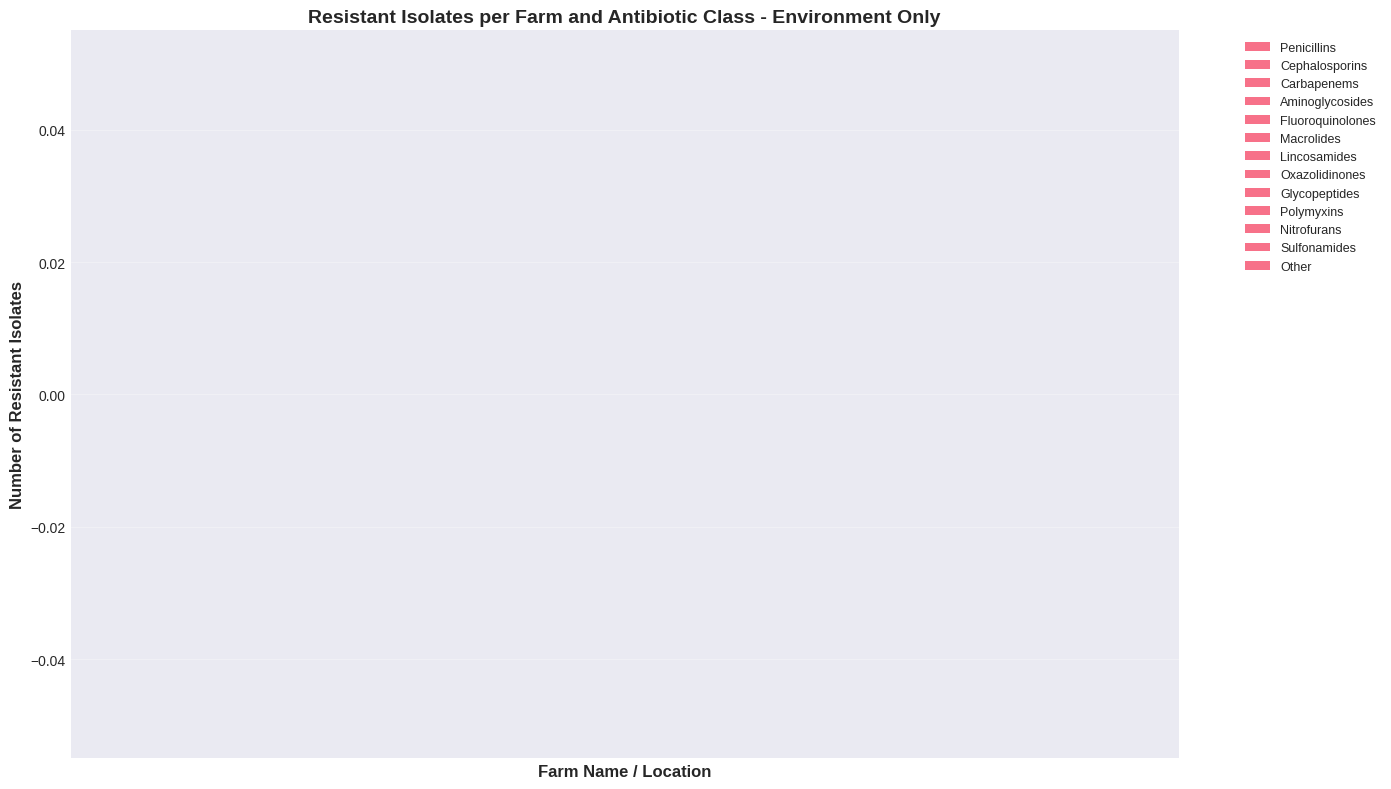


12. Environmental Samples - Resistance by Pathogen


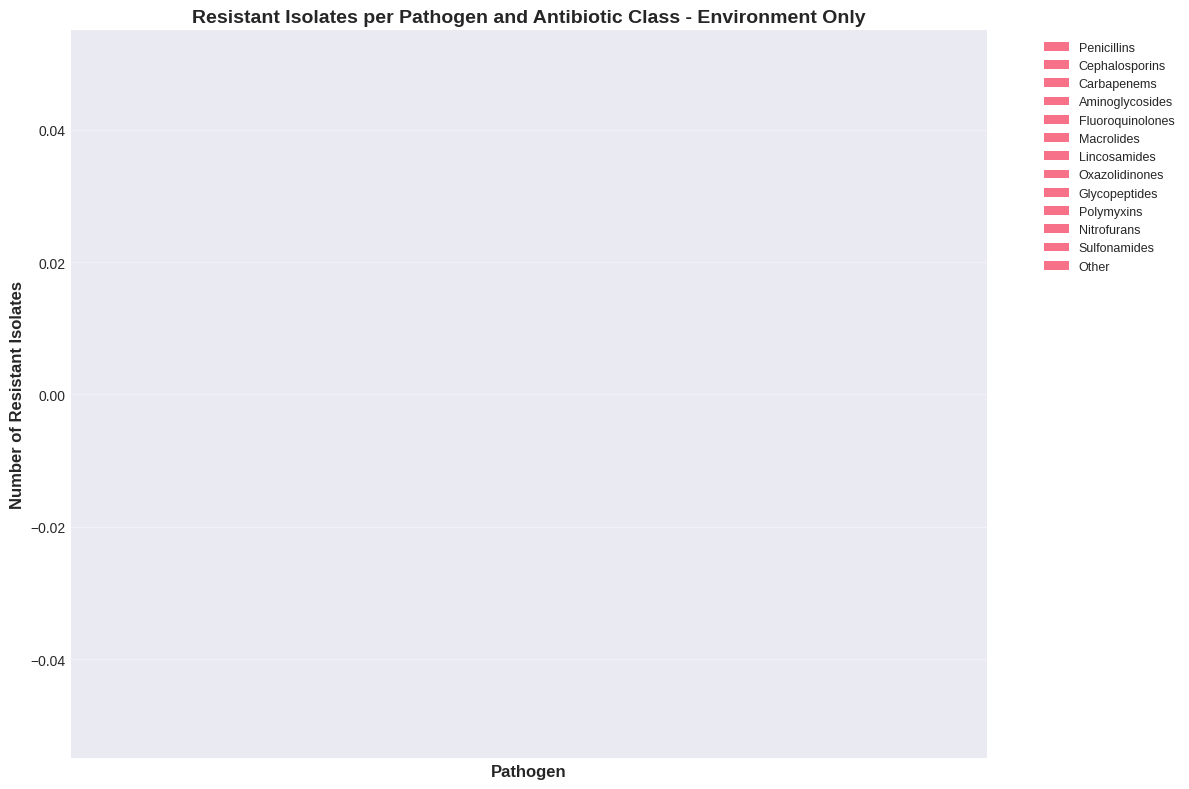


ANALYSIS COMPLETE!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ====================
# 1. DATA LOADING
# ====================

def load_amr_data():
    """Upload and load Human, Animal, and Environmental AMR data"""
    print("Upload your Human AMR data file:")
    uploaded_human = files.upload()
    human_file = list(uploaded_human.keys())[0]
    human_df = pd.read_excel(io.BytesIO(uploaded_human[human_file]))
    human_df['Source'] = 'Human'

    print("\nUpload your Animal AMR data file:")
    uploaded_animal = files.upload()
    animal_file = list(uploaded_animal.keys())[0]
    animal_df = pd.read_excel(io.BytesIO(uploaded_animal[animal_file]))
    animal_df['Source'] = 'Animal'

    print("\nUpload your Environmental AMR data file:")
    uploaded_env = files.upload()
    env_file = list(uploaded_env.keys())[0]
    env_df = pd.read_excel(io.BytesIO(uploaded_env[env_file]))
    env_df['Source'] = 'Environment'

    # Combine all data
    combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)

    # Remove rows without pathogen data
    combined_df = combined_df[combined_df['Pathogen'].notna() & (combined_df['Pathogen'] != '')]

    print(f"\n✓ Data loaded successfully!")
    print(f"Total samples: {len(combined_df)}")
    print(f"Human: {len(human_df)}, Animal: {len(animal_df)}, Environment: {len(env_df)}")

    return combined_df, human_df, animal_df, env_df

# ====================
# 2. ANTIBIOTIC CLASS MAPPING
# ====================

antibiotic_classes = {
    'Penicillins': ['Amoxycillin/Clavulanic acid', 'Benzylpenicillin', 'Piperacillin/Tazobactum'],
    'Cephalosporins': ['Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum',
                       'Cefepime', 'Cefoxitin', 'Ceftazidime'],
    'Carbapenems': ['Entrapenum', 'Imipenum', 'Meropenem', 'Metropenem'],
    'Aminoglycosides': ['Amikacin', 'Gentamicin', 'Gentamycin', 'Gentamicin High Level (synergy)'],
    'Fluoroquinolones': ['Ciprofloxacin', 'Levofloxacin'],
    'Macrolides': ['Erythromycin'],
    'Lincosamides': ['Clindamycin'],
    'Oxazolidinones': ['Linezolid'],
    'Glycopeptides': ['Vanomycin', 'Teicoplanin'],
    'Polymyxins': ['Colistin'],
    'Nitrofurans': ['Nitrofurantoin'],
    'Sulfonamides': ['Trimethoprim/Sulfmaethozole', 'Trimethoprim/Sulfamethoxazole'],
    'Other': ['Tigecycline', 'Fosfomycin', 'Rifampicin', 'Tetracyclin', 'Daptomycin',
              'Aztreonam', 'Minocyclin', 'Minocycline', 'Beta-lactamase', 'Oxacillin']
}

# Flatten to get all antibiotics
all_antibiotics = [ab for abs in antibiotic_classes.values() for ab in abs]

# ====================
# HELPER FUNCTION: CALCULATE RESISTANCE COUNT
# ====================
def calculate_resistance_count(df, all_antibiotics):
    """Calculates the number of resistant antibiotics for each sample."""
    df['RESISTANT_COUNT'] = 0
    for antibiotic in all_antibiotics:
        if antibiotic in df.columns:
            df['RESISTANT_COUNT'] += (df[antibiotic] == 'R').astype(int)
    return df

# ====================
# 3. VISUALIZATION 1: RESISTANT ISOLATES PER FARM/LOCATION AND ANTIBIOTIC CLASS
# ====================

def plot_resistance_by_location_and_class(df, title_suffix=''):
    """Similar to your original Colab visualization"""

    # Get unique locations (Farm Name or Sample Code)
    df['Location'] = df['Farm Name'].fillna(df['Sample Code'])

    # Count resistant antibiotics by class for each location
    resistance_data = []

    for location in df['Location'].unique():
        location_df = df[df['Location'] == location]
        row_data = {'Location': location}

        for class_name, antibiotics in antibiotic_classes.items():
            resistant_count = 0
            for antibiotic in antibiotics:
                if antibiotic in location_df.columns:
                    resistant_count += (location_df[antibiotic] == 'R').sum()
            row_data[class_name] = resistant_count

        resistance_data.append(row_data)

    resistance_df = pd.DataFrame(resistance_data)

    # Filter out locations with no resistance
    resistance_df['Total'] = resistance_df[list(antibiotic_classes.keys())].sum(axis=1)
    resistance_df = resistance_df[resistance_df['Total'] > 0].sort_values('Total', ascending=False).head(10)

    # Plot
    fig, ax = plt.subplots(figsize=(14, 8))

    x = np.arange(len(resistance_df))
    width = 0.8
    bottom = np.zeros(len(resistance_df))

    colors = plt.cm.Set3(np.linspace(0, 1, len(antibiotic_classes)))

    for idx, (class_name, color) in enumerate(zip(antibiotic_classes.keys(), colors)):
        values = resistance_df[class_name].values
        bars = ax.bar(x, values, width, label=class_name, bottom=bottom, color=color)

        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, values)):
            if val > 0:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., bottom[i] + height/2.,
                       f'{int(val)}', ha='center', va='center', fontsize=8, fontweight='bold')

        bottom += values

    ax.set_xlabel('Farm Name / Location', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')
    ax.set_title(f'Resistant Isolates per Farm and Antibiotic Class{title_suffix}',
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(resistance_df['Location'], rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return resistance_df

# ====================
# 4. VISUALIZATION 2: RESISTANT ISOLATES BY PATHOGEN AND ANTIBIOTIC CLASS
# ====================

def plot_resistance_by_pathogen_and_class(df, title_suffix=''):
    """Resistance patterns by pathogen"""

    resistance_data = []

    for pathogen in df['Pathogen'].unique():
        pathogen_df = df[df['Pathogen'] == pathogen]
        row_data = {'Pathogen': pathogen}

        for class_name, antibiotics in antibiotic_classes.items():
            resistant_count = 0
            for antibiotic in antibiotics:
                if antibiotic in pathogen_df.columns:
                    resistant_count += (pathogen_df[antibiotic] == 'R').sum()
            row_data[class_name] = resistant_count

        resistance_data.append(row_data)

    resistance_df = pd.DataFrame(resistance_data)
    resistance_df['Total'] = resistance_df[list(antibiotic_classes.keys())].sum(axis=1)
    resistance_df = resistance_df[resistance_df['Total'] > 0].sort_values('Total', ascending=False)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))

    x = np.arange(len(resistance_df))
    width = 0.8
    bottom = np.zeros(len(resistance_df))

    colors = plt.cm.Set3(np.linspace(0, 1, len(antibiotic_classes)))

    for class_name, color in zip(antibiotic_classes.keys(), colors):
        values = resistance_df[class_name].values
        bars = ax.bar(x, values, width, label=class_name, bottom=bottom, color=color)

        for i, (bar, val) in enumerate(zip(bars, values)):
            if val > 0:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., bottom[i] + height/2.,
                       f'{int(val)}', ha='center', va='center', fontsize=8, fontweight='bold')

        bottom += values

    ax.set_xlabel('Pathogen', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')
    ax.set_title(f'Resistant Isolates per Pathogen and Antibiotic Class{title_suffix}',
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(resistance_df['Pathogen'], rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return resistance_df

# ====================
# 5. VISUALIZATION 3: RESISTANCE BY SOURCE (ONE HEALTH COMPARISON)
# ====================

def plot_resistance_by_source(df):
    """Compare resistance across Human, Animal, and Environment"""

    source_data = []

    for source in ['Human', 'Animal', 'Environment']:
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            continue

        # Use the newly created 'RESISTANT_COUNT' column
        avg_resistant = source_df['RESISTANT_COUNT'].mean()

        source_data.append({
            'Source': source,
            'Samples': len(source_df),
            'Avg_Resistant': avg_resistant
        })

    source_summary = pd.DataFrame(source_data)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Sample counts
    colors = ['#3B82F6', '#10B981', '#F59E0B']
    ax1.bar(source_summary['Source'], source_summary['Samples'], color=colors)
    ax1.set_xlabel('Source', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
    ax1.set_title('Sample Distribution by Source', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)

    for i, (src, count) in enumerate(zip(source_summary['Source'], source_summary['Samples'])):
        ax1.text(i, count + 0.5, str(count), ha='center', fontweight='bold')

    # Plot 2: Average resistance
    ax2.bar(source_summary['Source'], source_summary['Avg_Resistant'], color=colors)
    ax2.set_xlabel('Source', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Average Resistant Antibiotics', fontsize=12, fontweight='bold')
    ax2.set_title('Average Resistance by Source', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)

    for i, (src, res) in enumerate(zip(source_summary['Source'], source_summary['Avg_Resistant'])):
        ax2.text(i, res + 0.1, f'{res:.1f}', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return source_summary

# ====================
# 6. VISUALIZATION 4: MULTI-DRUG RESISTANCE (MDR) ANALYSIS
# ====================

def plot_mdr_analysis(df):
    """Analyze Multi-Drug Resistance (MDR) and Extensive Drug Resistance (XDR)"""

    mdr_data = []

    for source in ['Human', 'Animal', 'Environment']:
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            continue

        mdr_count = 0
        xdr_count = 0

        for idx, row in source_df.iterrows():
            resistant_classes = set()

            for class_name, antibiotics in antibiotic_classes.items():
                for antibiotic in antibiotics:
                    if antibiotic in row and row[antibiotic] == 'R':
                        resistant_classes.add(class_name)
                        break

            if len(resistant_classes) >= 3:
                mdr_count += 1
            if len(resistant_classes) >= 5:
                xdr_count += 1

        total = len(source_df)
        mdr_data.append({
            'Source': source,
            'MDR (%)': (mdr_count / total * 100) if total > 0 else 0,
            'XDR (%)': (xdr_count / total * 100) if total > 0 else 0,
            'Non-MDR (%)': ((total - mdr_count) / total * 100) if total > 0 else 0
        })

    mdr_df = pd.DataFrame(mdr_data)

    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(mdr_df))
    width = 0.25

    ax.bar(x - width, mdr_df['MDR (%)'], width, label='MDR (>=3 classes)', color='#F59E0B')
    ax.bar(x, mdr_df['XDR (%)'], width, label='XDR (>=5 classes)', color='#EF4444')
    ax.bar(x + width, mdr_df['Non-MDR (%)'], width, label='Non-MDR', color='#10B981')

    ax.set_xlabel('Source', fontsize=12, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_title('Multi-Drug Resistance (MDR) and Extensive Drug Resistance (XDR) Analysis',
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(mdr_df['Source'])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\nMDR/XDR Summary:")
    print(mdr_df.to_string(index=False))

    return mdr_df

# ====================
# 7. VISUALIZATION 5: GEOGRAPHIC DISTRIBUTION
# ====================

def plot_geographic_distribution(df):
    """Plot resistance patterns geographically"""

    # Filter for rows with valid coordinates
    geo_df = df[df['Latitude'].notna() & df['Longitude'].notna()].copy()
    geo_df['Latitude'] = pd.to_numeric(geo_df['Latitude'], errors='coerce')
    geo_df['Longitude'] = pd.to_numeric(geo_df['Longitude'], errors='coerce')
    geo_df = geo_df[geo_df['Latitude'].notna() & geo_df['Longitude'].notna()]

    if len(geo_df) == 0:
        print("No geographic data available")
        return

    # Use the newly created 'RESISTANT_COUNT' column
    geo_df['RESISTANT_NUM'] = geo_df['RESISTANT_COUNT'].fillna(0)

    fig, ax = plt.subplots(figsize=(12, 8))

    colors_map = {'Human': '#3B82F6', 'Animal': '#10B981', 'Environment': '#F59E0B'}

    for source in geo_df['Source'].unique():
        source_data = geo_df[geo_df['Source'] == source]
        scatter = ax.scatter(source_data['Longitude'], source_data['Latitude'],
                           s=source_data['RESISTANT_NUM']*50 + 50,
                           c=colors_map[source], alpha=0.6,
                           edgecolors='black', linewidth=1, label=source)

    ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
    ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
    ax.set_title('Geographic Distribution of AMR (size = resistance level)',
                 fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ====================
# 8. VISUALIZATION 6: HEATMAP OF RESISTANCE BY PATHOGEN AND ANTIBIOTIC
# ====================

def plot_resistance_heatmap(df, top_n=15):
    """Create heatmap showing resistance patterns"""

    # Select top antibiotics by resistance frequency
    resistance_counts = {}
    for antibiotic in all_antibiotics:
        if antibiotic in df.columns:
            resistance_counts[antibiotic] = (df[antibiotic] == 'R').sum()

    top_antibiotics = sorted(resistance_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_ab_names = [ab[0] for ab in top_antibiotics]

    # Create matrix
    pathogens = df['Pathogen'].unique()
    matrix_data = []

    for pathogen in pathogens:
        pathogen_df = df[df['Pathogen'] == pathogen]
        row = []
        for antibiotic in top_ab_names:
            if antibiotic in pathogen_df.columns:
                total = len(pathogen_df)
                resistant = (pathogen_df[antibiotic] == 'R').sum()
                percentage = (resistant / total * 100) if total > 0 else 0
                row.append(percentage)
            else:
                row.append(0)
        matrix_data.append(row)

    matrix_df = pd.DataFrame(matrix_data, index=pathogens, columns=top_ab_names)

    # Check if the matrix is empty or has no columns before plotting
    if matrix_df.empty or matrix_df.shape[1] == 0:
        print("No pathogens or relevant antibiotic resistance data found for heatmap.")
        return

    plt.figure(figsize=(14, 8))
    sns.heatmap(matrix_df, annot=True, fmt='.0f', cmap='YlOrRd',
                cbar_kws={'label': 'Resistance Rate (%)'}, linewidths=0.5)
    plt.title('Resistance Heatmap: Pathogen vs Antibiotic (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Antibiotic', fontsize=12, fontweight='bold')
    plt.ylabel('Pathogen', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ====================
# 9. MAIN EXECUTION
# ====================

print("="*60)
print("ONE HEALTH AMR SURVEILLANCE ANALYSIS")
print("="*60)

# Load data
combined_df, human_df, animal_df, env_df = load_amr_data()

# Calculate resistance count for all dataframes
combined_df = calculate_resistance_count(combined_df, all_antibiotics)
human_df = calculate_resistance_count(human_df, all_antibiotics)
animal_df = calculate_resistance_count(animal_df, all_antibiotics)
env_df = calculate_resistance_count(env_df, all_antibiotics)

print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# Overall Analysis
print("\n1. Resistance by Location/Farm and Antibiotic Class (All Sources)")
plot_resistance_by_location_and_class(combined_df, ' - All Sources')

print("\n2. Resistance by Pathogen and Antibiotic Class (All Sources)")
plot_resistance_by_pathogen_and_class(combined_df, ' - All Sources')

print("\n3. One Health Comparison: Resistance by Source")
source_summary = plot_resistance_by_source(combined_df)

print("\n4. Multi-Drug Resistance (MDR) Analysis")
mdr_summary = plot_mdr_analysis(combined_df)

print("\n5. Geographic Distribution of Resistance")
plot_geographic_distribution(combined_df)

print("\n6. Resistance Heatmap")
plot_resistance_heatmap(combined_df)

# Source-specific analyses
print("\n" + "="*60)
print("SOURCE-SPECIFIC ANALYSES")
print("="*60)

if len(human_df) > 0:
    print("\n7. Human Samples - Resistance by Location")
    plot_resistance_by_location_and_class(human_df, ' - Human Only')

    print("\n8. Human Samples - Resistance by Pathogen")
    plot_resistance_by_pathogen_and_class(human_df, ' - Human Only')

if len(animal_df) > 0:
    print("\n9. Animal Samples - Resistance by Location")
    plot_resistance_by_location_and_class(animal_df, ' - Animal Only')

    print("\n10. Animal Samples - Resistance by Pathogen")
    plot_resistance_by_pathogen_and_class(animal_df, ' - Animal Only')

if len(env_df) > 0:
    print("\n11. Environmental Samples - Resistance by Location")
    plot_resistance_by_location_and_class(env_df, ' - Environment Only')

    print("\n12. Environmental Samples - Resistance by Pathogen")
    plot_resistance_by_pathogen_and_class(env_df, ' - Environment Only')

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

ONE HEALTH AMR VISUALIZATION
Upload your Human AMR Excel file (.xlsx or .xls):


Saving Human Samples.xlsx to Human Samples (6).xlsx

Upload your Animal AMR Excel file (.xlsx or .xls):


Saving Animal Samples.xlsx to Animal Samples (3).xlsx

Upload your Environmental AMR Excel file (.xlsx or .xls):


Saving Enviormental Samples.xlsx to Enviormental Samples (3).xlsx

✓ Data loaded successfully!
Total samples: 1451
Human: 696, Animal: 469, Environment: 295

SUMMARY STATISTICS

Human Samples:
  Total samples: 689
  Unique locations: 126
  Unique pathogens: 14
  Average resistant antibiotics per sample: 0.00

Animal Samples:
  Total samples: 468
  Unique locations: 71
  Unique pathogens: 13
  Average resistant antibiotics per sample: 0.00

Environment Samples:
  Total samples: 294
  Unique locations: 36
  Unique pathogens: 10
  Average resistant antibiotics per sample: 0.00

Preparing resistance data...

1. Combined Analysis (All Sources)


/tmp/ipython-input-2451327895.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)


ValueError: zero-size array to reduction operation maximum which has no identity

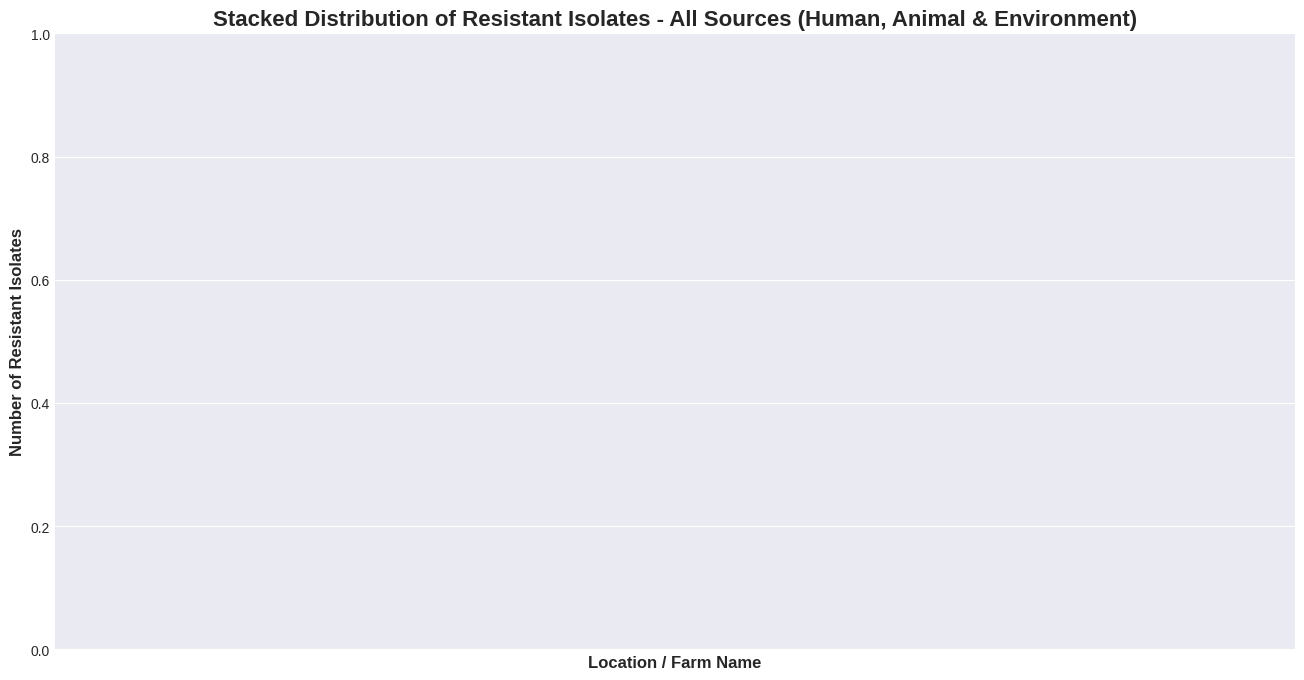

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ====================
# 1. DATA LOADING
# ====================

def load_all_amr_data():
    """Upload and load Human, Animal, and Environmental AMR data from Excel files"""
    print("Upload your Human AMR Excel file (.xlsx or .xls):")
    uploaded_human = files.upload()
    human_file = list(uploaded_human.keys())[0]

    # Check if it's Excel or CSV/TSV
    if human_file.endswith(('.xlsx', '.xls')):
        human_df = pd.read_excel(io.BytesIO(uploaded_human[human_file]))
    else:
        human_df = pd.read_csv(io.BytesIO(uploaded_human[human_file]), sep='\t', encoding='utf-8')
    human_df['Source'] = 'Human'

    print("\nUpload your Animal AMR Excel file (.xlsx or .xls):")
    uploaded_animal = files.upload()
    animal_file = list(uploaded_animal.keys())[0]

    if animal_file.endswith(('.xlsx', '.xls')):
        animal_df = pd.read_excel(io.BytesIO(uploaded_animal[animal_file]))
    else:
        animal_df = pd.read_csv(io.BytesIO(uploaded_animal[animal_file]), sep='\t', encoding='utf-8')
    animal_df['Source'] = 'Animal'

    print("\nUpload your Environmental AMR Excel file (.xlsx or .xls):")
    uploaded_env = files.upload()
    env_file = list(uploaded_env.keys())[0]

    if env_file.endswith(('.xlsx', '.xls')):
        env_df = pd.read_excel(io.BytesIO(uploaded_env[env_file]))
    else:
        env_df = pd.read_csv(io.BytesIO(uploaded_env[env_file]), sep='\t', encoding='utf-8')
    env_df['Source'] = 'Environment'

    # Combine all data
    combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)

    # Remove rows without pathogen data
    combined_df = combined_df[combined_df['Pathogen'].notna() & (combined_df['Pathogen'] != '')]

    print(f"\n✓ Data loaded successfully!")
    print(f"Total samples: {len(combined_df)}")
    print(f"Human: {len(human_df)}, Animal: {len(animal_df)}, Environment: {len(env_df)}")

    return combined_df

# ====================
# 2. ANTIBIOTIC CLASS MAPPING
# ====================

antibiotic_classes = {
    'Aminoglycosides': ['Amikacin', 'Gentamicin', 'Gentamycin', 'Gentamicin High Level (synergy)'],
    'Carbapenems': ['Entrapenum', 'Imipenum', 'Meropenem', 'Metropenem'],
    'Cephalosporins': ['Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum',
                       'Cefepime', 'Cefoxitin', 'Ceftazidime'],
    'Fluoroquinolones': ['Ciprofloxacin', 'Levofloxacin'],
    'Lincosamides': ['Clindamycin'],
    'Macrolides': ['Erythromycin'],
    'Nitrofurans': ['Nitrofurantoin'],
    'Other': ['Tigecycline', 'Fosfomycin', 'Rifampicin', 'Tetracyclin', 'Daptomycin',
              'Aztreonam', 'Minocyclin', 'Minocycline', 'Beta-lactamase', 'Oxacillin'],
    'Penicillins': ['Amoxycillin/Clavulanic acid', 'Benzylpenicillin', 'Piperacillin/Tazobactum'],
    'Polymyxins': ['Colistin'],
    'Rifamycins': ['Rifampicin'],
    'Sulfonamides': ['Trimethoprim/Sulfmaethozole', 'Trimethoprim/Sulfamethoxazole'],
    'Oxazolidinones': ['Linezolid'],
    'Glycopeptides': ['Vanomycin', 'Teicoplanin']
}

class_colors = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Lincosamides': '#4CAF50',
    'Macrolides': '#F44336',
    'Nitrofurans': '#00BCD4',
    'Other': '#607D8B',
    'Penicillins': '#E91E63',
    'Polymyxins': '#8BC34A',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Oxazolidinones': '#673AB7',
    'Glycopeptides': '#FF5722'
}

# ====================
# 3. PREPARE RESISTANCE DATA BY FARM/LOCATION AND CLASS
# ====================

def prepare_resistance_by_location_class(df):
    """Calculate resistant counts by location and antibiotic class"""

    # Get location identifier
    df['Location'] = df['Farm Name'].fillna(df['Sample Code'])

    # Prepare data
    resistance_data = []

    for location in df['Location'].unique():
        location_df = df[df['Location'] == location]

        for class_name, antibiotics in antibiotic_classes.items():
            resistant_count = 0

            for antibiotic in antibiotics:
                if antibiotic in location_df.columns:
                    resistant_count += (location_df[antibiotic] == 'R').sum()

            resistance_data.append({
                'Location': location,
                'Antibiotic Class': class_name,
                'Resistant Count': resistant_count
            })

    resistance_by_location_class = pd.DataFrame(resistance_data)

    # Filter out locations with no resistance
    total_by_location = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    valid_locations = total_by_location[total_by_location > 0].index
    resistance_by_location_class = resistance_by_location_class[
        resistance_by_location_class['Location'].isin(valid_locations)
    ]

    return resistance_by_location_class

# ====================
# 4. VISUALIZATION: STACKED BAR CHART
# ====================

def plot_stacked_resistance(resistance_by_location_class, title='Stacked Distribution of Resistant Isolates'):
    """Create stacked bar chart similar to your original code"""

    # Prepare data
    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort locations by total resistance (descending)
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    # X positions
    x = np.arange(len(locations))

    # Initialize bottom for stacking
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for antibiotic_class_name in classes:
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')

        plt.bar(
            x,
            counts,
            bottom=bottom,
            label=antibiotic_class_name,
            color=bar_color,
            edgecolor='black'
        )

        # Value labels (avoid clutter)
        for xi, yi, bi in zip(x, counts, bottom):
            if yi >= 3:
                plt.text(
                    xi,
                    bi + yi / 2,
                    int(yi),
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom += np.array(counts)

    # ---- Axis formatting ----
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')

    plt.xticks(x, locations, rotation=45, ha='right')

    # ---- Add top padding so bars don't touch the border ----
    plt.ylim(0, bottom.max() * 1.15)

    # ---- Clean spines for publication look ----
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.2)

    # Legend
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize='small'
    )

    plt.tight_layout()
    plt.show()

# ====================
# 5. COMPARISON ACROSS SOURCES
# ====================

def plot_comparison_by_source(df):
    """Compare resistance patterns across Human, Animal, and Environment"""

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sources = ['Human', 'Animal', 'Environment']
    colors_source = ['#3B82F6', '#10B981', '#F59E0B']

    for idx, (source, color) in enumerate(zip(sources, colors_source)):
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            axes[idx].text(0.5, 0.5, f'No {source} data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        resistance_data = prepare_resistance_by_location_class(source_df)

        if len(resistance_data) == 0:
            axes[idx].text(0.5, 0.5, f'No resistance data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        locations = resistance_data['Location'].unique()
        classes = resistance_data['Antibiotic Class'].unique()

        # Sort and limit to top 10
        location_totals = resistance_data.groupby('Location')['Resistant Count'].sum()
        locations = location_totals.sort_values(ascending=False).head(10).index

        x = np.arange(len(locations))
        bottom = np.zeros(len(locations))

        for antibiotic_class_name in classes:
            subset = resistance_data[
                resistance_data['Antibiotic Class'] == antibiotic_class_name
            ]

            counts = [
                subset[subset['Location'] == location]['Resistant Count'].values[0]
                if location in subset['Location'].values else 0
                for location in locations
            ]

            bar_color = class_colors.get(antibiotic_class_name, 'gray')

            axes[idx].bar(
                x,
                counts,
                bottom=bottom,
                label=antibiotic_class_name if idx == 2 else '',
                color=bar_color,
                edgecolor='black'
            )

            # Value labels
            for xi, yi, bi in zip(x, counts, bottom):
                if yi >= 2:
                    axes[idx].text(
                        xi,
                        bi + yi / 2,
                        int(yi),
                        ha='center',
                        va='center',
                        fontsize=7,
                        fontweight='bold'
                    )

            bottom += np.array(counts)

        axes[idx].set_title(f'{source} Samples (n={len(source_df)})',
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Location', fontsize=10, fontweight='bold')
        if idx == 0:
            axes[idx].set_ylabel('Resistant Isolates', fontsize=10, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(locations, rotation=45, ha='right', fontsize=8)
        axes[idx].set_ylim(0, bottom.max() * 1.15 if bottom.max() > 0 else 1)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)

    # Add single legend for all subplots
    handles, labels = axes[2].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)

    plt.suptitle('One Health Comparison: Resistance Across Human, Animal & Environment',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ====================
# 6. SUMMARY STATISTICS
# ====================

def print_summary_statistics(df):
    """Print summary statistics for all sources"""

    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)

    for source in ['Human', 'Animal', 'Environment']:
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            continue

        print(f"\n{source} Samples:")
        print(f"  Total samples: {len(source_df)}")
        print(f"  Unique locations: {source_df['Farm Name'].nunique() + source_df['Sample Code'].nunique()}")
        print(f"  Unique pathogens: {source_df['Pathogen'].nunique()}")

        # Calculate average resistance
        resistant_counts = []
        for idx, row in source_df.iterrows():
            count = 0
            for class_name, antibiotics in antibiotic_classes.items():
                for antibiotic in antibiotics:
                    if antibiotic in row and row[antibiotic] == 'R':
                        count += 1
            resistant_counts.append(count)

        avg_resistance = np.mean(resistant_counts) if resistant_counts else 0
        print(f"  Average resistant antibiotics per sample: {avg_resistance:.2f}")

# ====================
# 7. MAIN EXECUTION
# ====================

print("="*60)
print("ONE HEALTH AMR VISUALIZATION")
print("="*60)

# Load all data
combined_df = load_all_amr_data()

# Print summary statistics
print_summary_statistics(combined_df)

# Prepare resistance data
print("\nPreparing resistance data...")
resistance_by_location_class = prepare_resistance_by_location_class(combined_df)

# Visualization 1: Combined data (all sources)
print("\n1. Combined Analysis (All Sources)")
plot_stacked_resistance(
    resistance_by_location_class,
    'Stacked Distribution of Resistant Isolates - All Sources (Human, Animal & Environment)'
)

# Visualization 2: Side-by-side comparison
print("\n2. One Health Comparison by Source")
plot_comparison_by_source(combined_df)

# Visualization 3: Individual source analyses
for source in ['Human', 'Animal', 'Environment']:
    source_df = combined_df[combined_df['Source'] == source]

    if len(source_df) > 0:
        print(f"\n3. {source} Samples - Individual Analysis")
        source_resistance = prepare_resistance_by_location_class(source_df)
        plot_stacked_resistance(
            source_resistance,
            f'Stacked Distribution of Resistant Isolates - {source} Only'
        )

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

ONE HEALTH AMR VISUALIZATION
Upload your Human AMR Excel file (.xlsx or .xls):


Saving Human Samples.xlsx to Human Samples (7).xlsx

Upload your Animal AMR Excel file (.xlsx or .xls):


Saving Animal Samples.xlsx to Animal Samples (4).xlsx

Upload your Environmental AMR Excel file (.xlsx or .xls):


Saving Enviormental Samples.xlsx to Enviormental Samples (4).xlsx

✓ Data loaded successfully!
Total samples: 1451
Human: 696, Animal: 469, Environment: 295

SUMMARY STATISTICS

Human Samples:
  Total samples: 689
  Unique locations: 126
  Unique pathogens: 14
  Average resistant antibiotics per sample: 0.00

Animal Samples:
  Total samples: 468
  Unique locations: 71
  Unique pathogens: 13


/tmp/ipython-input-4097462639.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)


  Average resistant antibiotics per sample: 0.00

Environment Samples:
  Total samples: 294
  Unique locations: 36
  Unique pathogens: 10
  Average resistant antibiotics per sample: 0.00

Preparing resistance data...

1. Combined Analysis (All Sources)
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - All Sources (Human, Animal & Environment)

2. One Health Comparison by Source


/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

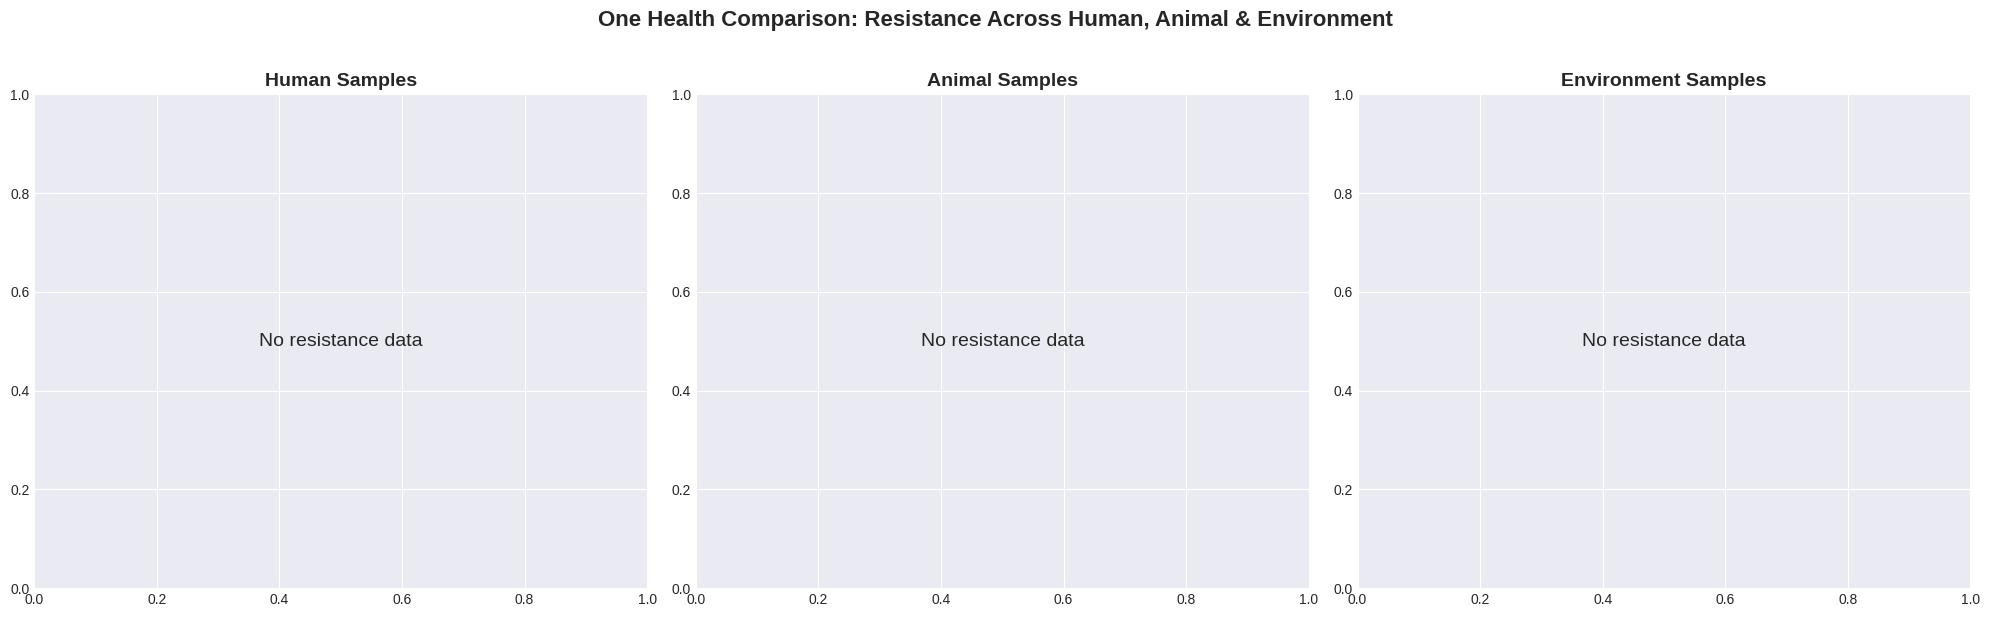


3. Human Samples - Individual Analysis
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - Human Only

3. Animal Samples - Individual Analysis
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - Animal Only

3. Environment Samples - Individual Analysis
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - Environment Only

ANALYSIS COMPLETE!


/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ====================
# 1. DATA LOADING
# ====================

def load_all_amr_data():
    """Upload and load Human, Animal, and Environmental AMR data from Excel files"""
    print("Upload your Human AMR Excel file (.xlsx or .xls):")
    uploaded_human = files.upload()
    human_file = list(uploaded_human.keys())[0]

    # Check if it's Excel or CSV/TSV
    if human_file.endswith(('.xlsx', '.xls')):
        human_df = pd.read_excel(io.BytesIO(uploaded_human[human_file]))
    else:
        human_df = pd.read_csv(io.BytesIO(uploaded_human[human_file]), sep='\t', encoding='utf-8')
    human_df['Source'] = 'Human'

    print("\nUpload your Animal AMR Excel file (.xlsx or .xls):")
    uploaded_animal = files.upload()
    animal_file = list(uploaded_animal.keys())[0]

    if animal_file.endswith(('.xlsx', '.xls')):
        animal_df = pd.read_excel(io.BytesIO(uploaded_animal[animal_file]))
    else:
        animal_df = pd.read_csv(io.BytesIO(uploaded_animal[animal_file]), sep='\t', encoding='utf-8')
    animal_df['Source'] = 'Animal'

    print("\nUpload your Environmental AMR Excel file (.xlsx or .xls):")
    uploaded_env = files.upload()
    env_file = list(uploaded_env.keys())[0]

    if env_file.endswith(('.xlsx', '.xls')):
        env_df = pd.read_excel(io.BytesIO(uploaded_env[env_file]))
    else:
        env_df = pd.read_csv(io.BytesIO(uploaded_env[env_file]), sep='\t', encoding='utf-8')
    env_df['Source'] = 'Environment'

    # Combine all data
    combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)

    # Remove rows without pathogen data
    combined_df = combined_df[combined_df['Pathogen'].notna() & (combined_df['Pathogen'] != '')]

    print(f"\n✓ Data loaded successfully!")
    print(f"Total samples: {len(combined_df)}")
    print(f"Human: {len(human_df)}, Animal: {len(animal_df)}, Environment: {len(env_df)}")

    return combined_df

# ====================
# 2. ANTIBIOTIC CLASS MAPPING
# ====================

antibiotic_classes = {
    'Aminoglycosides': ['Amikacin', 'Gentamicin', 'Gentamycin', 'Gentamicin High Level (synergy)'],
    'Carbapenems': ['Entrapenum', 'Imipenum', 'Meropenem', 'Metropenem'],
    'Cephalosporins': ['Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum',
                       'Cefepime', 'Cefoxitin', 'Ceftazidime'],
    'Fluoroquinolones': ['Ciprofloxacin', 'Levofloxacin'],
    'Lincosamides': ['Clindamycin'],
    'Macrolides': ['Erythromycin'],
    'Nitrofurans': ['Nitrofurantoin'],
    'Other': ['Tigecycline', 'Fosfomycin', 'Rifampicin', 'Tetracyclin', 'Daptomycin',
              'Aztreonam', 'Minocyclin', 'Minocycline', 'Beta-lactamase', 'Oxacillin'],
    'Penicillins': ['Amoxycillin/Clavulanic acid', 'Benzylpenicillin', 'Piperacillin/Tazobactum'],
    'Polymyxins': ['Colistin'],
    'Rifamycins': ['Rifampicin'],
    'Sulfonamides': ['Trimethoprim/Sulfmaethozole', 'Trimethoprim/Sulfamethoxazole'],
    'Oxazolidinones': ['Linezolid'],
    'Glycopeptides': ['Vanomycin', 'Teicoplanin']
}

class_colors = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Lincosamides': '#4CAF50',
    'Macrolides': '#F44336',
    'Nitrofurans': '#00BCD4',
    'Other': '#607D8B',
    'Penicillins': '#E91E63',
    'Polymyxins': '#8BC34A',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Oxazolidinones': '#673AB7',
    'Glycopeptides': '#FF5722'
}

# ====================
# 3. PREPARE RESISTANCE DATA BY FARM/LOCATION AND CLASS
# ====================

def prepare_resistance_by_location_class(df):
    """Calculate resistant counts by location and antibiotic class"""

    # Get location identifier
    df['Location'] = df['Farm Name'].fillna(df['Sample Code'])

    # Prepare data
    resistance_data = []

    for location in df['Location'].unique():
        location_df = df[df['Location'] == location]

        for class_name, antibiotics in antibiotic_classes.items():
            resistant_count = 0

            for antibiotic in antibiotics:
                if antibiotic in location_df.columns:
                    resistant_count += (location_df[antibiotic] == 'R').sum()

            resistance_data.append({
                'Location': location,
                'Antibiotic Class': class_name,
                'Resistant Count': resistant_count
            })

    resistance_by_location_class = pd.DataFrame(resistance_data)

    # Filter out locations with no resistance
    total_by_location = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    valid_locations = total_by_location[total_by_location > 0].index
    resistance_by_location_class = resistance_by_location_class[
        resistance_by_location_class['Location'].isin(valid_locations)
    ]

    return resistance_by_location_class

# ====================
# 4. VISUALIZATION: STACKED BAR CHART
# ====================

def plot_stacked_resistance(resistance_by_location_class, title='Stacked Distribution of Resistant Isolates'):
    """Create stacked bar chart similar to your original code"""

    # Check if there's any data
    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data available for: {title}")
        return

    # Check if there's any resistance count > 0
    total_resistance = resistance_by_location_class['Resistant Count'].sum()
    if total_resistance == 0:
        print(f"⚠ No resistant isolates found for: {title}")
        return

    # Prepare data
    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort locations by total resistance (descending)
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    # Check if we have valid locations
    if len(locations) == 0:
        print(f"⚠ No valid locations with resistance data for: {title}")
        return

    # X positions
    x = np.arange(len(locations))

    # Initialize bottom for stacking
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for antibiotic_class_name in classes:
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')

        plt.bar(
            x,
            counts,
            bottom=bottom,
            label=antibiotic_class_name,
            color=bar_color,
            edgecolor='black'
        )

        # Value labels (avoid clutter)
        for xi, yi, bi in zip(x, counts, bottom):
            if yi >= 3:
                plt.text(
                    xi,
                    bi + yi / 2,
                    int(yi),
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom += np.array(counts)

    # ---- Axis formatting ----
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')

    plt.xticks(x, locations, rotation=45, ha='right')

    # ---- Add top padding so bars don't touch the border ----
    max_bottom = bottom.max()
    if max_bottom > 0:
        plt.ylim(0, max_bottom * 1.15)
    else:
        plt.ylim(0, 1)

    # ---- Clean spines for publication look ----
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.2)

    # Legend
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize='small'
    )

    plt.tight_layout()
    plt.show()

# ====================
# 5. COMPARISON ACROSS SOURCES
# ====================

def plot_comparison_by_source(df):
    """Compare resistance patterns across Human, Animal, and Environment"""

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sources = ['Human', 'Animal', 'Environment']
    colors_source = ['#3B82F6', '#10B981', '#F59E0B']

    for idx, (source, color) in enumerate(zip(sources, colors_source)):
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            axes[idx].text(0.5, 0.5, f'No {source} data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        resistance_data = prepare_resistance_by_location_class(source_df)

        if len(resistance_data) == 0:
            axes[idx].text(0.5, 0.5, f'No resistance data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        locations = resistance_data['Location'].unique()
        classes = resistance_data['Antibiotic Class'].unique()

        # Sort and limit to top 10
        location_totals = resistance_data.groupby('Location')['Resistant Count'].sum()
        locations = location_totals.sort_values(ascending=False).head(10).index

        x = np.arange(len(locations))
        bottom = np.zeros(len(locations))

        for antibiotic_class_name in classes:
            subset = resistance_data[
                resistance_data['Antibiotic Class'] == antibiotic_class_name
            ]

            counts = [
                subset[subset['Location'] == location]['Resistant Count'].values[0]
                if location in subset['Location'].values else 0
                for location in locations
            ]

            bar_color = class_colors.get(antibiotic_class_name, 'gray')

            axes[idx].bar(
                x,
                counts,
                bottom=bottom,
                label=antibiotic_class_name if idx == 2 else '',
                color=bar_color,
                edgecolor='black'
            )

            # Value labels
            for xi, yi, bi in zip(x, counts, bottom):
                if yi >= 2:
                    axes[idx].text(
                        xi,
                        bi + yi / 2,
                        int(yi),
                        ha='center',
                        va='center',
                        fontsize=7,
                        fontweight='bold'
                    )

            bottom += np.array(counts)

        axes[idx].set_title(f'{source} Samples (n={len(source_df)})',
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Location', fontsize=10, fontweight='bold')
        if idx == 0:
            axes[idx].set_ylabel('Resistant Isolates', fontsize=10, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(locations, rotation=45, ha='right', fontsize=8)
        axes[idx].set_ylim(0, bottom.max() * 1.15 if bottom.max() > 0 else 1)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)

    # Add single legend for all subplots
    handles, labels = axes[2].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)

    plt.suptitle('One Health Comparison: Resistance Across Human, Animal & Environment',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ====================
# 6. SUMMARY STATISTICS
# ====================

def print_summary_statistics(df):
    """Print summary statistics for all sources"""

    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)

    for source in ['Human', 'Animal', 'Environment']:
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            continue

        print(f"\n{source} Samples:")
        print(f"  Total samples: {len(source_df)}")
        print(f"  Unique locations: {source_df['Farm Name'].nunique() + source_df['Sample Code'].nunique()}")
        print(f"  Unique pathogens: {source_df['Pathogen'].nunique()}")

        # Calculate average resistance
        resistant_counts = []
        for idx, row in source_df.iterrows():
            count = 0
            for class_name, antibiotics in antibiotic_classes.items():
                for antibiotic in antibiotics:
                    if antibiotic in row and row[antibiotic] == 'R':
                        count += 1
            resistant_counts.append(count)

        avg_resistance = np.mean(resistant_counts) if resistant_counts else 0
        print(f"  Average resistant antibiotics per sample: {avg_resistance:.2f}")

# ====================
# 7. MAIN EXECUTION
# ====================

print("="*60)
print("ONE HEALTH AMR VISUALIZATION")
print("="*60)

# Load all data
combined_df = load_all_amr_data()

# Print summary statistics
print_summary_statistics(combined_df)

# Prepare resistance data
print("\nPreparing resistance data...")
resistance_by_location_class = prepare_resistance_by_location_class(combined_df)

# Visualization 1: Combined data (all sources)
print("\n1. Combined Analysis (All Sources)")
plot_stacked_resistance(
    resistance_by_location_class,
    'Stacked Distribution of Resistant Isolates - All Sources (Human, Animal & Environment)'
)

# Visualization 2: Side-by-side comparison
print("\n2. One Health Comparison by Source")
plot_comparison_by_source(combined_df)

# Visualization 3: Individual source analyses
for source in ['Human', 'Animal', 'Environment']:
    source_df = combined_df[combined_df['Source'] == source]

    if len(source_df) > 0:
        print(f"\n3. {source} Samples - Individual Analysis")
        source_resistance = prepare_resistance_by_location_class(source_df)
        plot_stacked_resistance(
            source_resistance,
            f'Stacked Distribution of Resistant Isolates - {source} Only'
        )

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

ONE HEALTH AMR VISUALIZATION
Upload your Human AMR Excel file (.xlsx or .xls):


Saving Human Samples.xlsx to Human Samples (8).xlsx

Upload your Animal AMR Excel file (.xlsx or .xls):


Saving Animal Samples.xlsx to Animal Samples (5).xlsx

Upload your Environmental AMR Excel file (.xlsx or .xls):


Saving Enviormental Samples.xlsx to Enviormental Samples (5).xlsx

✓ Data loaded successfully!
Total samples: 1451
Human: 696, Animal: 469, Environment: 295

SUMMARY STATISTICS

Human Samples:
  Total samples: 689
  Unique locations: 126
  Unique pathogens: 14
  Average resistant antibiotics per sample: 0.00

Animal Samples:
  Total samples: 468
  Unique locations: 71
  Unique pathogens: 13


/tmp/ipython-input-4097462639.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

  Average resistant antibiotics per sample: 0.00

Environment Samples:
  Total samples: 294
  Unique locations: 36
  Unique pathogens: 10
  Average resistant antibiotics per sample: 0.00

Preparing resistance data...

1. Combined Analysis (All Sources)
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - All Sources (Human, Animal & Environment)

2. One Health Comparison by Source


/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])


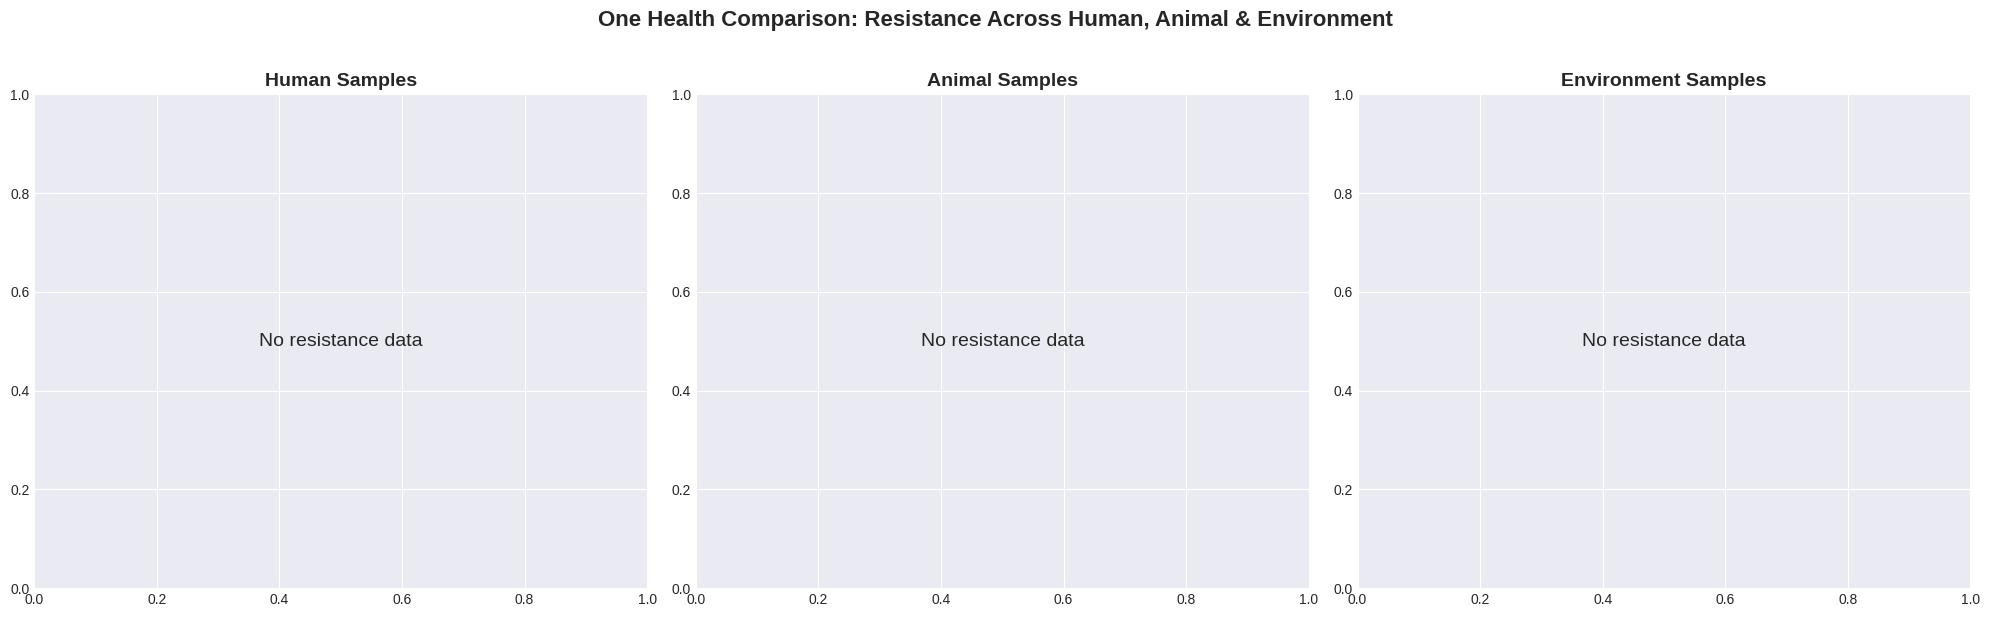


3. Human Samples - Individual Analysis
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - Human Only

3. Animal Samples - Individual Analysis
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - Animal Only

3. Environment Samples - Individual Analysis
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - Environment Only

ANALYSIS COMPLETE!


/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Farm Name'].fillna(df['Sample Code'])
/tmp/ipython-input-4097462639.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ====================
# 1. DATA LOADING
# ====================

def load_all_amr_data():
    """Upload and load Human, Animal, and Environmental AMR data from Excel files"""
    print("Upload your Human AMR Excel file (.xlsx or .xls):")
    uploaded_human = files.upload()
    human_file = list(uploaded_human.keys())[0]

    # Check if it's Excel or CSV/TSV
    if human_file.endswith(('.xlsx', '.xls')):
        human_df = pd.read_excel(io.BytesIO(uploaded_human[human_file]))
    else:
        human_df = pd.read_csv(io.BytesIO(uploaded_human[human_file]), sep='\t', encoding='utf-8')
    human_df['Source'] = 'Human'

    print("\nUpload your Animal AMR Excel file (.xlsx or .xls):")
    uploaded_animal = files.upload()
    animal_file = list(uploaded_animal.keys())[0]

    if animal_file.endswith(('.xlsx', '.xls')):
        animal_df = pd.read_excel(io.BytesIO(uploaded_animal[animal_file]))
    else:
        animal_df = pd.read_csv(io.BytesIO(uploaded_animal[animal_file]), sep='\t', encoding='utf-8')
    animal_df['Source'] = 'Animal'

    print("\nUpload your Environmental AMR Excel file (.xlsx or .xls):")
    uploaded_env = files.upload()
    env_file = list(uploaded_env.keys())[0]

    if env_file.endswith(('.xlsx', '.xls')):
        env_df = pd.read_excel(io.BytesIO(uploaded_env[env_file]))
    else:
        env_df = pd.read_csv(io.BytesIO(uploaded_env[env_file]), sep='\t', encoding='utf-8')
    env_df['Source'] = 'Environment'

    # Combine all data
    combined_df = pd.concat([human_df, animal_df, env_df], ignore_index=True)

    # Remove rows without pathogen data
    combined_df = combined_df[combined_df['Pathogen'].notna() & (combined_df['Pathogen'] != '')]

    print(f"\n✓ Data loaded successfully!")
    print(f"Total samples: {len(combined_df)}")
    print(f"Human: {len(human_df)}, Animal: {len(animal_df)}, Environment: {len(env_df)}")

    return combined_df

# ====================
# 2. ANTIBIOTIC CLASS MAPPING
# ====================

antibiotic_classes = {
    'Aminoglycosides': ['Amikacin', 'Gentamicin', 'Gentamycin', 'Gentamicin High Level (synergy)'],
    'Carbapenems': ['Entrapenum', 'Imipenum', 'Meropenem', 'Metropenem'],
    'Cephalosporins': ['Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum',
                       'Cefepime', 'Cefoxitin', 'Ceftazidime'],
    'Fluoroquinolones': ['Ciprofloxacin', 'Levofloxacin'],
    'Lincosamides': ['Clindamycin'],
    'Macrolides': ['Erythromycin'],
    'Nitrofurans': ['Nitrofurantoin'],
    'Other': ['Tigecycline', 'Fosfomycin', 'Rifampicin', 'Tetracyclin', 'Daptomycin',
              'Aztreonam', 'Minocyclin', 'Minocycline', 'Beta-lactamase', 'Oxacillin'],
    'Penicillins': ['Amoxycillin/Clavulanic acid', 'Benzylpenicillin', 'Piperacillin/Tazobactum'],
    'Polymyxins': ['Colistin'],
    'Rifamycins': ['Rifampicin'],
    'Sulfonamides': ['Trimethoprim/Sulfmaethozole', 'Trimethoprim/Sulfamethoxazole'],
    'Oxazolidinones': ['Linezolid'],
    'Glycopeptides': ['Vanomycin', 'Teicoplanin']
}

class_colors = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Lincosamides': '#4CAF50',
    'Macrolides': '#F44336',
    'Nitrofurans': '#00BCD4',
    'Other': '#607D8B',
    'Penicillins': '#E91E63',
    'Polymyxins': '#8BC34A',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Oxazolidinones': '#673AB7',
    'Glycopeptides': '#FF5722'
}

# ====================
# 3. PREPARE RESISTANCE DATA BY FARM/LOCATION AND CLASS
# ====================

def prepare_resistance_by_location_class(df):
    """Calculate resistant counts by location and antibiotic class"""

    # Get location identifier
    df['Location'] = df['Farm Name'].fillna(df['Sample Code'])

    # Prepare data
    resistance_data = []

    for location in df['Location'].unique():
        location_df = df[df['Location'] == location]

        for class_name, antibiotics in antibiotic_classes.items():
            resistant_count = 0

            for antibiotic in antibiotics:
                if antibiotic in location_df.columns:
                    resistant_count += (location_df[antibiotic] == 'R').sum()

            resistance_data.append({
                'Location': location,
                'Antibiotic Class': class_name,
                'Resistant Count': resistant_count
            })

    resistance_by_location_class = pd.DataFrame(resistance_data)

    # Filter out locations with no resistance
    total_by_location = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    valid_locations = total_by_location[total_by_location > 0].index
    resistance_by_location_class = resistance_by_location_class[
        resistance_by_location_class['Location'].isin(valid_locations)
    ]

    return resistance_by_location_class

# ====================
# 4. VISUALIZATION: STACKED BAR CHART
# ====================

def plot_stacked_resistance(resistance_by_location_class, title='Stacked Distribution of Resistant Isolates'):
    """Create stacked bar chart similar to your original code"""

    # Check if there's any data
    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data available for: {title}")
        return

    # Check if there's any resistance count > 0
    total_resistance = resistance_by_location_class['Resistant Count'].sum()
    if total_resistance == 0:
        print(f"⚠ No resistant isolates found for: {title}")
        return

    # Prepare data
    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort locations by total resistance (descending)
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    # Check if we have valid locations
    if len(locations) == 0:
        print(f"⚠ No valid locations with resistance data for: {title}")
        return

    # X positions
    x = np.arange(len(locations))

    # Initialize bottom for stacking
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for antibiotic_class_name in classes:
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')

        plt.bar(
            x,
            counts,
            bottom=bottom,
            label=antibiotic_class_name,
            color=bar_color,
            edgecolor='black'
        )

        # Value labels (avoid clutter)
        for xi, yi, bi in zip(x, counts, bottom):
            if yi >= 3:
                plt.text(
                    xi,
                    bi + yi / 2,
                    int(yi),
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom += np.array(counts)

    # ---- Axis formatting ----
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')

    plt.xticks(x, locations, rotation=45, ha='right')

    # ---- Add top padding so bars don't touch the border ----
    max_bottom = bottom.max()
    if max_bottom > 0:
        plt.ylim(0, max_bottom * 1.15)
    else:
        plt.ylim(0, 1)

    # ---- Clean spines for publication look ----
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.2)

    # Legend
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize='small'
    )

    plt.tight_layout()
    plt.show()

# ====================
# 5. COMPARISON ACROSS SOURCES
# ====================

def plot_comparison_by_source(df):
    """Compare resistance patterns across Human, Animal, and Environment"""

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sources = ['Human', 'Animal', 'Environment']
    colors_source = ['#3B82F6', '#10B981', '#F59E0B']

    for idx, (source, color) in enumerate(zip(sources, colors_source)):
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            axes[idx].text(0.5, 0.5, f'No {source} data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        resistance_data = prepare_resistance_by_location_class(source_df)

        if len(resistance_data) == 0:
            axes[idx].text(0.5, 0.5, f'No resistance data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        locations = resistance_data['Location'].unique()
        classes = resistance_data['Antibiotic Class'].unique()

        # Sort and limit to top 10
        location_totals = resistance_data.groupby('Location')['Resistant Count'].sum()
        locations = location_totals.sort_values(ascending=False).head(10).index

        x = np.arange(len(locations))
        bottom = np.zeros(len(locations))

        for antibiotic_class_name in classes:
            subset = resistance_data[
                resistance_data['Antibiotic Class'] == antibiotic_class_name
            ]

            counts = [
                subset[subset['Location'] == location]['Resistant Count'].values[0]
                if location in subset['Location'].values else 0
                for location in locations
            ]

            bar_color = class_colors.get(antibiotic_class_name, 'gray')

            axes[idx].bar(
                x,
                counts,
                bottom=bottom,
                label=antibiotic_class_name if idx == 2 else '',
                color=bar_color,
                edgecolor='black'
            )

            # Value labels
            for xi, yi, bi in zip(x, counts, bottom):
                if yi >= 2:
                    axes[idx].text(
                        xi,
                        bi + yi / 2,
                        int(yi),
                        ha='center',
                        va='center',
                        fontsize=7,
                        fontweight='bold'
                    )

            bottom += np.array(counts)

        axes[idx].set_title(f'{source} Samples (n={len(source_df)})',
                           fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Location', fontsize=10, fontweight='bold')
        if idx == 0:
            axes[idx].set_ylabel('Resistant Isolates', fontsize=10, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(locations, rotation=45, ha='right', fontsize=8)
        axes[idx].set_ylim(0, bottom.max() * 1.15 if bottom.max() > 0 else 1)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)

    # Add single legend for all subplots
    handles, labels = axes[2].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)

    plt.suptitle('One Health Comparison: Resistance Across Human, Animal & Environment',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ====================
# 6. SUMMARY STATISTICS
# ====================

def print_summary_statistics(df):
    """Print summary statistics for all sources"""

    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)

    for source in ['Human', 'Animal', 'Environment']:
        source_df = df[df['Source'] == source]

        if len(source_df) == 0:
            continue

        print(f"\n{source} Samples:")
        print(f"  Total samples: {len(source_df)}")
        print(f"  Unique locations: {source_df['Farm Name'].nunique() + source_df['Sample Code'].nunique()}")
        print(f"  Unique pathogens: {source_df['Pathogen'].nunique()}")

        # Calculate average resistance
        resistant_counts = []
        for idx, row in source_df.iterrows():
            count = 0
            for class_name, antibiotics in antibiotic_classes.items():
                for antibiotic in antibiotics:
                    if antibiotic in row and row[antibiotic] == 'R':
                        count += 1
            resistant_counts.append(count)

        avg_resistance = np.mean(resistant_counts) if resistant_counts else 0
        print(f"  Average resistant antibiotics per sample: {avg_resistance:.2f}")

# ====================
# 7. MAIN EXECUTION
# ====================

print("="*60)
print("ONE HEALTH AMR VISUALIZATION")
print("="*60)

# Load all data
combined_df = load_all_amr_data()

# Print summary statistics
print_summary_statistics(combined_df)

# Prepare resistance data
print("\nPreparing resistance data...")
resistance_by_location_class = prepare_resistance_by_location_class(combined_df)

# Visualization 1: Combined data (all sources)
print("\n1. Combined Analysis (All Sources)")
plot_stacked_resistance(
    resistance_by_location_class,
    'Stacked Distribution of Resistant Isolates - All Sources (Human, Animal & Environment)'
)

# Visualization 2: Side-by-side comparison
print("\n2. One Health Comparison by Source")
plot_comparison_by_source(combined_df)

# Visualization 3: Individual source analyses
for source in ['Human', 'Animal', 'Environment']:
    source_df = combined_df[combined_df['Source'] == source]

    if len(source_df) > 0:
        print(f"\n3. {source} Samples - Individual Analysis")
        source_resistance = prepare_resistance_by_location_class(source_df)
        plot_stacked_resistance(
            source_resistance,
            f'Stacked Distribution of Resistant Isolates - {source} Only'
        )

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

ONE HEALTH AMR VISUALIZATION - Following Your Exact Workflow
Upload your Human AMR Excel file (.xlsx or .xls):


Saving Human Samples.xlsx to Human Samples (9).xlsx

Upload your Animal AMR Excel file (.xlsx or .xls):


Saving Animal Samples.xlsx to Animal Samples (6).xlsx

Upload your Environmental AMR Excel file (.xlsx or .xls):


Saving Enviormental Samples.xlsx to Enviormental Samples (6).xlsx

✓ Data loaded successfully!
Human rows: 696, Animal rows: 469, Environment rows: 295

Processing Human data...
  Found 0 location-class combinations with resistance

Processing Animal data...
  Found 0 location-class combinations with resistance

Processing Environmental data...
  Found 0 location-class combinations with resistance

Combining all sources...
  Total: 0 location-class combinations across all sources

GENERATING VISUALIZATIONS

1. Combined Analysis - Stacked Bar Chart (All Sources)
⚠ No resistance data available for: Stacked Distribution of Resistant Isolates - All Sources Combined

2. Combined Analysis - Grouped Bar Chart (All Sources)
⚠ No resistance data available for: Resistant Isolates per Location and Antibiotic Class - All Sources

3. One Health Comparison - Side by Side


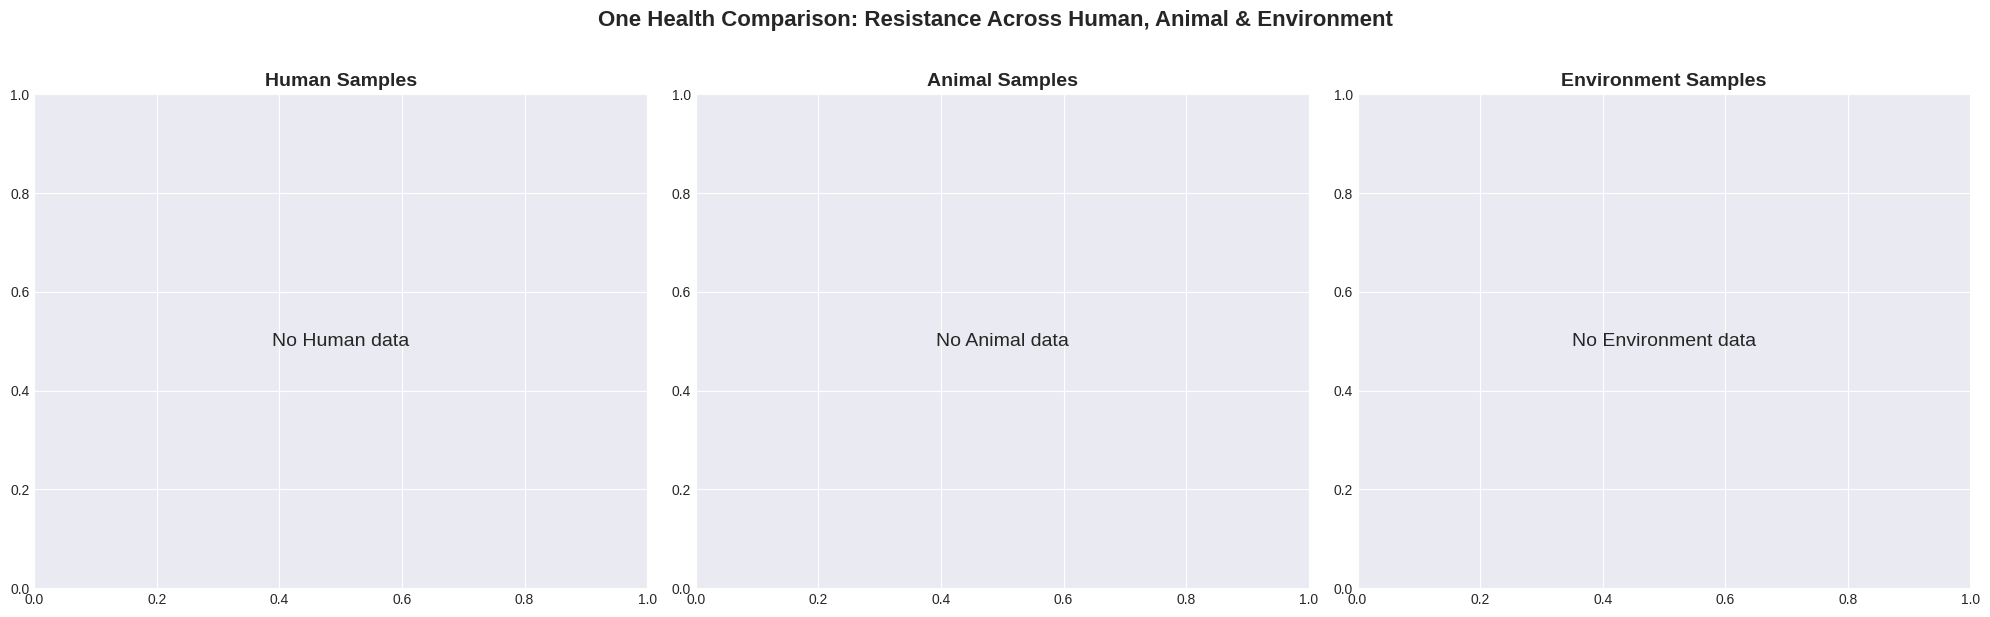


4. Human Samples - Individual Analysis

5. Animal Samples - Individual Analysis

6. Environmental Samples - Individual Analysis

ANALYSIS COMPLETE!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ====================
# 1. DATA LOADING
# ====================

def load_all_amr_data():
    """Upload and load Human, Animal, and Environmental AMR data from Excel files"""
    print("Upload your Human AMR Excel file (.xlsx or .xls):")
    uploaded_human = files.upload()
    human_file = list(uploaded_human.keys())[0]

    if human_file.endswith(('.xlsx', '.xls')):
        human_df = pd.read_excel(io.BytesIO(uploaded_human[human_file]))
    else:
        human_df = pd.read_csv(io.BytesIO(uploaded_human[human_file]), sep='\t', encoding='utf-8')

    print("\nUpload your Animal AMR Excel file (.xlsx or .xls):")
    uploaded_animal = files.upload()
    animal_file = list(uploaded_animal.keys())[0]

    if animal_file.endswith(('.xlsx', '.xls')):
        animal_df = pd.read_excel(io.BytesIO(uploaded_animal[animal_file]))
    else:
        animal_df = pd.read_csv(io.BytesIO(uploaded_animal[animal_file]), sep='\t', encoding='utf-8')

    print("\nUpload your Environmental AMR Excel file (.xlsx or .xls):")
    uploaded_env = files.upload()
    env_file = list(uploaded_env.keys())[0]

    if env_file.endswith(('.xlsx', '.xls')):
        env_df = pd.read_excel(io.BytesIO(uploaded_env[env_file]))
    else:
        env_df = pd.read_csv(io.BytesIO(uploaded_env[env_file]), sep='\t', encoding='utf-8')

    # Add source labels
    human_df['Source'] = 'Human'
    animal_df['Source'] = 'Animal'
    env_df['Source'] = 'Environment'

    print(f"\n✓ Data loaded successfully!")
    print(f"Human rows: {len(human_df)}, Animal rows: {len(animal_df)}, Environment rows: {len(env_df)}")

    return human_df, animal_df, env_df

# ====================
# 2. ANTIBIOTIC CLASS MAPPING
# ====================

# Define antibiotic classes
antibiotic_classes = {
    'Aminoglycosides': ['Amikacin', 'Gentamicin', 'Gentamycin', 'Gentamicin High Level (synergy)'],
    'Carbapenems': ['Entrapenum', 'Imipenum', 'Meropenem', 'Metropenem'],
    'Cephalosporins': ['Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum',
                       'Cefepime', 'Cefoxitin', 'Ceftazidime'],
    'Fluoroquinolones': ['Ciprofloxacin', 'Levofloxacin'],
    'Lincosamides': ['Clindamycin'],
    'Macrolides': ['Erythromycin'],
    'Nitrofurans': ['Nitrofurantoin'],
    'Penicillins': ['Amoxycillin/Clavulanic acid', 'Benzylpenicillin', 'Piperacillin/Tazobactum'],
    'Polymyxins': ['Colistin'],
    'Rifamycins': ['Rifampicin'],
    'Sulfonamides': ['Trimethoprim/Sulfamethoxazole', 'Trimethoprim/Sulfmaethozole'],
    'Tetracyclines': ['Tetracyclin'],
    'Trimethoprims': ['Trimethoprim/Sulfamethoxazole', 'Trimethoprim/Sulfmaethozole'],
    'Oxazolidinones': ['Linezolid'],
    'Glycopeptides': ['Vanomycin', 'Teicoplanin'],
    'Other': ['Tigecycline', 'Fosfomycin', 'Daptomycin', 'Aztreonam', 'Minocyclin',
              'Minocycline', 'Beta-lactamase', 'Oxacillin', 'Cefoxitin Screen']
}

# Create reverse mapping
abx_to_class = {}
for class_name, antibiotics in antibiotic_classes.items():
    for antibiotic in antibiotics:
        abx_to_class[antibiotic] = class_name

class_colors = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Lincosamides': '#4CAF50',
    'Macrolides': '#F44336',
    'Nitrofurans': '#00BCD4',
    'Other': '#607D8B',
    'Penicillins': '#E91E63',
    'Polymyxins': '#8BC34A',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Tetracyclines': '#CDDC39',
    'Trimethoprims': '#009688',
    'Oxazolidinones': '#673AB7',
    'Glycopeptides': '#FF5722'
}

# ====================
# 3. PROCESS DATA (Following your workflow)
# ====================

def process_amr_data(df, source_name):
    """Process AMR data following your exact workflow"""

    # Get all antibiotic columns
    all_antibiotics = [ab for abs_list in antibiotic_classes.values() for ab in abs_list]
    antibiotic_columns = [col for col in df.columns if col in all_antibiotics]

    # Create combined dataframe with Farm Name and antibiotics
    if 'Farm Name' in df.columns:
        location_col = 'Farm Name'
    elif 'Sample Code' in df.columns:
        location_col = 'Sample Code'
    else:
        # Create a placeholder location
        df['Location'] = source_name
        location_col = 'Location'

    # Combine location with antibiotic data
    df_combined = pd.concat([df[[location_col]], df[antibiotic_columns]], axis=1)

    # Convert to long format (melt)
    df_long = df_combined.melt(
        id_vars=[location_col],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    # Map antibiotics to classes
    df_long['Antibiotic Class'] = df_long['Antibiotic'].map(abx_to_class)

    # Clean location names
    df_long[location_col] = df_long[location_col].astype(str).str.strip().str.upper()

    # Filter for resistant isolates ('R') and group
    resistance_by_location_class = (
        df_long[df_long['Resistance Status'] == 'R']
        .groupby([location_col, 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
    )

    resistance_by_location_class.rename(columns={location_col: 'Location'}, inplace=True)

    return resistance_by_location_class

# ====================
# 4. VISUALIZATION: STACKED BAR CHART (Your exact style)
# ====================

def plot_stacked_resistance(resistance_by_location_class, title='Stacked Distribution of Resistant Isolates'):
    """Create stacked bar chart exactly like your original code"""

    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data available for: {title}")
        return

    # Prepare data
    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort locations by total resistance (descending) and limit to top 15
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    # X positions
    x = np.arange(len(locations))

    # Initialize bottom for stacking
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for antibiotic_class_name in classes:
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')

        plt.bar(
            x,
            counts,
            bottom=bottom,
            label=antibiotic_class_name,
            color=bar_color,
            edgecolor='black'
        )

        # Value labels (avoid clutter)
        for xi, yi, bi in zip(x, counts, bottom):
            if yi >= 3:
                plt.text(
                    xi,
                    bi + yi / 2,
                    int(yi),
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom += np.array(counts)

    # Axis formatting
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')

    plt.xticks(x, locations, rotation=45, ha='right')

    # Add top padding
    max_bottom = bottom.max()
    if max_bottom > 0:
        plt.ylim(0, max_bottom * 1.15)

    # Clean spines
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.2)

    # Legend
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize='small'
    )

    plt.tight_layout()
    plt.show()

# ====================
# 5. GROUPED BAR CHART (Your original style)
# ====================

def plot_grouped_resistance(resistance_by_location_class, title='Resistant Isolates per Farm and Antibiotic Class'):
    """Create grouped bar chart exactly like your original code"""

    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data available for: {title}")
        return

    # Prepare data
    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort and limit
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    # Spacing parameters
    bar_width = 0.10
    inner_spacing = 0.06
    group_spacing = 0.8

    group_width = len(classes) * (bar_width + inner_spacing)
    x = np.arange(len(locations)) * (group_width + group_spacing)

    plt.figure(figsize=(16, 8))

    for i, antibiotic_class_name in enumerate(classes):
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        ordered_counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')
        bar_positions = x + i * (bar_width + inner_spacing)

        plt.bar(
            bar_positions,
            ordered_counts,
            width=bar_width,
            label=antibiotic_class_name,
            edgecolor='black',
            color=bar_color
        )

        # Value labels
        for xi, yi in zip(bar_positions, ordered_counts):
            if yi > 0:
                plt.text(xi, yi + yi * 0.03, int(yi),
                         ha='center', va='bottom', fontsize=8)

    # Axis formatting
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')

    plt.xticks(
        x + group_width / 2 - (bar_width + inner_spacing) / 2,
        locations,
        rotation=45,
        ha='right'
    )

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()

# ====================
# 6. THREE-PANEL COMPARISON
# ====================

def plot_three_panel_comparison(human_resistance, animal_resistance, env_resistance):
    """Create side-by-side comparison of all three sources"""

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    datasets = [
        (human_resistance, 'Human', '#3B82F6'),
        (animal_resistance, 'Animal', '#10B981'),
        (env_resistance, 'Environment', '#F59E0B')
    ]

    for idx, (data, source, color) in enumerate(datasets):
        if len(data) == 0:
            axes[idx].text(0.5, 0.5, f'No {source} data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        locations = data['Location'].unique()
        classes = data['Antibiotic Class'].unique()

        # Sort and limit to top 10
        location_totals = data.groupby('Location')['Resistant Count'].sum()
        locations = location_totals.sort_values(ascending=False).head(10).index

        x = np.arange(len(locations))
        bottom = np.zeros(len(locations))

        for antibiotic_class_name in classes:
            subset = data[data['Antibiotic Class'] == antibiotic_class_name]

            counts = [
                subset[subset['Location'] == location]['Resistant Count'].values[0]
                if location in subset['Location'].values else 0
                for location in locations
            ]

            bar_color = class_colors.get(antibiotic_class_name, 'gray')

            axes[idx].bar(
                x,
                counts,
                bottom=bottom,
                label=antibiotic_class_name if idx == 2 else '',
                color=bar_color,
                edgecolor='black',
                linewidth=0.5
            )

            # Value labels
            for xi, yi, bi in zip(x, counts, bottom):
                if yi >= 2:
                    axes[idx].text(
                        xi, bi + yi / 2, int(yi),
                        ha='center', va='center', fontsize=7, fontweight='bold'
                    )

            bottom += np.array(counts)

        total_samples = location_totals.sum()
        axes[idx].set_title(f'{source} (n={int(total_samples)} resistant isolates)',
                           fontsize=13, fontweight='bold')
        axes[idx].set_xlabel('Location', fontsize=10, fontweight='bold')
        if idx == 0:
            axes[idx].set_ylabel('Resistant Isolates', fontsize=10, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(locations, rotation=45, ha='right', fontsize=8)
        axes[idx].set_ylim(0, bottom.max() * 1.15 if bottom.max() > 0 else 1)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)

    # Add legend
    handles, labels = axes[2].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=9)

    plt.suptitle('One Health Comparison: Resistance Across Human, Animal & Environment',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ====================
# 7. MAIN EXECUTION
# ====================

print("="*70)
print("ONE HEALTH AMR VISUALIZATION - Following Your Exact Workflow")
print("="*70)

# Load all data
human_df, animal_df, env_df = load_all_amr_data()

# Process each dataset
print("\nProcessing Human data...")
human_resistance = process_amr_data(human_df, 'Human')
print(f"  Found {len(human_resistance)} location-class combinations with resistance")

print("\nProcessing Animal data...")
animal_resistance = process_amr_data(animal_df, 'Animal')
print(f"  Found {len(animal_resistance)} location-class combinations with resistance")

print("\nProcessing Environmental data...")
env_resistance = process_amr_data(env_df, 'Environment')
print(f"  Found {len(env_resistance)} location-class combinations with resistance")

# Combine all data
print("\nCombining all sources...")
all_resistance = pd.concat([human_resistance, animal_resistance, env_resistance], ignore_index=True)
print(f"  Total: {len(all_resistance)} location-class combinations across all sources")

# Generate visualizations
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# 1. Combined stacked chart (all sources)
print("\n1. Combined Analysis - Stacked Bar Chart (All Sources)")
plot_stacked_resistance(
    all_resistance,
    'Stacked Distribution of Resistant Isolates - All Sources Combined'
)

# 2. Combined grouped chart (all sources)
print("\n2. Combined Analysis - Grouped Bar Chart (All Sources)")
plot_grouped_resistance(
    all_resistance,
    'Resistant Isolates per Location and Antibiotic Class - All Sources'
)

# 3. Three-panel comparison
print("\n3. One Health Comparison - Side by Side")
plot_three_panel_comparison(human_resistance, animal_resistance, env_resistance)

# 4. Individual source analyses
print("\n4. Human Samples - Individual Analysis")
if len(human_resistance) > 0:
    plot_stacked_resistance(
        human_resistance,
        'Stacked Distribution of Resistant Isolates - Human Only'
    )
    plot_grouped_resistance(
        human_resistance,
        'Resistant Isolates per Location and Antibiotic Class - Human Only'
    )

print("\n5. Animal Samples - Individual Analysis")
if len(animal_resistance) > 0:
    plot_stacked_resistance(
        animal_resistance,
        'Stacked Distribution of Resistant Isolates - Animal Only'
    )
    plot_grouped_resistance(
        animal_resistance,
        'Resistant Isolates per Location and Antibiotic Class - Animal Only'
    )

print("\n6. Environmental Samples - Individual Analysis")
if len(env_resistance) > 0:
    plot_stacked_resistance(
        env_resistance,
        'Stacked Distribution of Resistant Isolates - Environment Only'
    )
    plot_grouped_resistance(
        env_resistance,
        'Resistant Isolates per Location and Antibiotic Class - Environment Only'
    )

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

ONE HEALTH AMR VISUALIZATION - Following Your Exact Workflow
Upload your Human AMR Excel file (.xlsx or .xls):


Saving Human Samples.xlsx to Human Samples (10).xlsx

Upload your Animal AMR Excel file (.xlsx or .xls):


Saving Animal Samples.xlsx to Animal Samples (7).xlsx

Upload your Environmental AMR Excel file (.xlsx or .xls):


Saving Enviormental Samples.xlsx to Enviormental Samples (7).xlsx

✓ Data loaded successfully!
Human rows: 696, Animal rows: 469, Environment rows: 295

Processing Human data...

  DEBUG - Human:
  Total rows in dataframe: 696
  Columns in dataframe: 55
  Matching antibiotic columns found: 0
  ⚠ No matching antibiotic columns!
  Available columns in data: ['Sr. No', 'Sample Code', 'Name', 'Mobile number', 'Follow up (Yes/No)', 'Age', 'Gender', 'Farm Name', 'Latitude', 'Longitude', 'Date of Sample Collection', 'Name of Data Collector', 'Processing centre', 'Pathogen', 'RESISTANT ', 'List of Antimicrograms', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']
  Using location column: Farm Name
  Rows after melting: 0
  Unique resistance statuses: []
  Count of 'R' in melted data: 0
  Found 0 location-class combinations with resistance

Processing Animal data...

  DEBUG - Animal:
  Total rows in dataframe: 469
  Columns in dataframe: 57
  Matching antibiotic columns found: 0
  ⚠ 

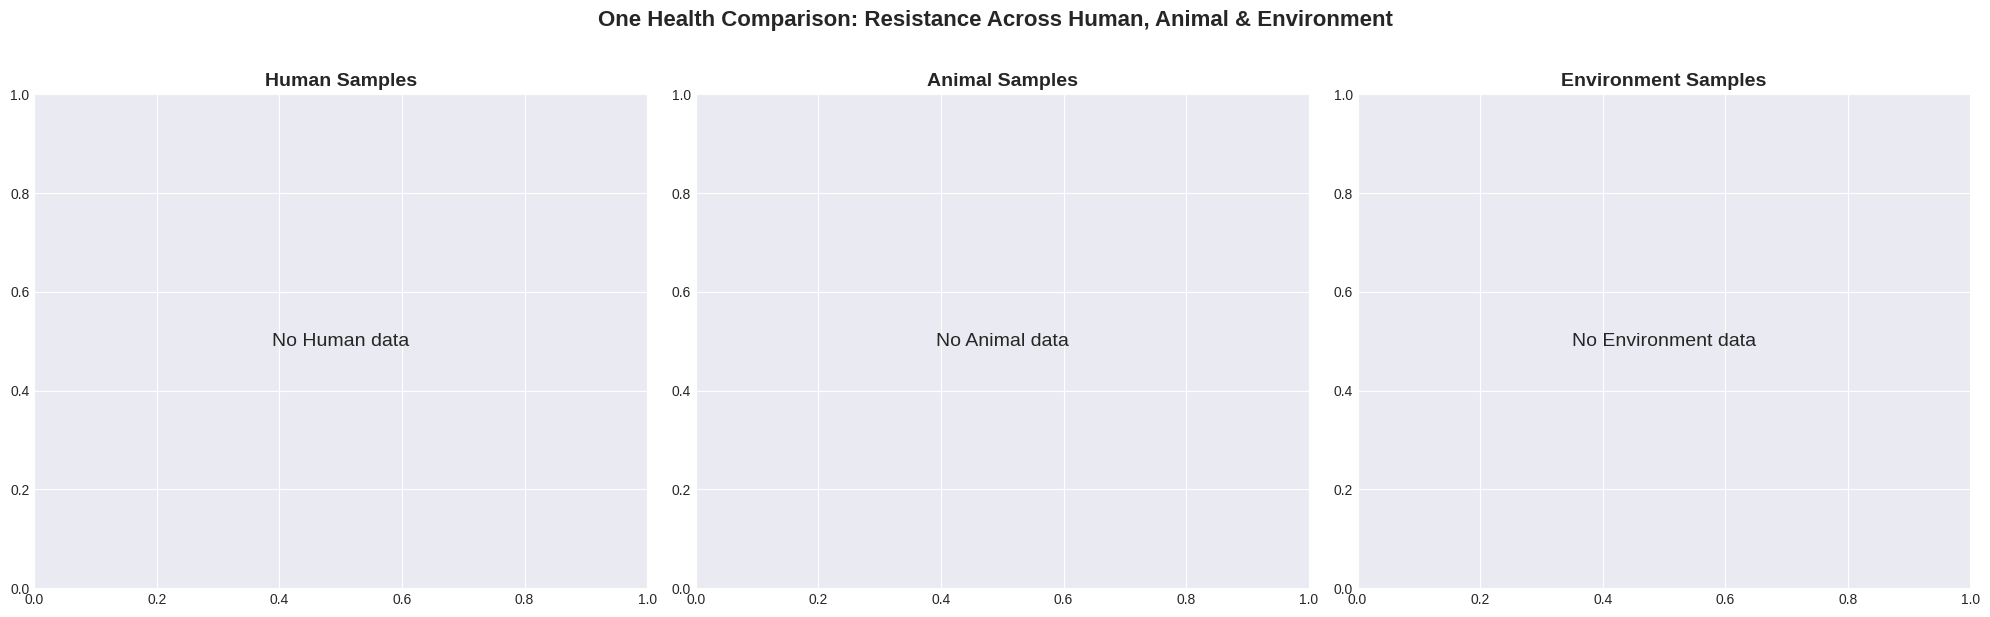


4. Human Samples - Individual Analysis

5. Animal Samples - Individual Analysis

6. Environmental Samples - Individual Analysis

ANALYSIS COMPLETE!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ====================
# 1. DATA LOADING
# ====================

def load_all_amr_data():
    """Upload and load Human, Animal, and Environmental AMR data from Excel files"""
    print("Upload your Human AMR Excel file (.xlsx or .xls):")
    uploaded_human = files.upload()
    human_file = list(uploaded_human.keys())[0]

    if human_file.endswith(('.xlsx', '.xls')):
        human_df = pd.read_excel(io.BytesIO(uploaded_human[human_file]))
    else:
        human_df = pd.read_csv(io.BytesIO(uploaded_human[human_file]), sep='\t', encoding='utf-8')

    print("\nUpload your Animal AMR Excel file (.xlsx or .xls):")
    uploaded_animal = files.upload()
    animal_file = list(uploaded_animal.keys())[0]

    if animal_file.endswith(('.xlsx', '.xls')):
        animal_df = pd.read_excel(io.BytesIO(uploaded_animal[animal_file]))
    else:
        animal_df = pd.read_csv(io.BytesIO(uploaded_animal[animal_file]), sep='\t', encoding='utf-8')

    print("\nUpload your Environmental AMR Excel file (.xlsx or .xls):")
    uploaded_env = files.upload()
    env_file = list(uploaded_env.keys())[0]

    if env_file.endswith(('.xlsx', '.xls')):
        env_df = pd.read_excel(io.BytesIO(uploaded_env[env_file]))
    else:
        env_df = pd.read_csv(io.BytesIO(uploaded_env[env_file]), sep='\t', encoding='utf-8')

    # Add source labels
    human_df['Source'] = 'Human'
    animal_df['Source'] = 'Animal'
    env_df['Source'] = 'Environment'

    print(f"\n✓ Data loaded successfully!")
    print(f"Human rows: {len(human_df)}, Animal rows: {len(animal_df)}, Environment rows: {len(env_df)}")

    return human_df, animal_df, env_df

# ====================
# 2. ANTIBIOTIC CLASS MAPPING
# ====================

# Define antibiotic classes
antibiotic_classes = {
    'Aminoglycosides': ['Amikacin', 'Gentamicin', 'Gentamycin', 'Gentamicin High Level (synergy)'],
    'Carbapenems': ['Entrapenum', 'Imipenum', 'Meropenem', 'Metropenem'],
    'Cephalosporins': ['Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum',
                       'Cefepime', 'Cefoxitin', 'Ceftazidime'],
    'Fluoroquinolones': ['Ciprofloxacin', 'Levofloxacin'],
    'Lincosamides': ['Clindamycin'],
    'Macrolides': ['Erythromycin'],
    'Nitrofurans': ['Nitrofurantoin'],
    'Penicillins': ['Amoxycillin/Clavulanic acid', 'Benzylpenicillin', 'Piperacillin/Tazobactum'],
    'Polymyxins': ['Colistin'],
    'Rifamycins': ['Rifampicin'],
    'Sulfonamides': ['Trimethoprim/Sulfamethoxazole', 'Trimethoprim/Sulfmaethozole'],
    'Tetracyclines': ['Tetracyclin'],
    'Trimethoprims': ['Trimethoprim/Sulfamethoxazole', 'Trimethoprim/Sulfmaethozole'],
    'Oxazolidinones': ['Linezolid'],
    'Glycopeptides': ['Vanomycin', 'Teicoplanin'],
    'Other': ['Tigecycline', 'Fosfomycin', 'Daptomycin', 'Aztreonam', 'Minocyclin',
              'Minocycline', 'Beta-lactamase', 'Oxacillin', 'Cefoxitin Screen']
}

# Create reverse mapping
abx_to_class = {}
for class_name, antibiotics in antibiotic_classes.items():
    for antibiotic in antibiotics:
        abx_to_class[antibiotic] = class_name

class_colors = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Lincosamides': '#4CAF50',
    'Macrolides': '#F44336',
    'Nitrofurans': '#00BCD4',
    'Other': '#607D8B',
    'Penicillins': '#E91E63',
    'Polymyxins': '#8BC34A',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Tetracyclines': '#CDDC39',
    'Trimethoprims': '#009688',
    'Oxazolidinones': '#673AB7',
    'Glycopeptides': '#FF5722'
}

# ====================
# 3. PROCESS DATA (Following your workflow)
# ====================

def process_amr_data(df, source_name):
    """Process AMR data following your exact workflow"""

    print(f"\n  DEBUG - {source_name}:")
    print(f"  Total rows in dataframe: {len(df)}")
    print(f"  Columns in dataframe: {len(df.columns)}")

    # Get all antibiotic columns
    all_antibiotics = [ab for abs_list in antibiotic_classes.values() for ab in abs_list]
    antibiotic_columns = [col for col in df.columns if col in all_antibiotics]

    print(f"  Matching antibiotic columns found: {len(antibiotic_columns)}")
    if len(antibiotic_columns) > 0:
        print(f"  Sample antibiotic columns: {antibiotic_columns[:5]}")
    else:
        print(f"  ⚠ No matching antibiotic columns!")
        print(f"  Available columns in data: {df.columns.tolist()[:20]}")

    # Create combined dataframe with Farm Name and antibiotics
    if 'Farm Name' in df.columns:
        location_col = 'Farm Name'
    elif 'Sample Code' in df.columns:
        location_col = 'Sample Code'
    else:
        # Create a placeholder location
        df['Location'] = source_name
        location_col = 'Location'

    print(f"  Using location column: {location_col}")

    # Combine location with antibiotic data
    df_combined = pd.concat([df[[location_col]], df[antibiotic_columns]], axis=1)

    # Check what values exist in antibiotic columns
    if len(antibiotic_columns) > 0:
        sample_col = antibiotic_columns[0]
        unique_values = df_combined[sample_col].unique()[:10]
        print(f"  Sample values in '{sample_col}': {unique_values}")

        # Count 'R' values
        r_count = (df_combined[antibiotic_columns] == 'R').sum().sum()
        print(f"  Total 'R' values found: {r_count}")

    # Convert to long format (melt)
    df_long = df_combined.melt(
        id_vars=[location_col],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    print(f"  Rows after melting: {len(df_long)}")
    print(f"  Unique resistance statuses: {df_long['Resistance Status'].unique()[:10]}")
    print(f"  Count of 'R' in melted data: {(df_long['Resistance Status'] == 'R').sum()}")

    # Map antibiotics to classes
    df_long['Antibiotic Class'] = df_long['Antibiotic'].map(abx_to_class)

    # Clean location names
    df_long[location_col] = df_long[location_col].astype(str).str.strip().str.upper()

    # Filter for resistant isolates ('R') and group
    resistance_by_location_class = (
        df_long[df_long['Resistance Status'] == 'R']
        .groupby([location_col, 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
    )

    resistance_by_location_class.rename(columns={location_col: 'Location'}, inplace=True)

    return resistance_by_location_class

# ====================
# 4. VISUALIZATION: STACKED BAR CHART (Your exact style)
# ====================

def plot_stacked_resistance(resistance_by_location_class, title='Stacked Distribution of Resistant Isolates'):
    """Create stacked bar chart exactly like your original code"""

    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data available for: {title}")
        return

    # Prepare data
    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort locations by total resistance (descending) and limit to top 15
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    # X positions
    x = np.arange(len(locations))

    # Initialize bottom for stacking
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for antibiotic_class_name in classes:
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')

        plt.bar(
            x,
            counts,
            bottom=bottom,
            label=antibiotic_class_name,
            color=bar_color,
            edgecolor='black'
        )

        # Value labels (avoid clutter)
        for xi, yi, bi in zip(x, counts, bottom):
            if yi >= 3:
                plt.text(
                    xi,
                    bi + yi / 2,
                    int(yi),
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom += np.array(counts)

    # Axis formatting
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')

    plt.xticks(x, locations, rotation=45, ha='right')

    # Add top padding
    max_bottom = bottom.max()
    if max_bottom > 0:
        plt.ylim(0, max_bottom * 1.15)

    # Clean spines
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.2)

    # Legend
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize='small'
    )

    plt.tight_layout()
    plt.show()

# ====================
# 5. GROUPED BAR CHART (Your original style)
# ====================

def plot_grouped_resistance(resistance_by_location_class, title='Resistant Isolates per Farm and Antibiotic Class'):
    """Create grouped bar chart exactly like your original code"""

    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data available for: {title}")
        return

    # Prepare data
    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort and limit
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    # Spacing parameters
    bar_width = 0.10
    inner_spacing = 0.06
    group_spacing = 0.8

    group_width = len(classes) * (bar_width + inner_spacing)
    x = np.arange(len(locations)) * (group_width + group_spacing)

    plt.figure(figsize=(16, 8))

    for i, antibiotic_class_name in enumerate(classes):
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        ordered_counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')
        bar_positions = x + i * (bar_width + inner_spacing)

        plt.bar(
            bar_positions,
            ordered_counts,
            width=bar_width,
            label=antibiotic_class_name,
            edgecolor='black',
            color=bar_color
        )

        # Value labels
        for xi, yi in zip(bar_positions, ordered_counts):
            if yi > 0:
                plt.text(xi, yi + yi * 0.03, int(yi),
                         ha='center', va='bottom', fontsize=8)

    # Axis formatting
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')

    plt.xticks(
        x + group_width / 2 - (bar_width + inner_spacing) / 2,
        locations,
        rotation=45,
        ha='right'
    )

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()

# ====================
# 6. THREE-PANEL COMPARISON
# ====================

def plot_three_panel_comparison(human_resistance, animal_resistance, env_resistance):
    """Create side-by-side comparison of all three sources"""

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    datasets = [
        (human_resistance, 'Human', '#3B82F6'),
        (animal_resistance, 'Animal', '#10B981'),
        (env_resistance, 'Environment', '#F59E0B')
    ]

    for idx, (data, source, color) in enumerate(datasets):
        if len(data) == 0:
            axes[idx].text(0.5, 0.5, f'No {source} data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        locations = data['Location'].unique()
        classes = data['Antibiotic Class'].unique()

        # Sort and limit to top 10
        location_totals = data.groupby('Location')['Resistant Count'].sum()
        locations = location_totals.sort_values(ascending=False).head(10).index

        x = np.arange(len(locations))
        bottom = np.zeros(len(locations))

        for antibiotic_class_name in classes:
            subset = data[data['Antibiotic Class'] == antibiotic_class_name]

            counts = [
                subset[subset['Location'] == location]['Resistant Count'].values[0]
                if location in subset['Location'].values else 0
                for location in locations
            ]

            bar_color = class_colors.get(antibiotic_class_name, 'gray')

            axes[idx].bar(
                x,
                counts,
                bottom=bottom,
                label=antibiotic_class_name if idx == 2 else '',
                color=bar_color,
                edgecolor='black',
                linewidth=0.5
            )

            # Value labels
            for xi, yi, bi in zip(x, counts, bottom):
                if yi >= 2:
                    axes[idx].text(
                        xi, bi + yi / 2, int(yi),
                        ha='center', va='center', fontsize=7, fontweight='bold'
                    )

            bottom += np.array(counts)

        total_samples = location_totals.sum()
        axes[idx].set_title(f'{source} (n={int(total_samples)} resistant isolates)',
                           fontsize=13, fontweight='bold')
        axes[idx].set_xlabel('Location', fontsize=10, fontweight='bold')
        if idx == 0:
            axes[idx].set_ylabel('Resistant Isolates', fontsize=10, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(locations, rotation=45, ha='right', fontsize=8)
        axes[idx].set_ylim(0, bottom.max() * 1.15 if bottom.max() > 0 else 1)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)

    # Add legend
    handles, labels = axes[2].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=9)

    plt.suptitle('One Health Comparison: Resistance Across Human, Animal & Environment',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ====================
# 7. MAIN EXECUTION
# ====================

print("="*70)
print("ONE HEALTH AMR VISUALIZATION - Following Your Exact Workflow")
print("="*70)

# Load all data
human_df, animal_df, env_df = load_all_amr_data()

# Process each dataset
print("\nProcessing Human data...")
human_resistance = process_amr_data(human_df, 'Human')
print(f"  Found {len(human_resistance)} location-class combinations with resistance")

print("\nProcessing Animal data...")
animal_resistance = process_amr_data(animal_df, 'Animal')
print(f"  Found {len(animal_resistance)} location-class combinations with resistance")

print("\nProcessing Environmental data...")
env_resistance = process_amr_data(env_df, 'Environment')
print(f"  Found {len(env_resistance)} location-class combinations with resistance")

# Combine all data
print("\nCombining all sources...")
all_resistance = pd.concat([human_resistance, animal_resistance, env_resistance], ignore_index=True)
print(f"  Total: {len(all_resistance)} location-class combinations across all sources")

# Generate visualizations
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# 1. Combined stacked chart (all sources)
print("\n1. Combined Analysis - Stacked Bar Chart (All Sources)")
plot_stacked_resistance(
    all_resistance,
    'Stacked Distribution of Resistant Isolates - All Sources Combined'
)

# 2. Combined grouped chart (all sources)
print("\n2. Combined Analysis - Grouped Bar Chart (All Sources)")
plot_grouped_resistance(
    all_resistance,
    'Resistant Isolates per Location and Antibiotic Class - All Sources'
)

# 3. Three-panel comparison
print("\n3. One Health Comparison - Side by Side")
plot_three_panel_comparison(human_resistance, animal_resistance, env_resistance)

# 4. Individual source analyses
print("\n4. Human Samples - Individual Analysis")
if len(human_resistance) > 0:
    plot_stacked_resistance(
        human_resistance,
        'Stacked Distribution of Resistant Isolates - Human Only'
    )
    plot_grouped_resistance(
        human_resistance,
        'Resistant Isolates per Location and Antibiotic Class - Human Only'
    )

print("\n5. Animal Samples - Individual Analysis")
if len(animal_resistance) > 0:
    plot_stacked_resistance(
        animal_resistance,
        'Stacked Distribution of Resistant Isolates - Animal Only'
    )
    plot_grouped_resistance(
        animal_resistance,
        'Resistant Isolates per Location and Antibiotic Class - Animal Only'
    )

print("\n6. Environmental Samples - Individual Analysis")
if len(env_resistance) > 0:
    plot_stacked_resistance(
        env_resistance,
        'Stacked Distribution of Resistant Isolates - Environment Only'
    )
    plot_grouped_resistance(
        env_resistance,
        'Resistant Isolates per Location and Antibiotic Class - Environment Only'
    )

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

ONE HEALTH AMR VISUALIZATION
Upload your Human AMR Excel file (.xlsx):


Saving Human Samples.xlsx to Human Samples (11).xlsx

  Initial shape: (696, 54)
  After header fix: (695, 54)
  Sample antibiotic columns: ['Amoxycillin/Clavulanic acid', 'Piperacillin/Tazobactum', 'Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone']

Upload your Animal AMR Excel file (.xlsx):


Saving Animal Samples.xlsx to Animal Samples (8).xlsx

  Initial shape: (469, 56)
  After header fix: (468, 56)
  Sample antibiotic columns: ['Ceftriaxone', 'Cefoperazone/Sulbactum', 'Cefepime', 'Entrapenum', 'Imipenum']

Upload your Environmental AMR Excel file (.xlsx):


Saving Enviormental Samples.xlsx to Enviormental Samples (8).xlsx

  Initial shape: (295, 56)
  After header fix: (294, 56)
  Sample antibiotic columns: ['Ceftriaxone', 'Cefoperazone/Sulbactum', 'Cefepime', 'Entrapenum', 'Imipenum']

✓ All data loaded successfully!
Human rows: 695, Animal rows: 468, Environment rows: 294

  Processing Human:
  Antibiotic columns: 36
  Sample columns: ['Amoxycillin/Clavulanic acid', 'Piperacillin/Tazobactum', 'Cefuroxime']
  Total 'R' values found: 267
  Found 46 location-class combinations

  Processing Animal:
  Antibiotic columns: 36
  Sample columns: ['Ceftriaxone', 'Cefoperazone/Sulbactum', 'Cefepime']
  Total 'R' values found: 56
  Found 22 location-class combinations

  Processing Environment:
  Antibiotic columns: 36
  Sample columns: ['Ceftriaxone', 'Cefoperazone/Sulbactum', 'Cefepime']
  Total 'R' values found: 16
  Found 6 location-class combinations

✓ Combined total: 74 location-class combinations

VISUALIZATIONS

1. Combined Stacked Chart 

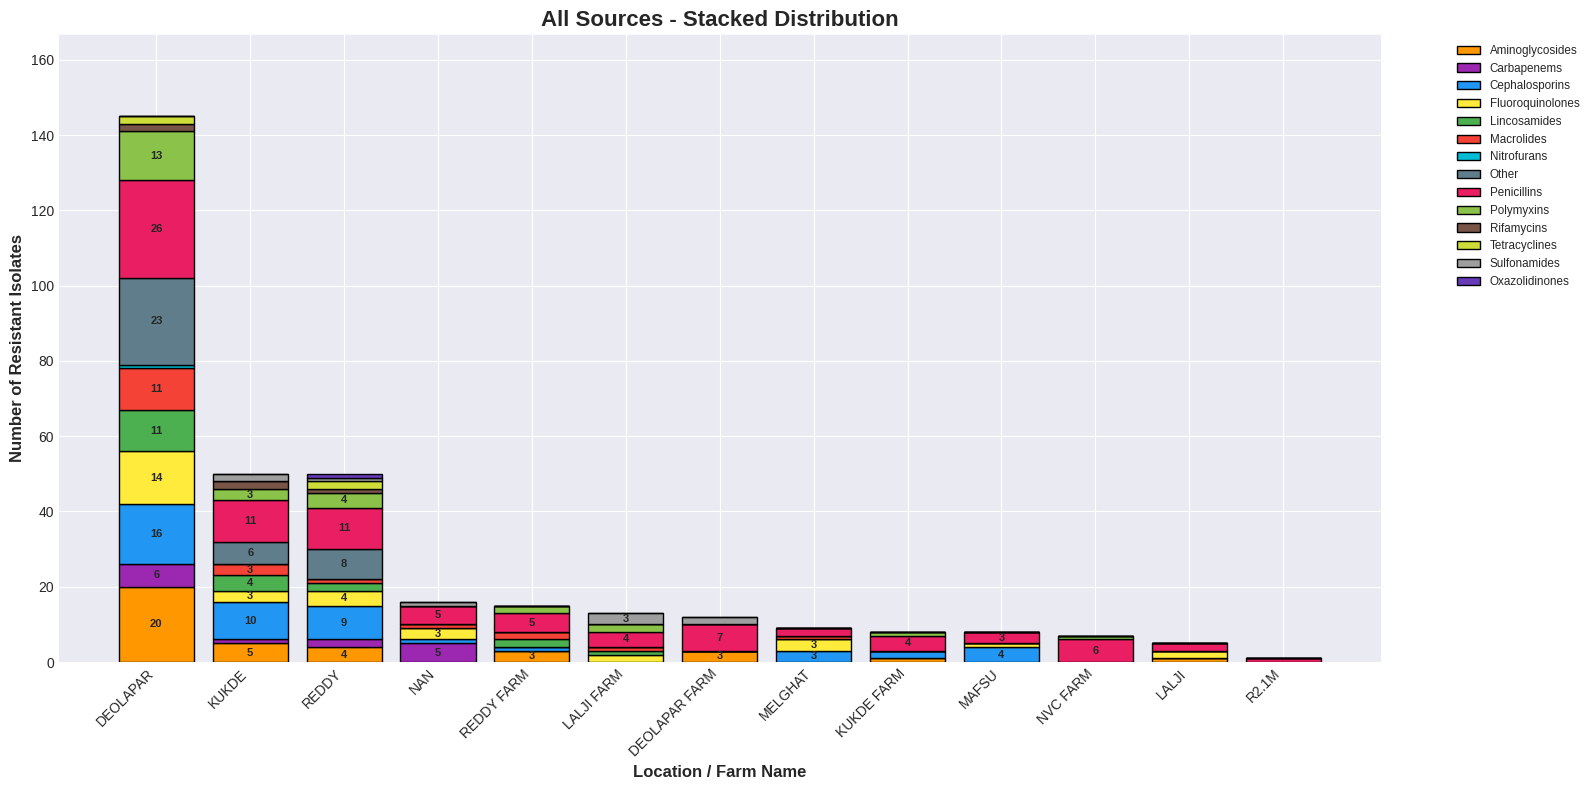


2. Combined Grouped Chart (All Sources)


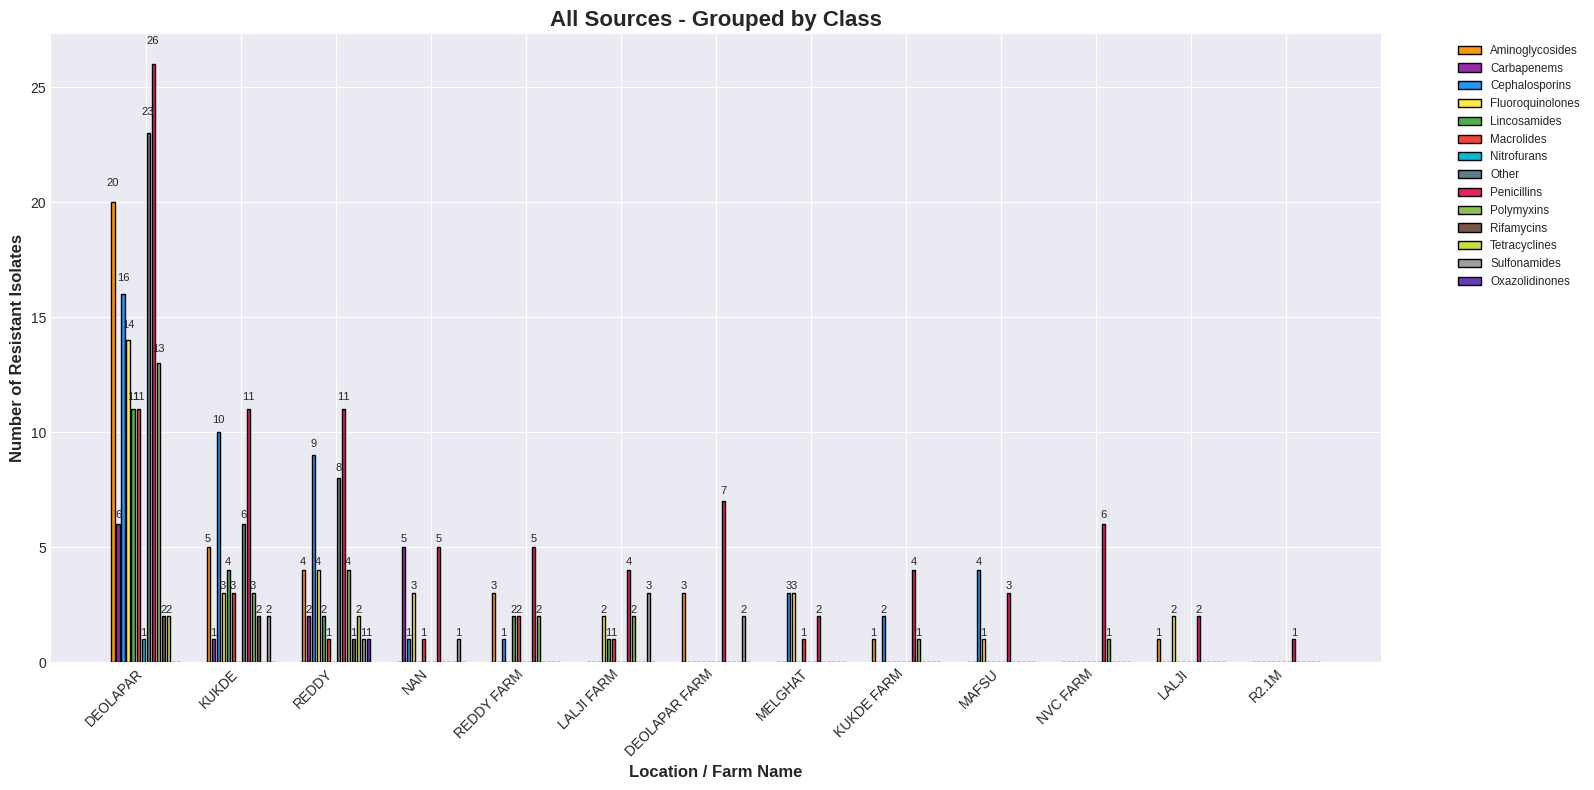


3. Three-Panel Comparison


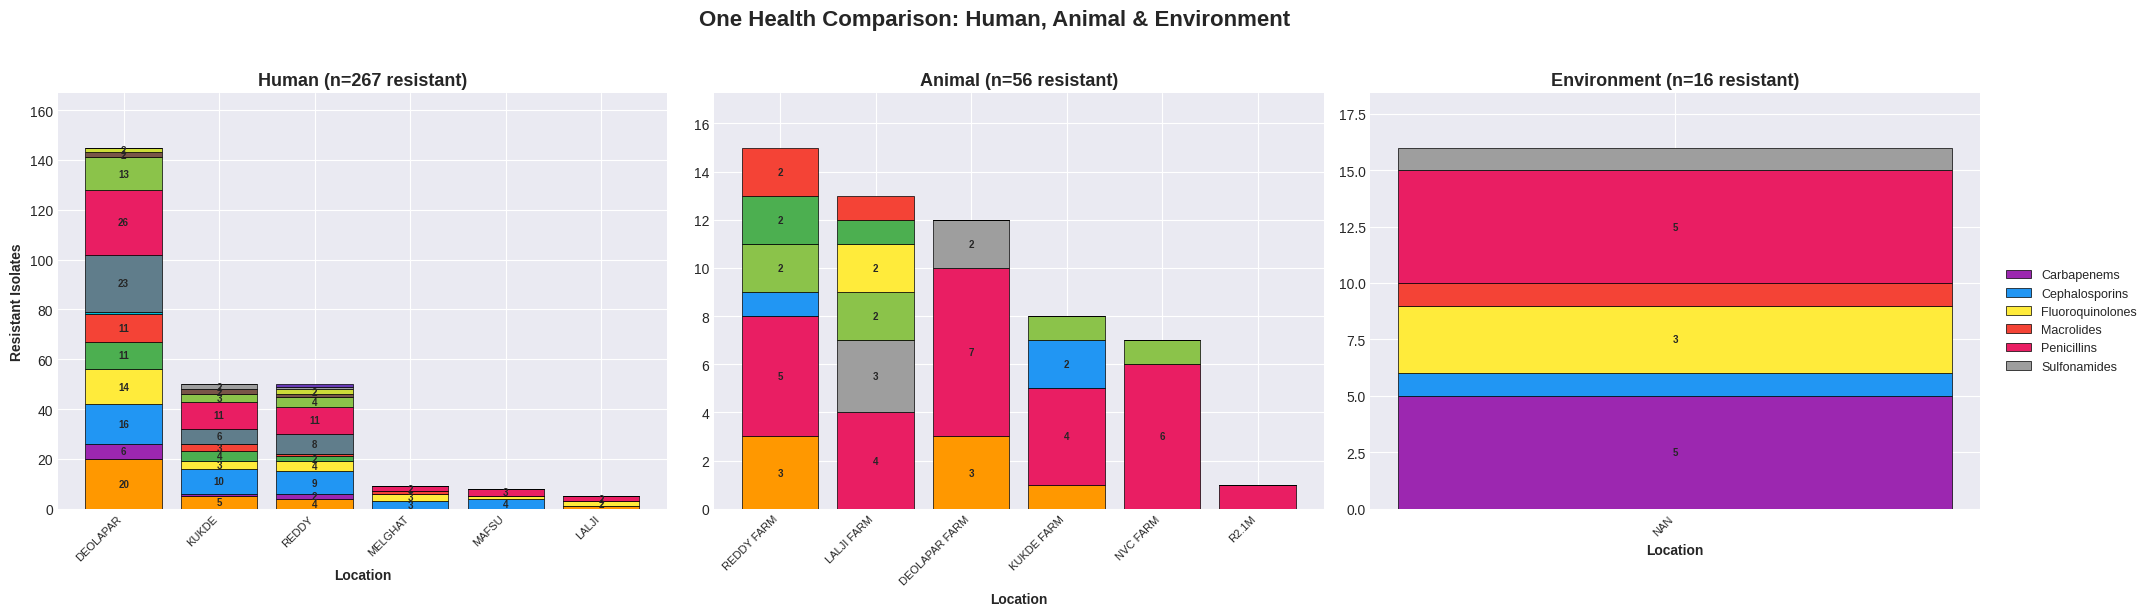


4. Human Analysis


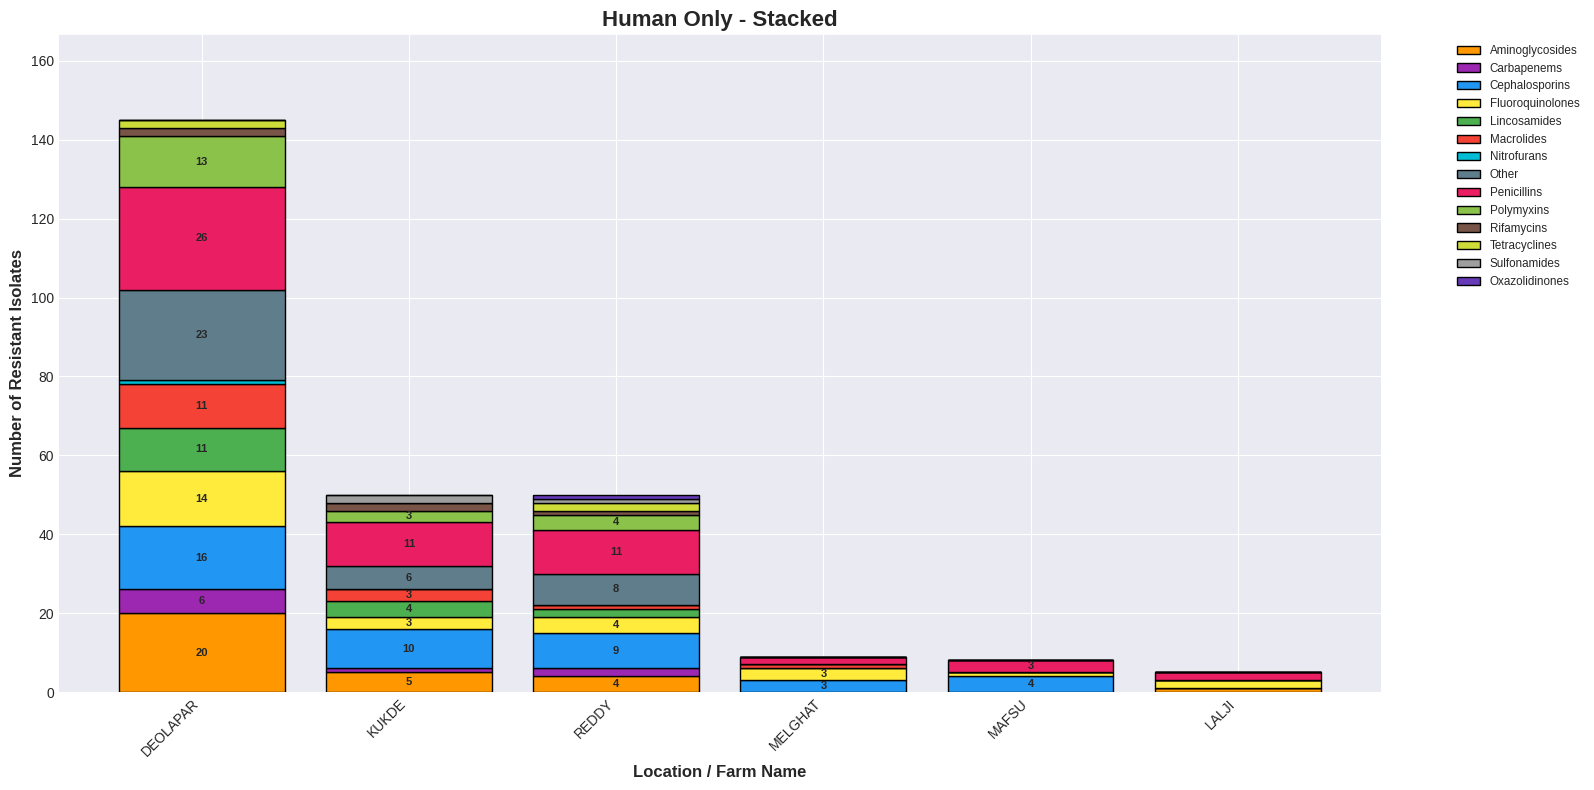

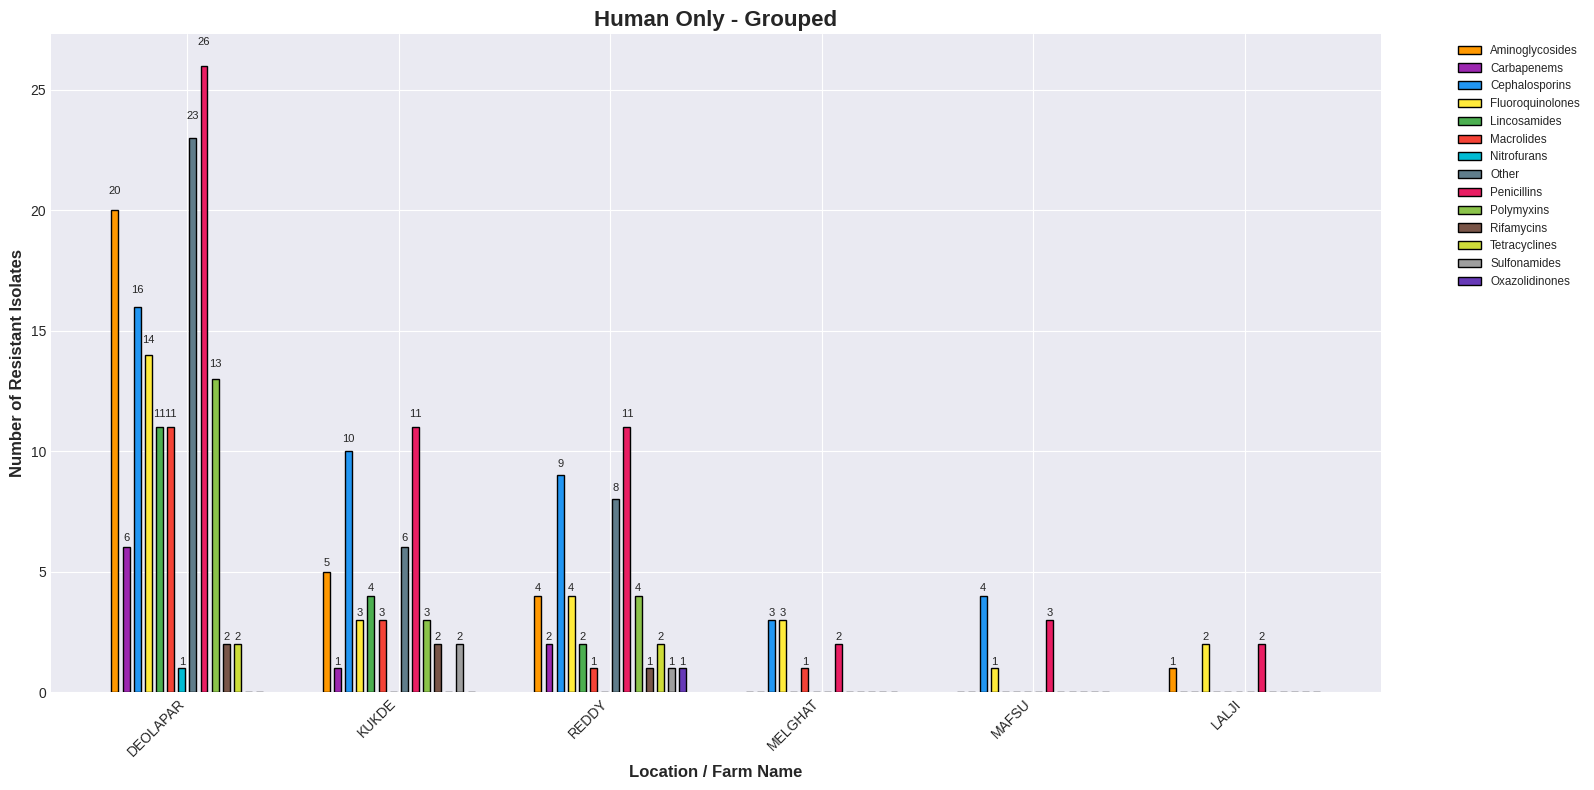


5. Animal Analysis


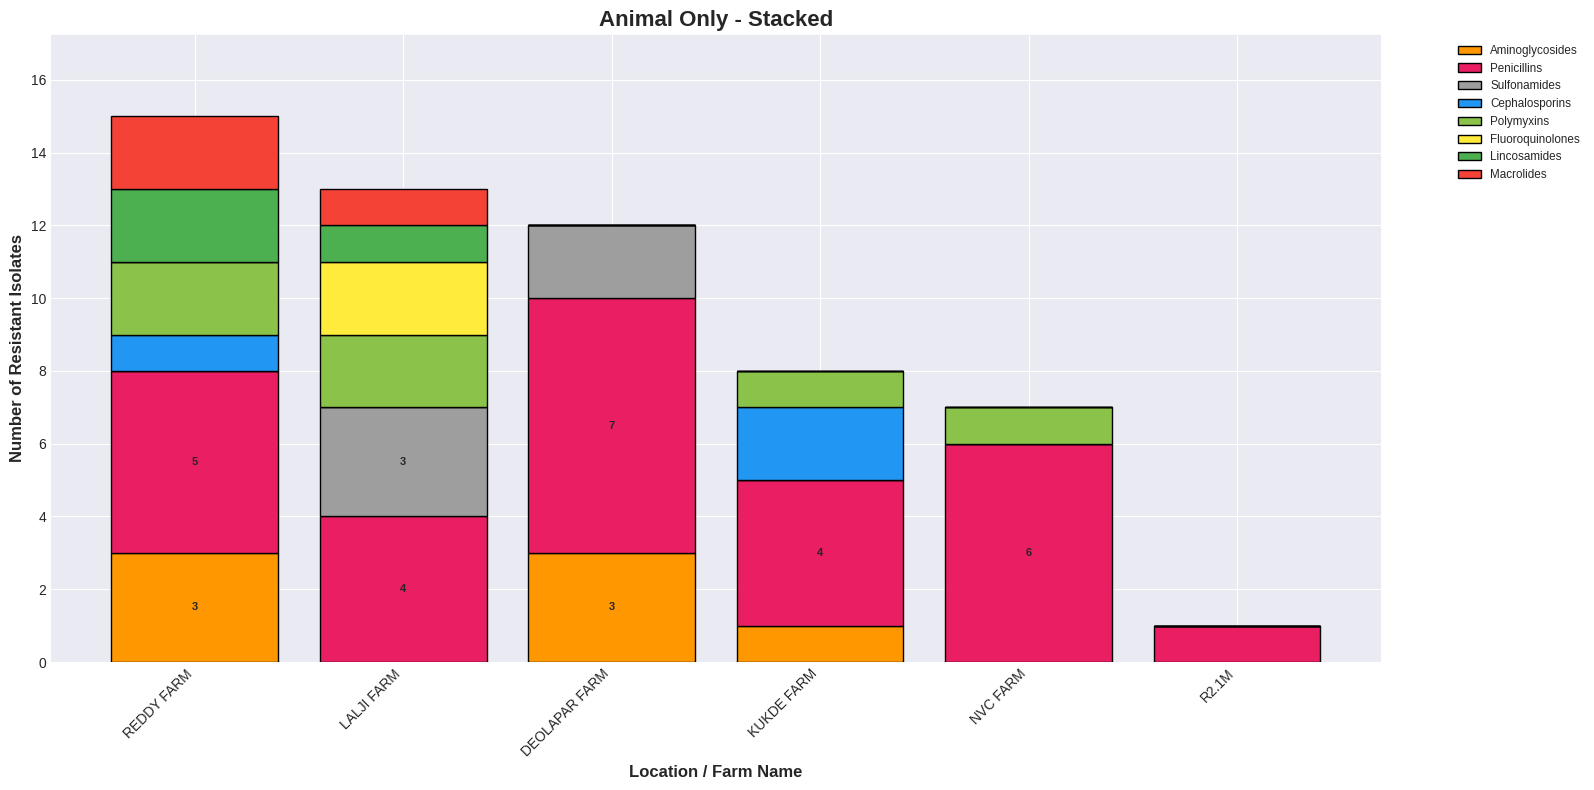

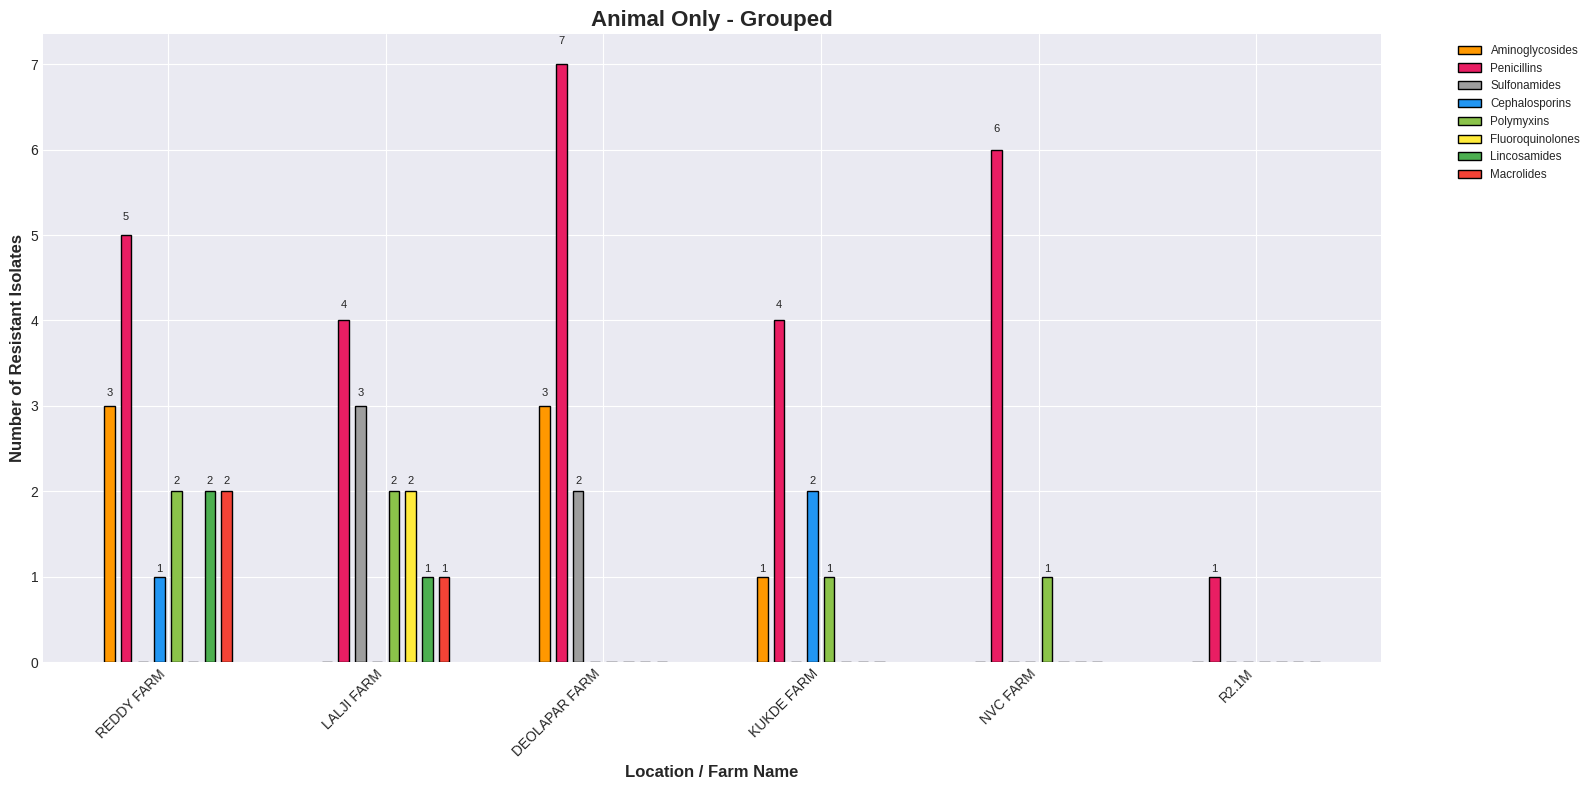


6. Environmental Analysis


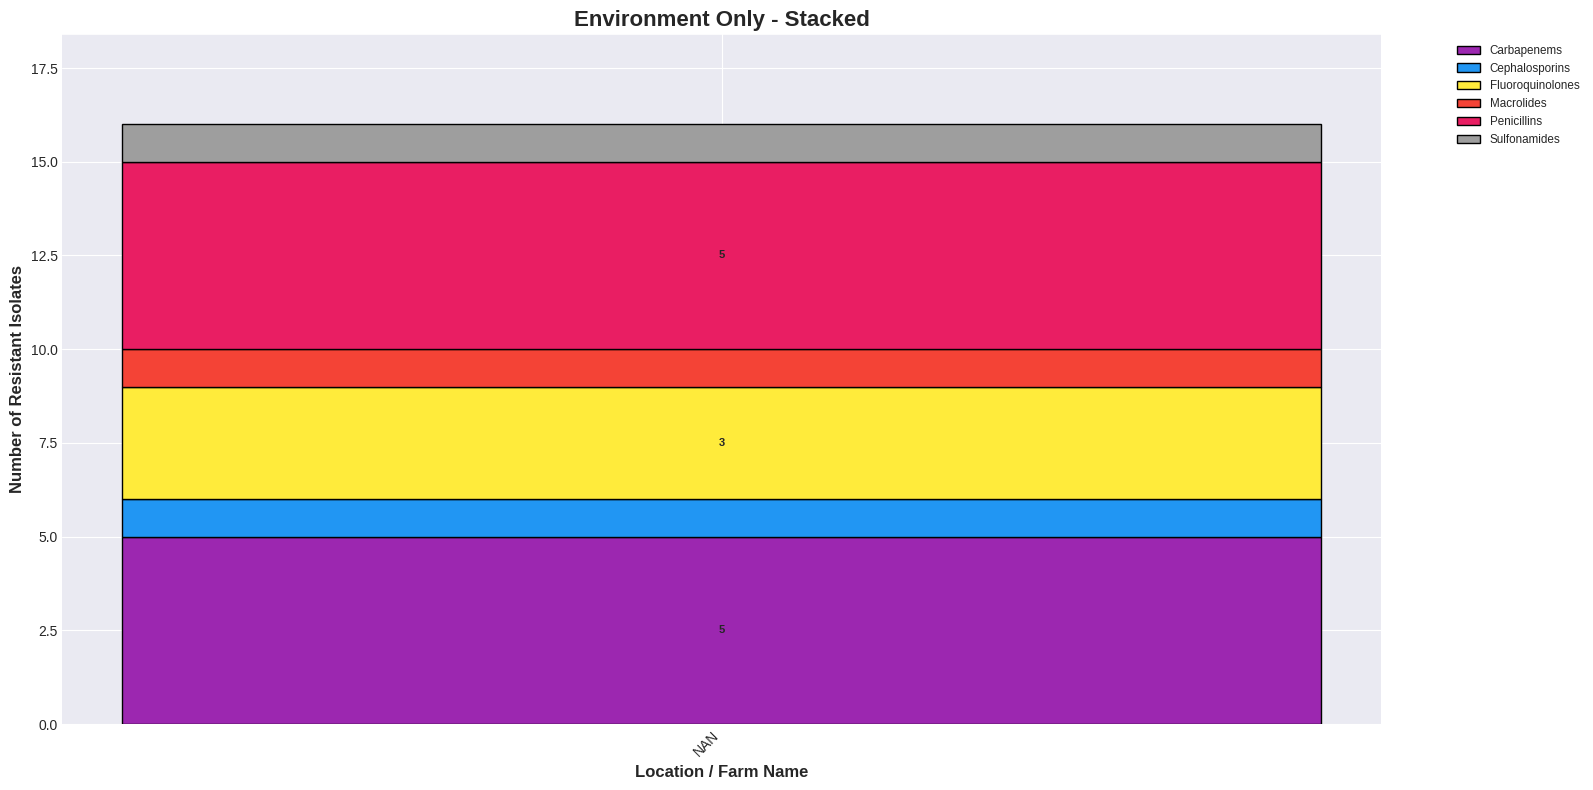

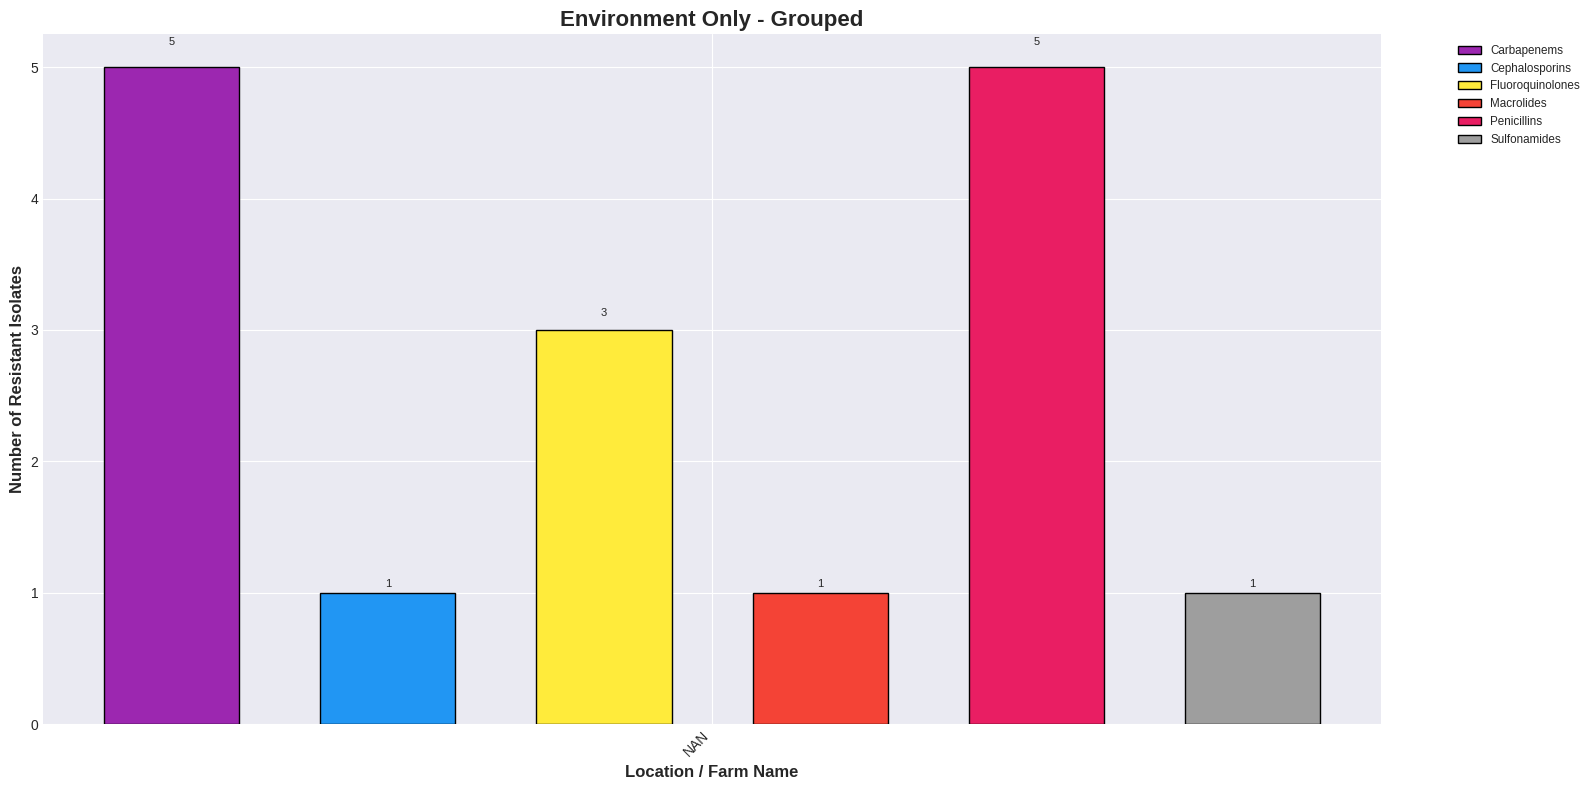


COMPLETE!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. DATA LOADING WITH HEADER FIX
# ====================

def load_and_fix_excel(file_bytes, source_name, start_idx=15, end_idx=50):
    """Load Excel and fix headers like your original code"""

    # Read Excel
    df = pd.read_excel(io.BytesIO(file_bytes))

    print(f"\n  Initial shape: {df.shape}")

    # Fix antibiotic headers (names are in row 0, cols start_idx to end_idx)
    abx_name_row = df.iloc[0, start_idx:end_idx+1]

    new_cols = list(df.columns)
    new_cols[start_idx:end_idx+1] = abx_name_row.tolist()
    df.columns = new_cols

    # Drop the row that contained antibiotic names
    df = df.drop(index=0).reset_index(drop=True)

    print(f"  After header fix: {df.shape}")
    print(f"  Sample antibiotic columns: {list(df.columns[start_idx:start_idx+5])}")

    # Add source label
    df['Source'] = source_name

    return df, start_idx, end_idx

def load_all_amr_data():
    """Upload and load Human, Animal, and Environmental AMR data"""
    print("Upload your Human AMR Excel file (.xlsx):")
    uploaded_human = files.upload()
    human_file = list(uploaded_human.keys())[0]
    human_df, h_start, h_end = load_and_fix_excel(uploaded_human[human_file], 'Human')

    print("\nUpload your Animal AMR Excel file (.xlsx):")
    uploaded_animal = files.upload()
    animal_file = list(uploaded_animal.keys())[0]
    animal_df, a_start, a_end = load_and_fix_excel(uploaded_animal[animal_file], 'Animal')

    print("\nUpload your Environmental AMR Excel file (.xlsx):")
    uploaded_env = files.upload()
    env_file = list(uploaded_env.keys())[0]
    env_df, e_start, e_end = load_and_fix_excel(uploaded_env[env_file], 'Environment')

    print(f"\n✓ All data loaded successfully!")
    print(f"Human rows: {len(human_df)}, Animal rows: {len(animal_df)}, Environment rows: {len(env_df)}")

    # Use the common start/end indices (assuming all files have same structure)
    return human_df, animal_df, env_df, h_start, h_end

# ====================
# 2. ANTIBIOTIC CLASS MAPPING (Your keyword-based approach)
# ====================

ABX_KEYWORD_TO_CLASS = {
    # aminoglycosides
    "AMIKACIN": "Aminoglycosides", "AMK": "Aminoglycosides",
    "GENTAMICIN": "Aminoglycosides", "GENTAMYCIN": "Aminoglycosides", "GEN": "Aminoglycosides",
    "TOBRAMYCIN": "Aminoglycosides", "TOB": "Aminoglycosides",
    "KANAMYCIN": "Aminoglycosides", "KAN": "Aminoglycosides",
    # carbapenems
    "IMIPENEM": "Carbapenems", "IMIPENUM": "Carbapenems", "IPM": "Carbapenems",
    "MEROPENEM": "Carbapenems", "METROPENEM": "Carbapenems", "MEM": "Carbapenems",
    "ERTAPENEM": "Carbapenems", "ENTRAPENUM": "Carbapenems",
    # cephalosporins
    "CEFTRIAXONE": "Cephalosporins", "CEFOTAXIME": "Cephalosporins",
    "CEFTAZIDIME": "Cephalosporins", "CEFEPIME": "Cephalosporins",
    "CEFUROXIME": "Cephalosporins", "CEFAZOLIN": "Cephalosporins",
    "CEFOPERAZONE": "Cephalosporins", "CEFOXITIN": "Cephalosporins",
    # fluoroquinolones
    "CIPROFLOXACIN": "Fluoroquinolones", "CIPRO": "Fluoroquinolones",
    "LEVOFLOXACIN": "Fluoroquinolones", "OFLOXACIN": "Fluoroquinolones",
    # macrolides
    "AZITHROMYCIN": "Macrolides", "ERYTHROMYCIN": "Macrolides",
    "CLARITHROMYCIN": "Macrolides",
    # penicillins
    "PIPERACILLIN": "Penicillins", "AMPICILLIN": "Penicillins",
    "AMOXICILLIN": "Penicillins", "AMOXYCILLIN": "Penicillins",
    "AMOX": "Penicillins", "BENZYLPENICILLIN": "Penicillins",
    "TAZOBACTUM": "Penicillins", "TAZOBACTAM": "Penicillins",
    # glycopeptides
    "VANCOMYCIN": "Glycopeptides", "VANOMYCIN": "Glycopeptides", "VAN": "Glycopeptides",
    "TEICOPLANIN": "Glycopeptides",
    # polymyxins
    "COLISTIN": "Polymyxins", "COL": "Polymyxins",
    # tetracyclines
    "TETRACYCLINE": "Tetracyclines", "TETRACYCLIN": "Tetracyclines",
    "DOXYCYCLINE": "Tetracyclines", "TIGECYCLINE": "Tetracyclines",
    # lincosamides
    "CLINDAMYCIN": "Lincosamides", "CLI": "Lincosamides",
    # oxazolidinones
    "LINEZOLID": "Oxazolidinones",
    # nitrofurans
    "NITROFURANTOIN": "Nitrofurans", "NITROFURAN": "Nitrofurans",
    # rifamycins
    "RIFAMPICIN": "Rifamycins", "RIFAMPIN": "Rifamycins",
    # sulfonamides / trimethoprim
    "SULFAMETHOXAZOLE": "Sulfonamides", "SULFMAETHOZOLE": "Sulfonamides",
    "TRIMETHOPRIM": "Trimethoprims", "CO-TRIMOXAZOLE": "Sulfonamides/Trimethoprim",
    "SXT": "Sulfonamides/Trimethoprim", "TMP-SMX": "Sulfonamides/Trimethoprim",
    # monobactams
    "AZTREONAM": "Monobactams",
    # others
    "FOSFOMYCIN": "Other", "DAPTOMYCIN": "Other", "MINOCYCLIN": "Other",
    "MINOCYCLINE": "Other", "OXACILLIN": "Other"
}

def assign_class_by_keywords(ab_name):
    """Return a class name by searching keywords in antibiotic name"""
    if pd.isna(ab_name):
        return "Other"
    name = str(ab_name).upper()

    # First try exact mapping keys
    for key, cls in ABX_KEYWORD_TO_CLASS.items():
        if key in name:
            return cls

    # Fallback: check tokens
    tokens = [t for t in re.split(r"[ \-/()]+", name) if t]
    for t in tokens:
        for key, cls in ABX_KEYWORD_TO_CLASS.items():
            if key == t:
                return cls

    return "Other"

class_colors = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Lincosamides': '#4CAF50',
    'Macrolides': '#F44336',
    'Nitrofurans': '#00BCD4',
    'Other': '#607D8B',
    'Penicillins': '#E91E63',
    'Polymyxins': '#8BC34A',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Tetracyclines': '#CDDC39',
    'Trimethoprims': '#009688',
    'Oxazolidinones': '#673AB7',
    'Glycopeptides': '#FF5722',
    'Sulfonamides/Trimethoprim': '#607D8B',
    'Monobactams': '#9E9D24'
}

# ====================
# 3. PROCESS DATA (Following your exact workflow)
# ====================

def process_amr_data(df, start_idx, end_idx, source_name):
    """Process AMR data following your exact workflow"""

    print(f"\n  Processing {source_name}:")

    # Extract antibiotic columns
    abx = df.iloc[:, start_idx:end_idx+1]

    # Clean values (strip spaces, uppercase)
    abx_clean = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

    print(f"  Antibiotic columns: {len(abx_clean.columns)}")
    print(f"  Sample columns: {list(abx_clean.columns[:3])}")

    # Count 'R' values
    r_count = (abx_clean == "R").sum().sum()
    print(f"  Total 'R' values found: {r_count}")

    if r_count == 0:
        print(f"  ⚠ No resistance found! Sample values:")
        for col in abx_clean.columns[:3]:
            print(f"    {col}: {abx_clean[col].unique()[:5]}")
        return pd.DataFrame()

    # Get Farm Name or Sample Code
    if 'Farm Name' in df.columns:
        location_col = 'Farm Name'
    elif 'Sample Code' in df.columns:
        location_col = 'Sample Code'
    else:
        df['Location'] = source_name
        location_col = 'Location'

    # Combine farm name with cleaned antibiotic data
    farm_name = df[location_col]
    df_combined = pd.concat([farm_name, abx_clean], axis=1)

    # Convert to long format
    df_long = df_combined.melt(
        id_vars=[location_col],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    # Map antibiotics to classes
    df_long['Antibiotic Class'] = df_long['Antibiotic'].apply(assign_class_by_keywords)

    # Clean location names
    df_long[location_col] = df_long[location_col].astype(str).str.strip().str.upper()

    # Filter for resistant isolates and group
    resistance_by_location_class = (
        df_long[df_long['Resistance Status'] == 'R']
        .groupby([location_col, 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
    )

    resistance_by_location_class.rename(columns={location_col: 'Location'}, inplace=True)

    print(f"  Found {len(resistance_by_location_class)} location-class combinations")

    return resistance_by_location_class

# ====================
# 4. VISUALIZATION: STACKED BAR CHART
# ====================

def plot_stacked_resistance(resistance_by_location_class, title='Stacked Distribution of Resistant Isolates'):
    """Create stacked bar chart"""

    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data for: {title}")
        return

    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    # Sort by total resistance
    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for antibiotic_class_name in classes:
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')

        plt.bar(
            x, counts, bottom=bottom,
            label=antibiotic_class_name,
            color=bar_color,
            edgecolor='black'
        )

        # Value labels
        for xi, yi, bi in zip(x, counts, bottom):
            if yi >= 3:
                plt.text(xi, bi + yi / 2, int(yi),
                        ha='center', va='center', fontsize=8, fontweight='bold')

        bottom += np.array(counts)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')
    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylim(0, bottom.max() * 1.15 if bottom.max() > 0 else 1)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_linewidth(1.2)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()

# ====================
# 5. GROUPED BAR CHART
# ====================

def plot_grouped_resistance(resistance_by_location_class, title='Resistant Isolates per Location and Antibiotic Class'):
    """Create grouped bar chart"""

    if len(resistance_by_location_class) == 0:
        print(f"⚠ No resistance data for: {title}")
        return

    locations = resistance_by_location_class['Location'].unique()
    classes = resistance_by_location_class['Antibiotic Class'].unique()

    location_totals = resistance_by_location_class.groupby('Location')['Resistant Count'].sum()
    locations = location_totals.sort_values(ascending=False).head(15).index

    bar_width = 0.10
    inner_spacing = 0.06
    group_spacing = 0.8

    group_width = len(classes) * (bar_width + inner_spacing)
    x = np.arange(len(locations)) * (group_width + group_spacing)

    plt.figure(figsize=(16, 8))

    for i, antibiotic_class_name in enumerate(classes):
        subset = resistance_by_location_class[
            resistance_by_location_class['Antibiotic Class'] == antibiotic_class_name
        ]

        ordered_counts = [
            subset[subset['Location'] == location]['Resistant Count'].values[0]
            if location in subset['Location'].values else 0
            for location in locations
        ]

        bar_color = class_colors.get(antibiotic_class_name, 'gray')
        bar_positions = x + i * (bar_width + inner_spacing)

        plt.bar(
            bar_positions, ordered_counts,
            width=bar_width,
            label=antibiotic_class_name,
            edgecolor='black',
            color=bar_color
        )

        for xi, yi in zip(bar_positions, ordered_counts):
            if yi > 0:
                plt.text(xi, yi + yi * 0.03, int(yi),
                        ha='center', va='bottom', fontsize=8)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Location / Farm Name', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Resistant Isolates', fontsize=12, fontweight='bold')
    plt.xticks(
        x + group_width / 2 - (bar_width + inner_spacing) / 2,
        locations, rotation=45, ha='right'
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()

# ====================
# 6. THREE-PANEL COMPARISON
# ====================

def plot_three_panel_comparison(human_resistance, animal_resistance, env_resistance):
    """Create side-by-side comparison"""

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    datasets = [
        (human_resistance, 'Human', '#3B82F6'),
        (animal_resistance, 'Animal', '#10B981'),
        (env_resistance, 'Environment', '#F59E0B')
    ]

    for idx, (data, source, color) in enumerate(datasets):
        if len(data) == 0:
            axes[idx].text(0.5, 0.5, f'No {source} data',
                          ha='center', va='center', fontsize=14)
            axes[idx].set_title(f'{source} Samples', fontsize=14, fontweight='bold')
            continue

        locations = data['Location'].unique()
        classes = data['Antibiotic Class'].unique()

        location_totals = data.groupby('Location')['Resistant Count'].sum()
        locations = location_totals.sort_values(ascending=False).head(10).index

        x = np.arange(len(locations))
        bottom = np.zeros(len(locations))

        for antibiotic_class_name in classes:
            subset = data[data['Antibiotic Class'] == antibiotic_class_name]

            counts = [
                subset[subset['Location'] == location]['Resistant Count'].values[0]
                if location in subset['Location'].values else 0
                for location in locations
            ]

            bar_color = class_colors.get(antibiotic_class_name, 'gray')

            axes[idx].bar(
                x, counts, bottom=bottom,
                label=antibiotic_class_name if idx == 2 else '',
                color=bar_color,
                edgecolor='black',
                linewidth=0.5
            )

            for xi, yi, bi in zip(x, counts, bottom):
                if yi >= 2:
                    axes[idx].text(xi, bi + yi / 2, int(yi),
                                  ha='center', va='center', fontsize=7, fontweight='bold')

            bottom += np.array(counts)

        total = location_totals.sum()
        axes[idx].set_title(f'{source} (n={int(total)} resistant)',
                           fontsize=13, fontweight='bold')
        axes[idx].set_xlabel('Location', fontsize=10, fontweight='bold')
        if idx == 0:
            axes[idx].set_ylabel('Resistant Isolates', fontsize=10, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(locations, rotation=45, ha='right', fontsize=8)
        axes[idx].set_ylim(0, bottom.max() * 1.15 if bottom.max() > 0 else 1)
        axes[idx].spines['right'].set_visible(False)
        axes[idx].spines['top'].set_visible(False)

    handles, labels = axes[2].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=9)

    plt.suptitle('One Health Comparison: Human, Animal & Environment',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# ====================
# 7. MAIN EXECUTION
# ====================

print("="*70)
print("ONE HEALTH AMR VISUALIZATION")
print("="*70)

# Load data with header fix
human_df, animal_df, env_df, start_idx, end_idx = load_all_amr_data()

# Process each dataset
human_resistance = process_amr_data(human_df, start_idx, end_idx, 'Human')
animal_resistance = process_amr_data(animal_df, start_idx, end_idx, 'Animal')
env_resistance = process_amr_data(env_df, start_idx, end_idx, 'Environment')

# Combine
all_resistance = pd.concat([human_resistance, animal_resistance, env_resistance], ignore_index=True)
print(f"\n✓ Combined total: {len(all_resistance)} location-class combinations")

# Generate visualizations
print("\n" + "="*70)
print("VISUALIZATIONS")
print("="*70)

print("\n1. Combined Stacked Chart (All Sources)")
plot_stacked_resistance(all_resistance, 'All Sources - Stacked Distribution')

print("\n2. Combined Grouped Chart (All Sources)")
plot_grouped_resistance(all_resistance, 'All Sources - Grouped by Class')

print("\n3. Three-Panel Comparison")
plot_three_panel_comparison(human_resistance, animal_resistance, env_resistance)

print("\n4. Human Analysis")
if len(human_resistance) > 0:
    plot_stacked_resistance(human_resistance, 'Human Only - Stacked')
    plot_grouped_resistance(human_resistance, 'Human Only - Grouped')

print("\n5. Animal Analysis")
if len(animal_resistance) > 0:
    plot_stacked_resistance(animal_resistance, 'Animal Only - Stacked')
    plot_grouped_resistance(animal_resistance, 'Animal Only - Grouped')

print("\n6. Environmental Analysis")
if len(env_resistance) > 0:
    plot_stacked_resistance(env_resistance, 'Environment Only - Stacked')
    plot_grouped_resistance(env_resistance, 'Environment Only - Grouped')

print("\n" + "="*70)
print("COMPLETE!")
print("="*70)


Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (12).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (9).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (9).xlsx


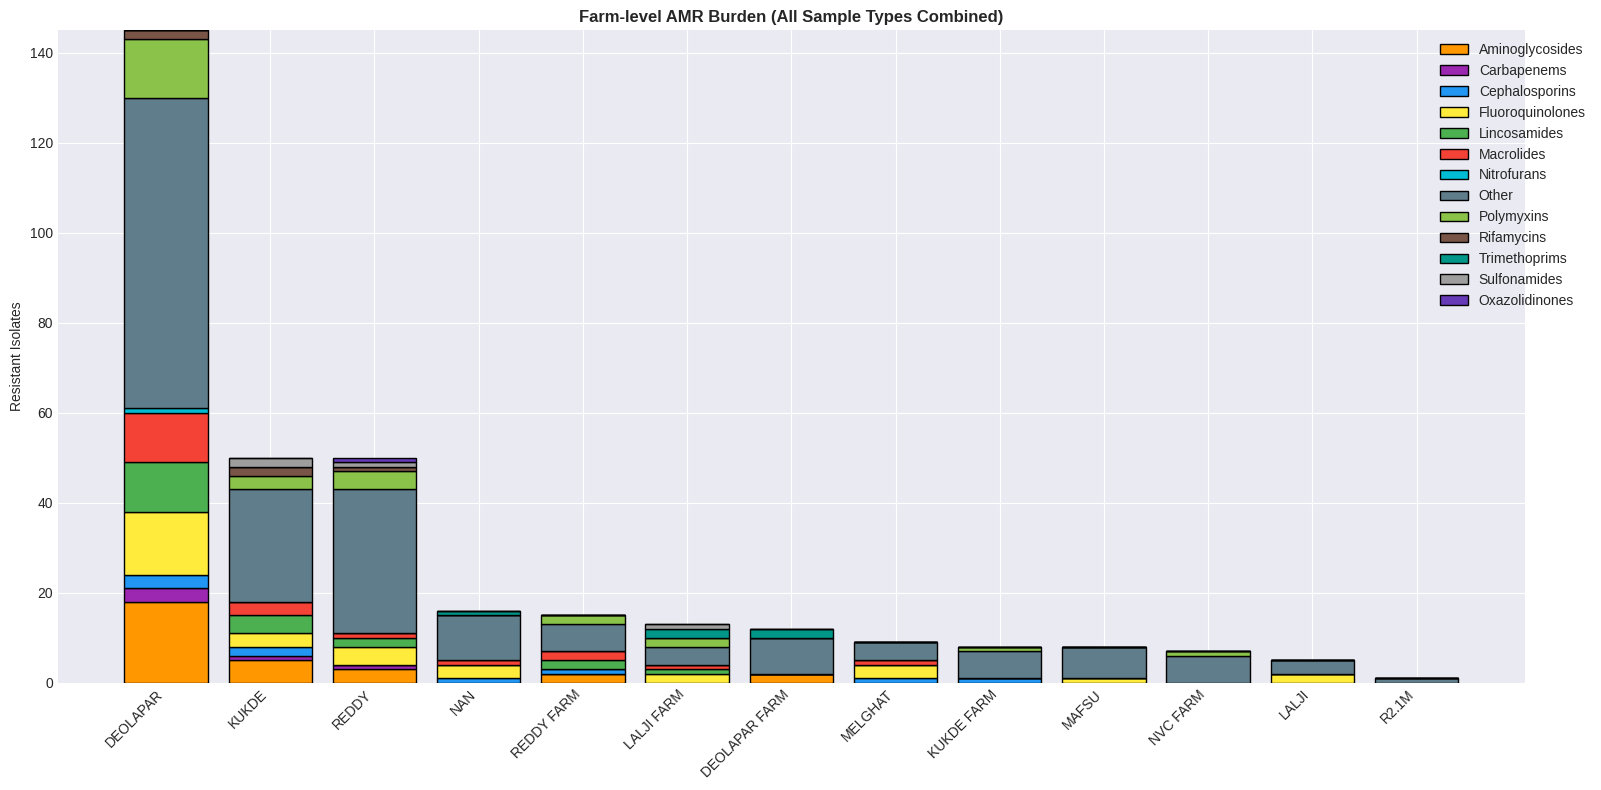

⚠ No 'Pathogen' column found.
✓ COMPLETE


In [ ]:
# ============================================================
# ONE HEALTH AMR VISUALIZATION – FARM & PATHOGEN AGGREGATION
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. DATA LOADING
# ====================

def load_and_fix_excel(file_bytes, source_name, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    abx_name_row = df.iloc[0, start_idx:end_idx+1]
    new_cols = list(df.columns)
    new_cols[start_idx:end_idx+1] = abx_name_row.tolist()
    df.columns = new_cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source_name

    return df, start_idx, end_idx


def load_all_amr_data():
    uploaded = {}

    for label in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {label} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        uploaded[label] = load_and_fix_excel(up[fname], label)

    human_df, h_start, h_end = uploaded['Human']
    animal_df, _, _ = uploaded['Animal']
    env_df, _, _ = uploaded['Environment']

    return human_df, animal_df, env_df, h_start, h_end


# ====================
# 2. ANTIBIOTIC CLASS MAPPING
# ====================

ABX_KEYWORD_TO_CLASS = {
    "AMIKACIN": "Aminoglycosides", "GENTAMICIN": "Aminoglycosides",
    "IMIPENEM": "Carbapenems", "MEROPENEM": "Carbapenems",
    "CEFTRIAXONE": "Cephalosporins", "CEFOTAXIME": "Cephalosporins",
    "CIPROFLOXACIN": "Fluoroquinolones", "LEVOFLOXACIN": "Fluoroquinolones",
    "AZITHROMYCIN": "Macrolides", "ERYTHROMYCIN": "Macrolides",
    "AMPICILLIN": "Penicillins", "AMOXICILLIN": "Penicillins",
    "VANCOMYCIN": "Glycopeptides",
    "COLISTIN": "Polymyxins",
    "TETRACYCLINE": "Tetracyclines", "DOXYCYCLINE": "Tetracyclines",
    "CLINDAMYCIN": "Lincosamides",
    "LINEZOLID": "Oxazolidinones",
    "NITROFURANTOIN": "Nitrofurans",
    "RIFAMPICIN": "Rifamycins",
    "SULFAMETHOXAZOLE": "Sulfonamides",
    "TRIMETHOPRIM": "Trimethoprims",
    "AZTREONAM": "Monobactams"
}

def assign_class_by_keywords(name):
    if pd.isna(name):
        return "Other"
    name = str(name).upper()
    for k, v in ABX_KEYWORD_TO_CLASS.items():
        if k in name:
            return v
    return "Other"


class_colors = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Macrolides': '#F44336',
    'Penicillins': '#E91E63',
    'Glycopeptides': '#FF5722',
    'Polymyxins': '#8BC34A',
    'Tetracyclines': '#CDDC39',
    'Lincosamides': '#4CAF50',
    'Oxazolidinones': '#673AB7',
    'Nitrofurans': '#00BCD4',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Trimethoprims': '#009688',
    'Monobactams': '#9E9D24',
    'Other': '#607D8B'
}

# ====================
# 3. PROCESSING
# ====================

def process_amr_data(df, start_idx, end_idx):
    abx = df.iloc[:, start_idx:end_idx+1]
    abx = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

    location_col = (
        'Farm Name' if 'Farm Name' in df.columns
        else 'Sample Code' if 'Sample Code' in df.columns
        else 'Source'
    )

    base = pd.concat([df[location_col], df['Source'], abx], axis=1)

    long = base.melt(
        id_vars=[location_col, 'Source'],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    long['Antibiotic Class'] = long['Antibiotic'].apply(assign_class_by_keywords)
    long[location_col] = long[location_col].astype(str).str.upper().str.strip()

    res = (
        long[long['Resistance Status'] == 'R']
        .groupby([location_col, 'Source', 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
        .rename(columns={location_col: 'Location'})
    )

    return res, long


# ====================
# 4. AGGREGATIONS (NEW)
# ====================

def aggregate_by_farm(all_resistance):
    return (
        all_resistance
        .groupby(['Location', 'Antibiotic Class'], as_index=False)
        ['Resistant Count']
        .sum()
    )


def aggregate_by_pathogen(df_long):
    if 'Pathogen' not in df_long.columns:
        print("⚠ No 'Pathogen' column found.")
        return pd.DataFrame()

    return (
        df_long[df_long['Resistance Status'] == 'R']
        .groupby(['Pathogen', 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
    )


# ====================
# 5. PLOTTING
# ====================

def plot_stacked(data, title, xcol='Location'):
    if data.empty:
        return

    locations = (
        data.groupby(xcol)['Resistant Count']
        .sum()
        .sort_values(ascending=False)
        .head(15)
        .index
    )

    classes = data['Antibiotic Class'].unique()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for cls in classes:
        subset = data[data['Antibiotic Class'] == cls]
        counts = [
            subset[subset[xcol] == loc]['Resistant Count'].sum()
            if loc in subset[xcol].values else 0
            for loc in locations
        ]

        plt.bar(
            x, counts, bottom=bottom,
            label=cls,
            color=class_colors.get(cls, 'gray'),
            edgecolor='black'
        )
        bottom += np.array(counts)

    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Resistant Isolates")
    plt.title(title, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()


# ====================
# 6. MAIN
# ====================

human_df, animal_df, env_df, start_idx, end_idx = load_all_amr_data()

human_res, human_long = process_amr_data(human_df, start_idx, end_idx)
animal_res, animal_long = process_amr_data(animal_df, start_idx, end_idx)
env_res, env_long = process_amr_data(env_df, start_idx, end_idx)

all_resistance = pd.concat([human_res, animal_res, env_res], ignore_index=True)
all_long = pd.concat([human_long, animal_long, env_long], ignore_index=True)

# 🔹 FARM-LEVEL (FIXED X-AXIS)
farm_level = aggregate_by_farm(all_resistance)
plot_stacked(farm_level, "Farm-level AMR Burden (All Sample Types Combined)")

# 🔹 PATHOGEN-LEVEL
pathogen_level = aggregate_by_pathogen(all_long)
plot_stacked(pathogen_level, "Pathogen-wise AMR Distribution", xcol='Pathogen')

print("✓ COMPLETE")



Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (13).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (10).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (10).xlsx


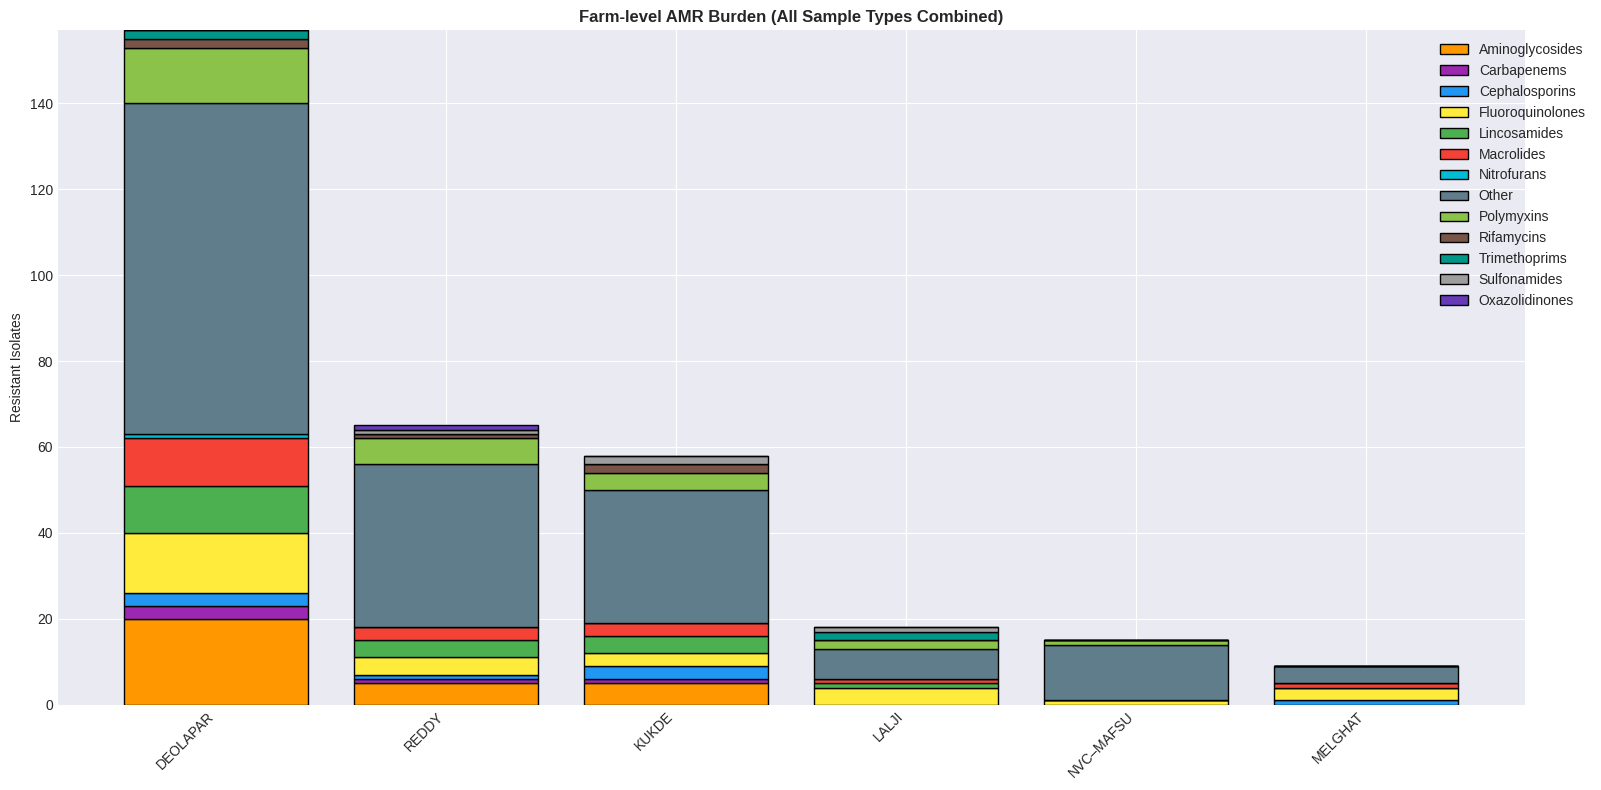

✓ DONE


In [ ]:
# ============================================================
# ONE HEALTH AMR VISUALIZATION – FINAL CLEANED VERSION
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. LOAD DATA
# ====================

def load_and_fix_excel(file_bytes, source_name, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source_name

    return df, start_idx, end_idx


def load_all_amr_data():
    datasets = {}

    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        datasets[src] = load_and_fix_excel(up[fname], src)

    human_df, start_idx, end_idx = datasets['Human']
    animal_df, _, _ = datasets['Animal']
    env_df, _, _ = datasets['Environment']

    return human_df, animal_df, env_df, start_idx, end_idx


# ====================
# 2. ANTIBIOTIC CLASS MAP
# ====================

ABX_KEYWORD_TO_CLASS = {
    "AMIKACIN": "Aminoglycosides",
    "GENTAMICIN": "Aminoglycosides",
    "IMIPENEM": "Carbapenems",
    "MEROPENEM": "Carbapenems",
    "CEFTRIAXONE": "Cephalosporins",
    "CEFOTAXIME": "Cephalosporins",
    "CIPROFLOXACIN": "Fluoroquinolones",
    "LEVOFLOXACIN": "Fluoroquinolones",
    "AZITHROMYCIN": "Macrolides",
    "ERYTHROMYCIN": "Macrolides",
    "AMPICILLIN": "Penicillins",
    "AMOXICILLIN": "Penicillins",
    "VANCOMYCIN": "Glycopeptides",
    "COLISTIN": "Polymyxins",
    "TETRACYCLINE": "Tetracyclines",
    "DOXYCYCLINE": "Tetracyclines",
    "CLINDAMYCIN": "Lincosamides",
    "LINEZOLID": "Oxazolidinones",
    "NITROFURANTOIN": "Nitrofurans",
    "RIFAMPICIN": "Rifamycins",
    "SULFAMETHOXAZOLE": "Sulfonamides",
    "TRIMETHOPRIM": "Trimethoprims",
    "AZTREONAM": "Monobactams"
}

def assign_class(ab):
    ab = str(ab).upper()
    for k, v in ABX_KEYWORD_TO_CLASS.items():
        if k in ab:
            return v
    return "Other"


# ====================
# 3. PROCESS DATA
# ====================

def process_amr_data(df, start_idx, end_idx):
    abx = df.iloc[:, start_idx:end_idx+1]
    abx = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

    loc_col = (
        'Farm Name' if 'Farm Name' in df.columns else
        'Sample Code' if 'Sample Code' in df.columns else
        'Source'
    )

    base = pd.concat([df[loc_col], df['Source'], abx], axis=1)

    long = base.melt(
        id_vars=[loc_col, 'Source'],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    long['Antibiotic Class'] = long['Antibiotic'].apply(assign_class)
    long[loc_col] = long[loc_col].astype(str).str.upper().str.strip()

    res = (
        long[long['Resistance Status'] == 'R']
        .groupby([loc_col, 'Source', 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
        .rename(columns={loc_col: 'Location'})
    )

    return res


# ====================
# 4. FARM NAME NORMALIZATION
# ====================

FARM_NAME_MAP = {
    'KUKDE FARM': 'KUKDE',
    'KUKDE': 'KUKDE',
    'DEOLAPAR FARM': 'DEOLAPAR',
    'DEOLAPAR FRAM': 'DEOLAPAR',
    'DEOLAPAR': 'DEOLAPAR',
    'LALJI FARM': 'LALJI',
    'LALJI': 'LALJI',
    'REDDY FARM': 'REDDY',
    'REDDY FRAM': 'REDDY',
    'REDDY': 'REDDY',
    'NVC FARM': 'NVC–MAFSU',
    'MAFSU': 'NVC–MAFSU'
}

REMOVE_LOCATIONS = {'R2.1M', 'NAN', '', 'NONE'}

def normalize_farms(df):
    df = df.copy()
    df['Location'] = df['Location'].replace(FARM_NAME_MAP)
    df = df[~df['Location'].isin(REMOVE_LOCATIONS)]
    return df


# ====================
# 5. FARM-LEVEL AGGREGATION
# ====================

def aggregate_by_farm(df):
    return (
        df.groupby(['Location', 'Antibiotic Class'], as_index=False)
        ['Resistant Count']
        .sum()
    )


# ====================
# 6. PLOT
# ====================

CLASS_COLORS = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Macrolides': '#F44336',
    'Penicillins': '#E91E63',
    'Glycopeptides': '#FF5722',
    'Polymyxins': '#8BC34A',
    'Tetracyclines': '#CDDC39',
    'Lincosamides': '#4CAF50',
    'Oxazolidinones': '#673AB7',
    'Nitrofurans': '#00BCD4',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Trimethoprims': '#009688',
    'Monobactams': '#9E9D24',
    'Other': '#607D8B'
}

def plot_stacked(df, title):
    locations = (
        df.groupby('Location')['Resistant Count']
        .sum()
        .sort_values(ascending=False)
        .index
    )

    classes = df['Antibiotic Class'].unique()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for cls in classes:
        sub = df[df['Antibiotic Class'] == cls]
        vals = [
            sub[sub['Location'] == loc]['Resistant Count'].sum()
            if loc in sub['Location'].values else 0
            for loc in locations
        ]

        plt.bar(
            x, vals, bottom=bottom,
            label=cls,
            color=CLASS_COLORS.get(cls, 'gray'),
            edgecolor='black'
        )
        bottom += np.array(vals)

    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Resistant Isolates")
    plt.title(title, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()


# ====================
# 7. MAIN
# ====================

human_df, animal_df, env_df, start_idx, end_idx = load_all_amr_data()

human_res = process_amr_data(human_df, start_idx, end_idx)
animal_res = process_amr_data(animal_df, start_idx, end_idx)
env_res = process_amr_data(env_df, start_idx, end_idx)

all_resistance = pd.concat(
    [human_res, animal_res, env_res],
    ignore_index=True
)

all_resistance = normalize_farms(all_resistance)

farm_level = aggregate_by_farm(all_resistance)

plot_stacked(
    farm_level,
    "Farm-level AMR Burden (All Sample Types Combined)"
)

print("✓ DONE")



Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (14).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (11).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (11).xlsx


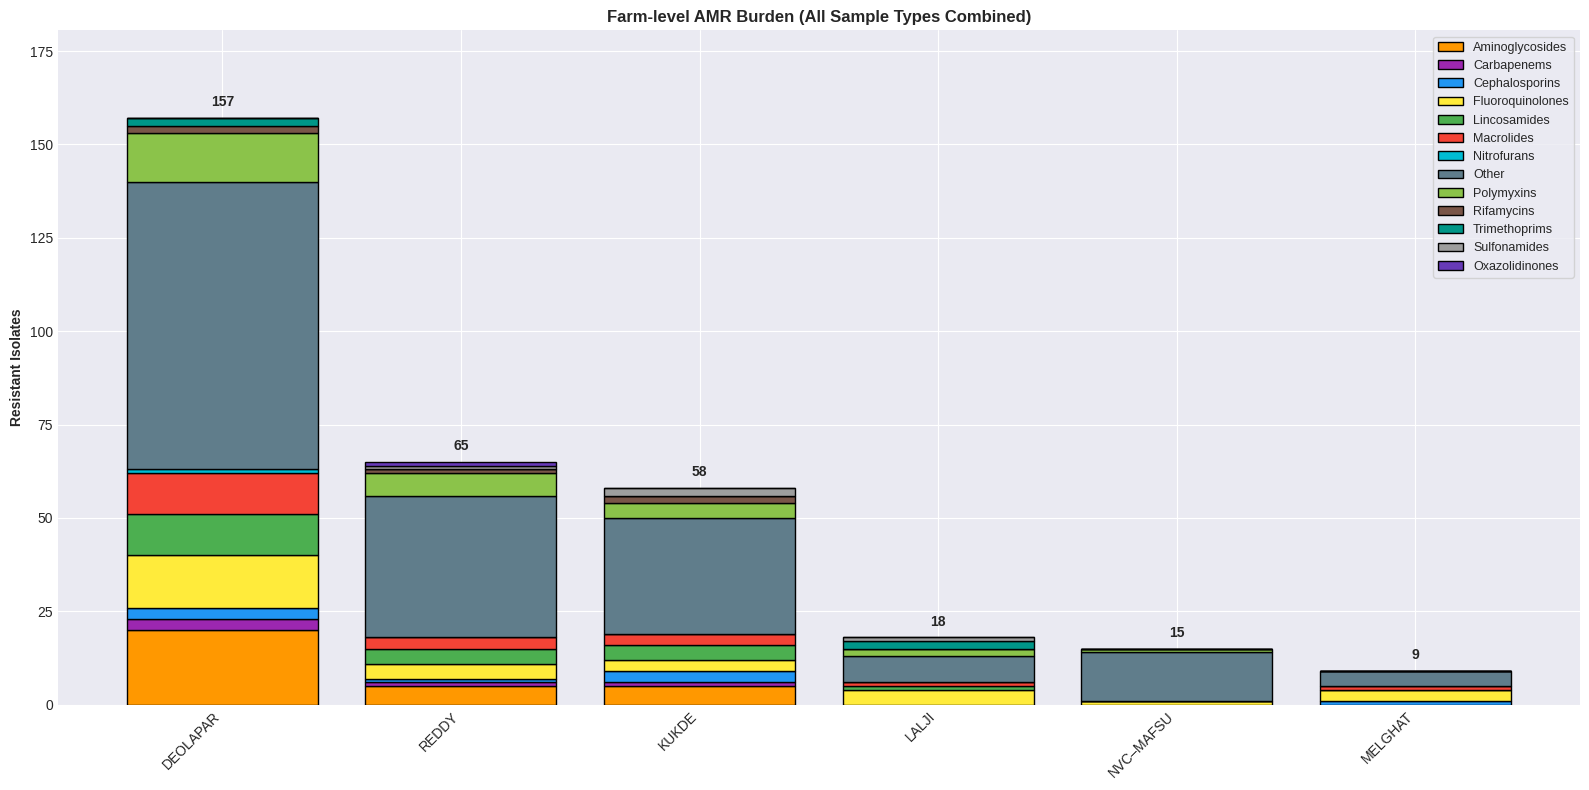

✓ DONE


In [ ]:
# ============================================================
# ONE HEALTH AMR VISUALIZATION – FINAL CLEANED VERSION
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. LOAD DATA
# ====================

def load_and_fix_excel(file_bytes, source_name, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source_name

    return df, start_idx, end_idx


def load_all_amr_data():
    datasets = {}

    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        datasets[src] = load_and_fix_excel(up[fname], src)

    human_df, start_idx, end_idx = datasets['Human']
    animal_df, _, _ = datasets['Animal']
    env_df, _, _ = datasets['Environment']

    return human_df, animal_df, env_df, start_idx, end_idx


# ====================
# 2. ANTIBIOTIC CLASS MAP
# ====================

ABX_KEYWORD_TO_CLASS = {
    "AMIKACIN": "Aminoglycosides",
    "GENTAMICIN": "Aminoglycosides",
    "IMIPENEM": "Carbapenems",
    "MEROPENEM": "Carbapenems",
    "CEFTRIAXONE": "Cephalosporins",
    "CEFOTAXIME": "Cephalosporins",
    "CIPROFLOXACIN": "Fluoroquinolones",
    "LEVOFLOXACIN": "Fluoroquinolones",
    "AZITHROMYCIN": "Macrolides",
    "ERYTHROMYCIN": "Macrolides",
    "AMPICILLIN": "Penicillins",
    "AMOXICILLIN": "Penicillins",
    "VANCOMYCIN": "Glycopeptides",
    "COLISTIN": "Polymyxins",
    "TETRACYCLINE": "Tetracyclines",
    "DOXYCYCLINE": "Tetracyclines",
    "CLINDAMYCIN": "Lincosamides",
    "LINEZOLID": "Oxazolidinones",
    "NITROFURANTOIN": "Nitrofurans",
    "RIFAMPICIN": "Rifamycins",
    "SULFAMETHOXAZOLE": "Sulfonamides",
    "TRIMETHOPRIM": "Trimethoprims",
    "AZTREONAM": "Monobactams"
}

def assign_class(ab):
    ab = str(ab).upper()
    for k, v in ABX_KEYWORD_TO_CLASS.items():
        if k in ab:
            return v
    return "Other"


# ====================
# 3. PROCESS DATA
# ====================

def process_amr_data(df, start_idx, end_idx):
    abx = df.iloc[:, start_idx:end_idx+1]
    abx = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

    loc_col = (
        'Farm Name' if 'Farm Name' in df.columns else
        'Sample Code' if 'Sample Code' in df.columns else
        'Source'
    )

    base = pd.concat([df[loc_col], df['Source'], abx], axis=1)

    long = base.melt(
        id_vars=[loc_col, 'Source'],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    long['Antibiotic Class'] = long['Antibiotic'].apply(assign_class)
    long[loc_col] = long[loc_col].astype(str).str.upper().str.strip()

    res = (
        long[long['Resistance Status'] == 'R']
        .groupby([loc_col, 'Source', 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
        .rename(columns={loc_col: 'Location'})
    )

    return res


# ====================
# 4. FARM NAME NORMALIZATION
# ====================

FARM_NAME_MAP = {
    'KUKDE FARM': 'KUKDE',
    'KUKDE': 'KUKDE',
    'DEOLAPAR FARM': 'DEOLAPAR',
    'DEOLAPAR FRAM': 'DEOLAPAR',
    'DEOLAPAR': 'DEOLAPAR',
    'LALJI FARM': 'LALJI',
    'LALJI': 'LALJI',
    'REDDY FARM': 'REDDY',
    'REDDY FRAM': 'REDDY',
    'REDDY': 'REDDY',
    'NVC FARM': 'NVC–MAFSU',
    'MAFSU': 'NVC–MAFSU'
}

REMOVE_LOCATIONS = {'R2.1M', 'NAN', '', 'NONE'}

def normalize_farms(df):
    df = df.copy()
    df['Location'] = df['Location'].replace(FARM_NAME_MAP)
    df = df[~df['Location'].isin(REMOVE_LOCATIONS)]
    return df


# ====================
# 5. FARM-LEVEL AGGREGATION
# ====================

def aggregate_by_farm(df):
    return (
        df.groupby(['Location', 'Antibiotic Class'], as_index=False)
        ['Resistant Count']
        .sum()
    )


# ====================
# 6. PLOT
# ====================

CLASS_COLORS = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Macrolides': '#F44336',
    'Penicillins': '#E91E63',
    'Glycopeptides': '#FF5722',
    'Polymyxins': '#8BC34A',
    'Tetracyclines': '#CDDC39',
    'Lincosamides': '#4CAF50',
    'Oxazolidinones': '#673AB7',
    'Nitrofurans': '#00BCD4',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Trimethoprims': '#009688',
    'Monobactams': '#9E9D24',
    'Other': '#607D8B'
}

def plot_stacked(df, title):
    locations = (
        df.groupby('Location')['Resistant Count']
        .sum()
        .sort_values(ascending=False)
        .index
    )

    classes = df['Antibiotic Class'].unique()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    totals = (
        df.groupby('Location')['Resistant Count']
        .sum()
        .reindex(locations)
        .values
    )

    plt.figure(figsize=(16, 8))

    for cls in classes:
        sub = df[df['Antibiotic Class'] == cls]
        vals = [
            sub[sub['Location'] == loc]['Resistant Count'].sum()
            if loc in sub['Location'].values else 0
            for loc in locations
        ]

        plt.bar(
            x, vals,
            bottom=bottom,
            label=cls,
            color=CLASS_COLORS.get(cls, 'gray'),
            edgecolor='black'
        )

        bottom += np.array(vals)

    # 🔹 ADD TOTAL LABELS ON TOP OF BARS
    for xi, total in zip(x, totals):
        if total > 0:
            plt.text(
                xi,
                total + max(totals) * 0.015,
                int(total),
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

    # 🔹 FIX Y-AXIS (AUTO BUFFER)
    ymax = max(totals) * 1.15
    plt.ylim(0, ymax)

    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Resistant Isolates", fontweight='bold')
    plt.title(title, fontweight='bold')

    # 🔹 LEGEND INSIDE PLOT AREA
    plt.legend(
        loc='upper right',
        fontsize=9,
        frameon=True
    )

    plt.tight_layout()
    plt.show()



# ====================
# 7. MAIN
# ====================

human_df, animal_df, env_df, start_idx, end_idx = load_all_amr_data()

human_res = process_amr_data(human_df, start_idx, end_idx)
animal_res = process_amr_data(animal_df, start_idx, end_idx)
env_res = process_amr_data(env_df, start_idx, end_idx)

all_resistance = pd.concat(
    [human_res, animal_res, env_res],
    ignore_index=True
)

all_resistance = normalize_farms(all_resistance)

farm_level = aggregate_by_farm(all_resistance)

plot_stacked(
    farm_level,
    "Farm-level AMR Burden (All Sample Types Combined)"
)

print("✓ DONE")


In [16]:
# Pick one farm and inspect raw counts
farm = "DEOLAPAR"

check = (
    all_resistance[all_resistance['Location'] == farm]
    .groupby('Antibiotic Class')['Resistant Count']
    .sum()
)

print(check)
print("TOTAL =", check.sum())


Antibiotic Class
Aminoglycosides     20
Carbapenems          3
Cephalosporins       3
Fluoroquinolones    14
Lincosamides        11
Macrolides          11
Nitrofurans          1
Other               77
Polymyxins          13
Rifamycins           2
Trimethoprims        2
Name: Resistant Count, dtype: int64
TOTAL = 157



Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (15).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (12).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (12).xlsx


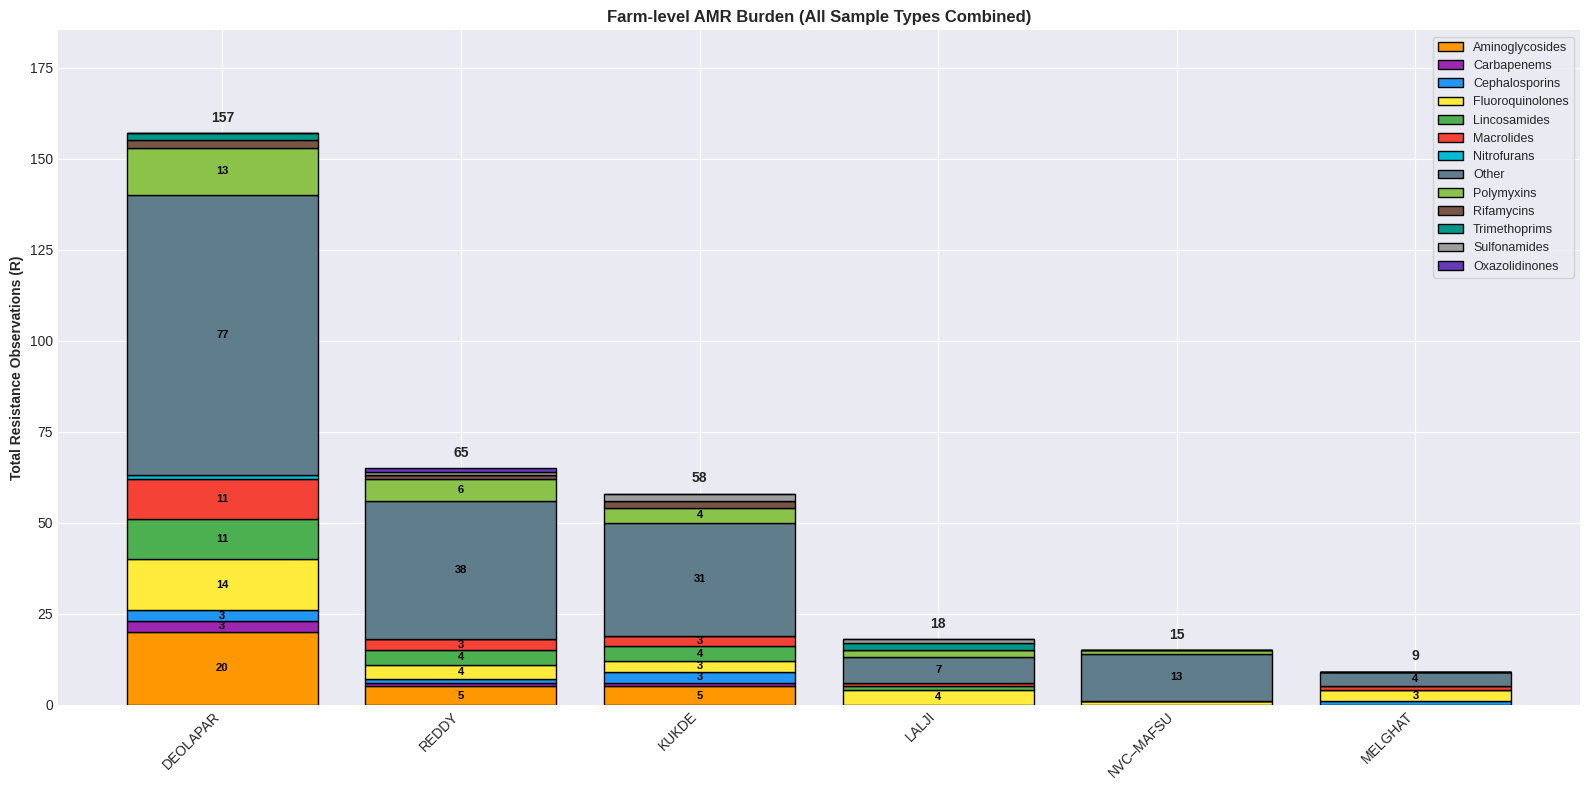

✓ DONE


In [17]:
# ============================================================
# ONE HEALTH AMR VISUALIZATION – FINAL CLEANED VERSION
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. LOAD DATA
# ====================

def load_and_fix_excel(file_bytes, source_name, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source_name

    return df, start_idx, end_idx


def load_all_amr_data():
    datasets = {}

    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        datasets[src] = load_and_fix_excel(up[fname], src)

    human_df, start_idx, end_idx = datasets['Human']
    animal_df, _, _ = datasets['Animal']
    env_df, _, _ = datasets['Environment']

    return human_df, animal_df, env_df, start_idx, end_idx


# ====================
# 2. ANTIBIOTIC CLASS MAP
# ====================

ABX_KEYWORD_TO_CLASS = {
    "AMIKACIN": "Aminoglycosides",
    "GENTAMICIN": "Aminoglycosides",
    "IMIPENEM": "Carbapenems",
    "MEROPENEM": "Carbapenems",
    "CEFTRIAXONE": "Cephalosporins",
    "CEFOTAXIME": "Cephalosporins",
    "CIPROFLOXACIN": "Fluoroquinolones",
    "LEVOFLOXACIN": "Fluoroquinolones",
    "AZITHROMYCIN": "Macrolides",
    "ERYTHROMYCIN": "Macrolides",
    "AMPICILLIN": "Penicillins",
    "AMOXICILLIN": "Penicillins",
    "VANCOMYCIN": "Glycopeptides",
    "COLISTIN": "Polymyxins",
    "TETRACYCLINE": "Tetracyclines",
    "DOXYCYCLINE": "Tetracyclines",
    "CLINDAMYCIN": "Lincosamides",
    "LINEZOLID": "Oxazolidinones",
    "NITROFURANTOIN": "Nitrofurans",
    "RIFAMPICIN": "Rifamycins",
    "SULFAMETHOXAZOLE": "Sulfonamides",
    "TRIMETHOPRIM": "Trimethoprims",
    "AZTREONAM": "Monobactams"
}

def assign_class(ab):
    ab = str(ab).upper()
    for k, v in ABX_KEYWORD_TO_CLASS.items():
        if k in ab:
            return v
    return "Other"


# ====================
# 3. PROCESS DATA
# ====================

def process_amr_data(df, start_idx, end_idx):
    abx = df.iloc[:, start_idx:end_idx+1]
    abx = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

    loc_col = (
        'Farm Name' if 'Farm Name' in df.columns else
        'Sample Code' if 'Sample Code' in df.columns else
        'Source'
    )

    base = pd.concat([df[loc_col], df['Source'], abx], axis=1)

    long = base.melt(
        id_vars=[loc_col, 'Source'],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    long['Antibiotic Class'] = long['Antibiotic'].apply(assign_class)
    long[loc_col] = long[loc_col].astype(str).str.upper().str.strip()

    res = (
        long[long['Resistance Status'] == 'R']
        .groupby([loc_col, 'Source', 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
        .rename(columns={loc_col: 'Location'})
    )

    return res


# ====================
# 4. FARM NAME NORMALIZATION
# ====================

FARM_NAME_MAP = {
    'KUKDE FARM': 'KUKDE',
    'KUKDE': 'KUKDE',
    'DEOLAPAR FARM': 'DEOLAPAR',
    'DEOLAPAR FRAM': 'DEOLAPAR',
    'DEOLAPAR': 'DEOLAPAR',
    'LALJI FARM': 'LALJI',
    'LALJI': 'LALJI',
    'REDDY FARM': 'REDDY',
    'REDDY FRAM': 'REDDY',
    'REDDY': 'REDDY',
    'NVC FARM': 'NVC–MAFSU',
    'MAFSU': 'NVC–MAFSU'
}

REMOVE_LOCATIONS = {'R2.1M', 'NAN', '', 'NONE'}

def normalize_farms(df):
    df = df.copy()
    df['Location'] = df['Location'].replace(FARM_NAME_MAP)
    df = df[~df['Location'].isin(REMOVE_LOCATIONS)]
    return df


# ====================
# 5. FARM-LEVEL AGGREGATION
# ====================

def aggregate_by_farm(df):
    return (
        df.groupby(['Location', 'Antibiotic Class'], as_index=False)
        ['Resistant Count']
        .sum()
    )


# ====================
# 6. PLOT
# ====================

CLASS_COLORS = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Macrolides': '#F44336',
    'Penicillins': '#E91E63',
    'Glycopeptides': '#FF5722',
    'Polymyxins': '#8BC34A',
    'Tetracyclines': '#CDDC39',
    'Lincosamides': '#4CAF50',
    'Oxazolidinones': '#673AB7',
    'Nitrofurans': '#00BCD4',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Trimethoprims': '#009688',
    'Monobactams': '#9E9D24',
    'Other': '#607D8B'
}

def plot_stacked(df, title):
    locations = (
        df.groupby('Location')['Resistant Count']
        .sum()
        .sort_values(ascending=False)
        .index
    )

    classes = df['Antibiotic Class'].unique()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    totals = (
        df.groupby('Location')['Resistant Count']
        .sum()
        .reindex(locations)
        .values
    )

    plt.figure(figsize=(16, 8))

    for cls in classes:
        sub = df[df['Antibiotic Class'] == cls]

        vals = [
            sub[sub['Location'] == loc]['Resistant Count'].sum()
            if loc in sub['Location'].values else 0
            for loc in locations
        ]

        bars = plt.bar(
            x,
            vals,
            bottom=bottom,
            label=cls,
            color=CLASS_COLORS.get(cls, 'gray'),
            edgecolor='black'
        )

        # 🔹 ADD CLASS COUNTS INSIDE STACKS
        for xi, yi, bi in zip(x, vals, bottom):
            if yi >= 3:  # threshold avoids clutter
                plt.text(
                    xi,
                    bi + yi / 2,
                    int(yi),
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold',
                    color='black'
                )

        bottom += np.array(vals)

    # 🔹 TOTAL ON TOP OF EACH BAR
    for xi, total in zip(x, totals):
        plt.text(
            xi,
            total + max(totals) * 0.015,
            int(total),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    # 🔹 Y-AXIS BUFFER
    plt.ylim(0, max(totals) * 1.18)

    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Total Resistance Observations (R)", fontweight='bold')
    plt.title(title, fontweight='bold')

    # 🔹 LEGEND INSIDE
    plt.legend(
        loc='upper right',
        fontsize=9,
        frameon=True
    )

    plt.tight_layout()
    plt.show()




# ====================
# 7. MAIN
# ====================

human_df, animal_df, env_df, start_idx, end_idx = load_all_amr_data()

human_res = process_amr_data(human_df, start_idx, end_idx)
animal_res = process_amr_data(animal_df, start_idx, end_idx)
env_res = process_amr_data(env_df, start_idx, end_idx)

all_resistance = pd.concat(
    [human_res, animal_res, env_res],
    ignore_index=True
)

all_resistance = normalize_farms(all_resistance)

farm_level = aggregate_by_farm(all_resistance)

plot_stacked(
    farm_level,
    "Farm-level AMR Burden (All Sample Types Combined)"
)

print("✓ DONE")



Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (16).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (13).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (13).xlsx


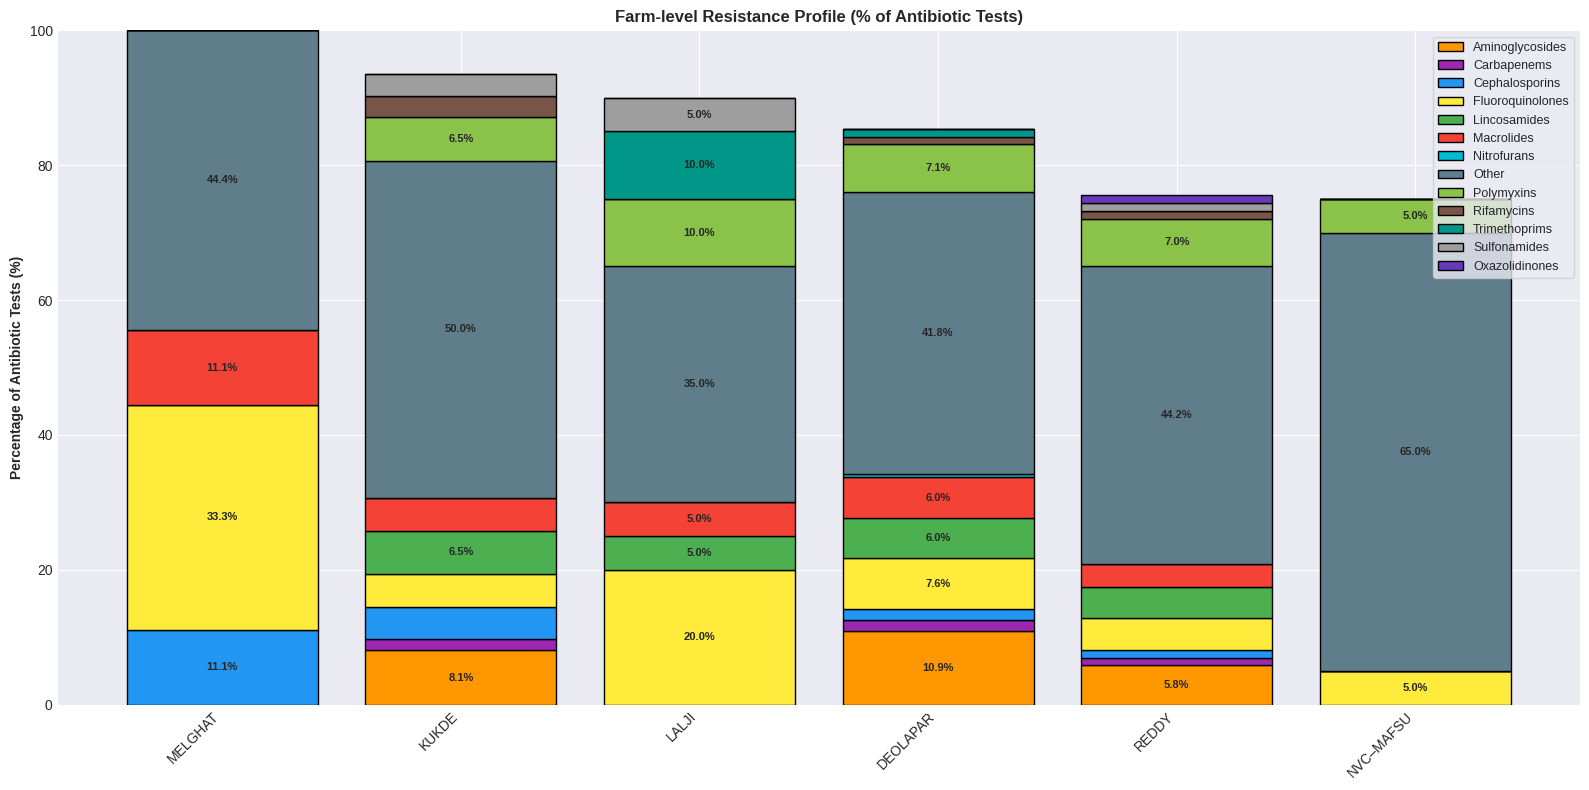

✓ COMPLETE – % resistance per farm generated


In [18]:
# ============================================================
# ONE HEALTH AMR – FARM-LEVEL % RESISTANCE (FINAL)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. LOAD & FIX EXCEL
# ====================

def load_and_fix_excel(file_bytes, source, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    # Fix antibiotic headers
    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source
    return df, start_idx, end_idx


def load_all_amr_data():
    data = {}
    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        data[src] = load_and_fix_excel(up[fname], src)

    human_df, start_idx, end_idx = data['Human']
    animal_df, _, _ = data['Animal']
    env_df, _, _ = data['Environment']

    return human_df, animal_df, env_df, start_idx, end_idx


# ====================
# 2. ANTIBIOTIC CLASSES
# ====================

ABX_KEYWORD_TO_CLASS = {
    "AMIKACIN": "Aminoglycosides",
    "GENTAMICIN": "Aminoglycosides",
    "IMIPENEM": "Carbapenems",
    "MEROPENEM": "Carbapenems",
    "CEFTRIAXONE": "Cephalosporins",
    "CEFOTAXIME": "Cephalosporins",
    "CIPROFLOXACIN": "Fluoroquinolones",
    "LEVOFLOXACIN": "Fluoroquinolones",
    "AZITHROMYCIN": "Macrolides",
    "ERYTHROMYCIN": "Macrolides",
    "AMPICILLIN": "Penicillins",
    "AMOXICILLIN": "Penicillins",
    "VANCOMYCIN": "Glycopeptides",
    "COLISTIN": "Polymyxins",
    "TETRACYCLINE": "Tetracyclines",
    "DOXYCYCLINE": "Tetracyclines",
    "CLINDAMYCIN": "Lincosamides",
    "LINEZOLID": "Oxazolidinones",
    "NITROFURANTOIN": "Nitrofurans",
    "RIFAMPICIN": "Rifamycins",
    "SULFAMETHOXAZOLE": "Sulfonamides",
    "TRIMETHOPRIM": "Trimethoprims",
    "AZTREONAM": "Monobactams"
}

def assign_class(name):
    name = str(name).upper()
    for k, v in ABX_KEYWORD_TO_CLASS.items():
        if k in name:
            return v
    return "Other"


# ====================
# 3. PROCESS DATA
# ====================

def process_amr_data(df, start_idx, end_idx):
    abx = df.iloc[:, start_idx:end_idx+1]
    abx = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

    loc_col = (
        'Farm Name' if 'Farm Name' in df.columns else
        'Sample Code' if 'Sample Code' in df.columns else
        'Source'
    )

    base = pd.concat([df[loc_col], df['Source'], abx], axis=1)

    long = base.melt(
        id_vars=[loc_col, 'Source'],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    long['Antibiotic Class'] = long['Antibiotic'].apply(assign_class)
    long[loc_col] = long[loc_col].astype(str).str.upper().str.strip()
    long = long.rename(columns={loc_col: 'Location'})

    return long


# ====================
# 4. FARM NORMALIZATION
# ====================

FARM_MAP = {
    'KUKDE FARM': 'KUKDE',
    'KUKDE': 'KUKDE',
    'DEOLAPAR FARM': 'DEOLAPAR',
    'DEOLAPAR FRAM': 'DEOLAPAR',
    'DEOLAPAR': 'DEOLAPAR',
    'REDDY FARM': 'REDDY',
    'REDDY FRAM': 'REDDY',
    'REDDY': 'REDDY',
    'LALJI FARM': 'LALJI',
    'LALJI': 'LALJI',
    'NVC FARM': 'NVC–MAFSU',
    'MAFSU': 'NVC–MAFSU'
}

REMOVE_LOCS = {'NAN', 'R2.1M', '', 'NONE'}

def normalize_farms(df):
    df = df.copy()
    df['Location'] = df['Location'].replace(FARM_MAP)
    df = df[~df['Location'].isin(REMOVE_LOCS)]
    return df


# ====================
# 5. % RESISTANCE CALCULATION
# ====================

def calculate_percent_resistance(long_df):
    # Total tests per farm (R + S + I)
    total_tests = (
        long_df
        .groupby('Location')['Resistance Status']
        .apply(lambda x: x.isin(['R','S','I']).sum())
        .rename('Total Tests')
        .reset_index()
    )

    # Resistant counts
    resistant = (
        long_df[long_df['Resistance Status'] == 'R']
        .groupby(['Location','Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
    )

    df = resistant.merge(total_tests, on='Location', how='left')
    df['Percent Resistance'] = df['Resistant Count'] / df['Total Tests'] * 100

    return df


# ====================
# 6. PLOTTING
# ====================

CLASS_COLORS = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Macrolides': '#F44336',
    'Penicillins': '#E91E63',
    'Glycopeptides': '#FF5722',
    'Polymyxins': '#8BC34A',
    'Tetracyclines': '#CDDC39',
    'Lincosamides': '#4CAF50',
    'Oxazolidinones': '#673AB7',
    'Nitrofurans': '#00BCD4',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Trimethoprims': '#009688',
    'Monobactams': '#9E9D24',
    'Other': '#607D8B'
}

def plot_stacked_percent(df, title):
    locations = (
        df.groupby('Location')['Percent Resistance']
        .sum()
        .sort_values(ascending=False)
        .index
    )

    classes = df['Antibiotic Class'].unique()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16,8))

    for cls in classes:
        sub = df[df['Antibiotic Class'] == cls]
        vals = [
            sub[sub['Location'] == loc]['Percent Resistance'].sum()
            if loc in sub['Location'].values else 0
            for loc in locations
        ]

        plt.bar(
            x, vals, bottom=bottom,
            label=cls,
            color=CLASS_COLORS.get(cls,'gray'),
            edgecolor='black'
        )

        for xi, yi, bi in zip(x, vals, bottom):
            if yi >= 5:
                plt.text(
                    xi, bi + yi/2,
                    f"{yi:.1f}%",
                    ha='center', va='center',
                    fontsize=8, fontweight='bold'
                )

        bottom += np.array(vals)

    plt.ylim(0,100)
    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Percentage of Antibiotic Tests (%)", fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.legend(loc='upper right', fontsize=9, frameon=True)
    plt.tight_layout()
    plt.show()


# ====================
# 7. MAIN EXECUTION
# ====================

human_df, animal_df, env_df, start_idx, end_idx = load_all_amr_data()

human_long = process_amr_data(human_df, start_idx, end_idx)
animal_long = process_amr_data(animal_df, start_idx, end_idx)
env_long = process_amr_data(env_df, start_idx, end_idx)

all_long = pd.concat([human_long, animal_long, env_long], ignore_index=True)
all_long = normalize_farms(all_long)

farm_percent = calculate_percent_resistance(all_long)

plot_stacked_percent(
    farm_percent,
    "Farm-level Resistance Profile (% of Antibiotic Tests)"
)

print("✓ COMPLETE – % resistance per farm generated")



Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (17).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (14).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (14).xlsx


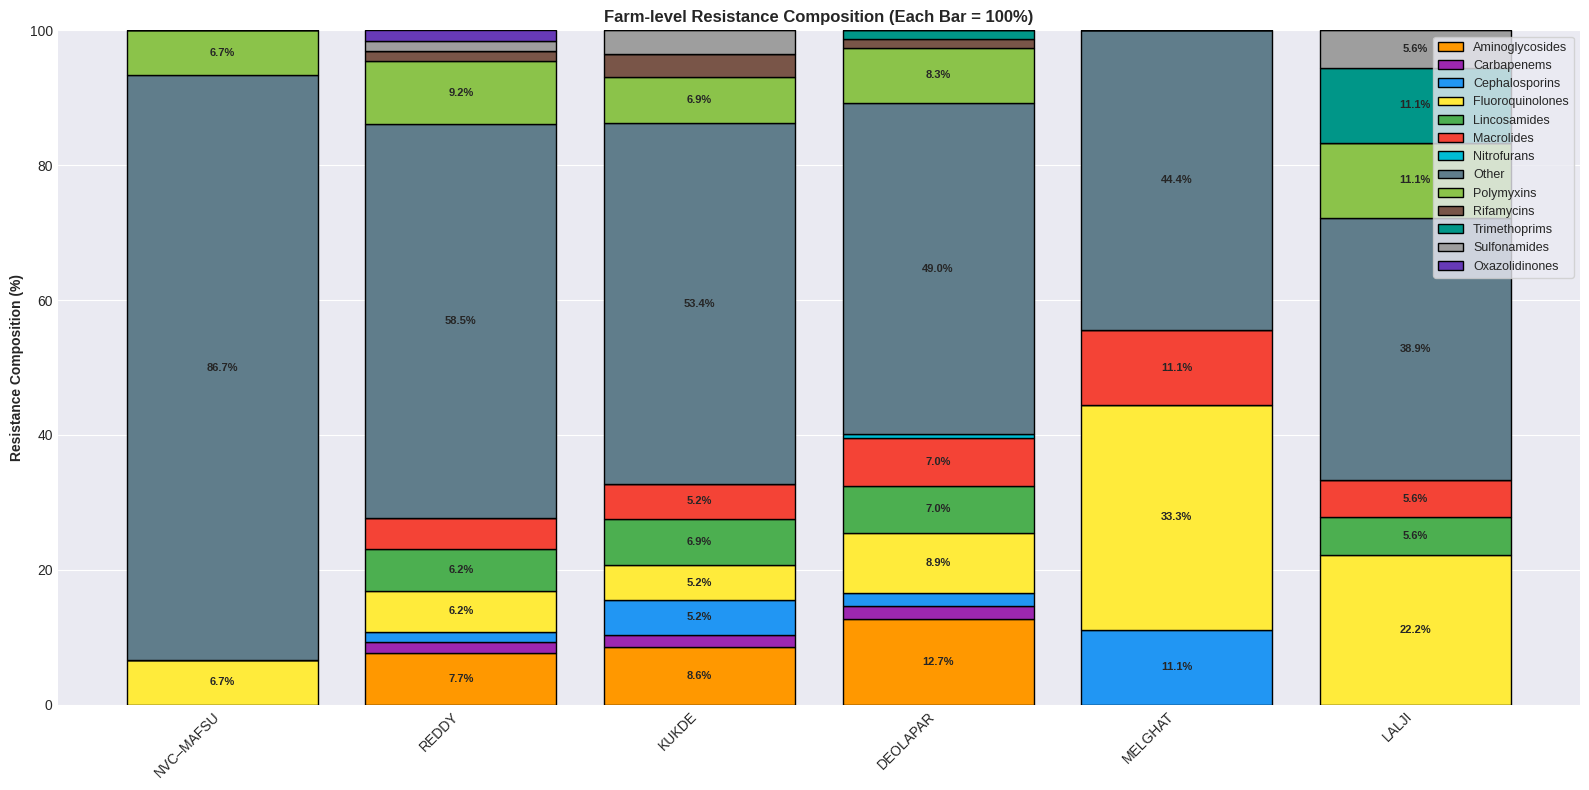

✓ COMPLETE – % resistance per farm generated


In [19]:
# ============================================================
# ONE HEALTH AMR – FARM-LEVEL % RESISTANCE (FINAL)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. LOAD & FIX EXCEL
# ====================

def load_and_fix_excel(file_bytes, source, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    # Fix antibiotic headers
    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source
    return df, start_idx, end_idx


def load_all_amr_data():
    data = {}
    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        data[src] = load_and_fix_excel(up[fname], src)

    human_df, start_idx, end_idx = data['Human']
    animal_df, _, _ = data['Animal']
    env_df, _, _ = data['Environment']

    return human_df, animal_df, env_df, start_idx, end_idx


# ====================
# 2. ANTIBIOTIC CLASSES
# ====================

ABX_KEYWORD_TO_CLASS = {
    "AMIKACIN": "Aminoglycosides",
    "GENTAMICIN": "Aminoglycosides",
    "IMIPENEM": "Carbapenems",
    "MEROPENEM": "Carbapenems",
    "CEFTRIAXONE": "Cephalosporins",
    "CEFOTAXIME": "Cephalosporins",
    "CIPROFLOXACIN": "Fluoroquinolones",
    "LEVOFLOXACIN": "Fluoroquinolones",
    "AZITHROMYCIN": "Macrolides",
    "ERYTHROMYCIN": "Macrolides",
    "AMPICILLIN": "Penicillins",
    "AMOXICILLIN": "Penicillins",
    "VANCOMYCIN": "Glycopeptides",
    "COLISTIN": "Polymyxins",
    "TETRACYCLINE": "Tetracyclines",
    "DOXYCYCLINE": "Tetracyclines",
    "CLINDAMYCIN": "Lincosamides",
    "LINEZOLID": "Oxazolidinones",
    "NITROFURANTOIN": "Nitrofurans",
    "RIFAMPICIN": "Rifamycins",
    "SULFAMETHOXAZOLE": "Sulfonamides",
    "TRIMETHOPRIM": "Trimethoprims",
    "AZTREONAM": "Monobactams"
}

def assign_class(name):
    name = str(name).upper()
    for k, v in ABX_KEYWORD_TO_CLASS.items():
        if k in name:
            return v
    return "Other"


# ====================
# 3. PROCESS DATA
# ====================

def process_amr_data(df, start_idx, end_idx):
    abx = df.iloc[:, start_idx:end_idx+1]
    abx = abx.astype(str).apply(lambda x: x.str.strip().str.upper())

    loc_col = (
        'Farm Name' if 'Farm Name' in df.columns else
        'Sample Code' if 'Sample Code' in df.columns else
        'Source'
    )

    base = pd.concat([df[loc_col], df['Source'], abx], axis=1)

    long = base.melt(
        id_vars=[loc_col, 'Source'],
        var_name='Antibiotic',
        value_name='Resistance Status'
    )

    long['Antibiotic Class'] = long['Antibiotic'].apply(assign_class)
    long[loc_col] = long[loc_col].astype(str).str.upper().str.strip()
    long = long.rename(columns={loc_col: 'Location'})

    return long


# ====================
# 4. FARM NORMALIZATION
# ====================

FARM_MAP = {
    'KUKDE FARM': 'KUKDE',
    'KUKDE': 'KUKDE',
    'DEOLAPAR FARM': 'DEOLAPAR',
    'DEOLAPAR FRAM': 'DEOLAPAR',
    'DEOLAPAR': 'DEOLAPAR',
    'REDDY FARM': 'REDDY',
    'REDDY FRAM': 'REDDY',
    'REDDY': 'REDDY',
    'LALJI FARM': 'LALJI',
    'LALJI': 'LALJI',
    'NVC FARM': 'NVC–MAFSU',
    'MAFSU': 'NVC–MAFSU'
}

REMOVE_LOCS = {'NAN', 'R2.1M', '', 'NONE'}

def normalize_farms(df):
    df = df.copy()
    df['Location'] = df['Location'].replace(FARM_MAP)
    df = df[~df['Location'].isin(REMOVE_LOCS)]
    return df


# ====================
# 5. % RESISTANCE CALCULATION
# ====================

def calculate_resistance_composition(long_df):
    """
    Convert resistant counts to % composition per farm.
    Each bar will sum to 100%.
    """

    resistant = (
        long_df[long_df['Resistance Status'] == 'R']
        .groupby(['Location', 'Antibiotic Class'])
        .size()
        .reset_index(name='Resistant Count')
    )

    totals = (
        resistant
        .groupby('Location')['Resistant Count']
        .sum()
        .rename('Total Resistant')
        .reset_index()
    )

    df = resistant.merge(totals, on='Location', how='left')

    df['Percent Composition'] = (
        df['Resistant Count'] / df['Total Resistant'] * 100
    )

    return df



# ====================
# 6. PLOTTING
# ====================

CLASS_COLORS = {
    'Aminoglycosides': '#FF9800',
    'Carbapenems': '#9C27B0',
    'Cephalosporins': '#2196F3',
    'Fluoroquinolones': '#FFEB3B',
    'Macrolides': '#F44336',
    'Penicillins': '#E91E63',
    'Glycopeptides': '#FF5722',
    'Polymyxins': '#8BC34A',
    'Tetracyclines': '#CDDC39',
    'Lincosamides': '#4CAF50',
    'Oxazolidinones': '#673AB7',
    'Nitrofurans': '#00BCD4',
    'Rifamycins': '#795548',
    'Sulfonamides': '#9E9E9E',
    'Trimethoprims': '#009688',
    'Monobactams': '#9E9D24',
    'Other': '#607D8B'
}

def plot_stacked_composition(df, title):
    locations = (
        df.groupby('Location')['Percent Composition']
        .sum()
        .sort_values(ascending=False)
        .index
    )

    classes = df['Antibiotic Class'].unique()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for cls in classes:
        sub = df[df['Antibiotic Class'] == cls]

        vals = [
            sub[sub['Location'] == loc]['Percent Composition'].sum()
            if loc in sub['Location'].values else 0
            for loc in locations
        ]

        plt.bar(
            x, vals,
            bottom=bottom,
            label=cls,
            color=CLASS_COLORS.get(cls, 'gray'),
            edgecolor='black'
        )

        # Label inside stacks
        for xi, yi, bi in zip(x, vals, bottom):
            if yi >= 5:
                plt.text(
                    xi,
                    bi + yi / 2,
                    f"{yi:.1f}%",
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom += np.array(vals)

    plt.ylim(0, 100)
    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Resistance Composition (%)", fontweight='bold')
    plt.title(title, fontweight='bold')

    plt.legend(loc='upper right', fontsize=9, frameon=True)
    plt.tight_layout()
    plt.show()



# ====================
# 7. MAIN EXECUTION
# ====================

human_df, animal_df, env_df, start_idx, end_idx = load_all_amr_data()

human_long = process_amr_data(human_df, start_idx, end_idx)
animal_long = process_amr_data(animal_df, start_idx, end_idx)
env_long = process_amr_data(env_df, start_idx, end_idx)

all_long = pd.concat([human_long, animal_long, env_long], ignore_index=True)
all_long = normalize_farms(all_long)

farm_composition = calculate_resistance_composition(all_long)

plot_stacked_composition(
    farm_composition,
    "Farm-level Resistance Composition (Each Bar = 100%)"
)

print("✓ COMPLETE – % resistance per farm generated")



Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (18).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (15).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (15).xlsx


/tmp/ipython-input-2203163009.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(data, ignore_index=True)


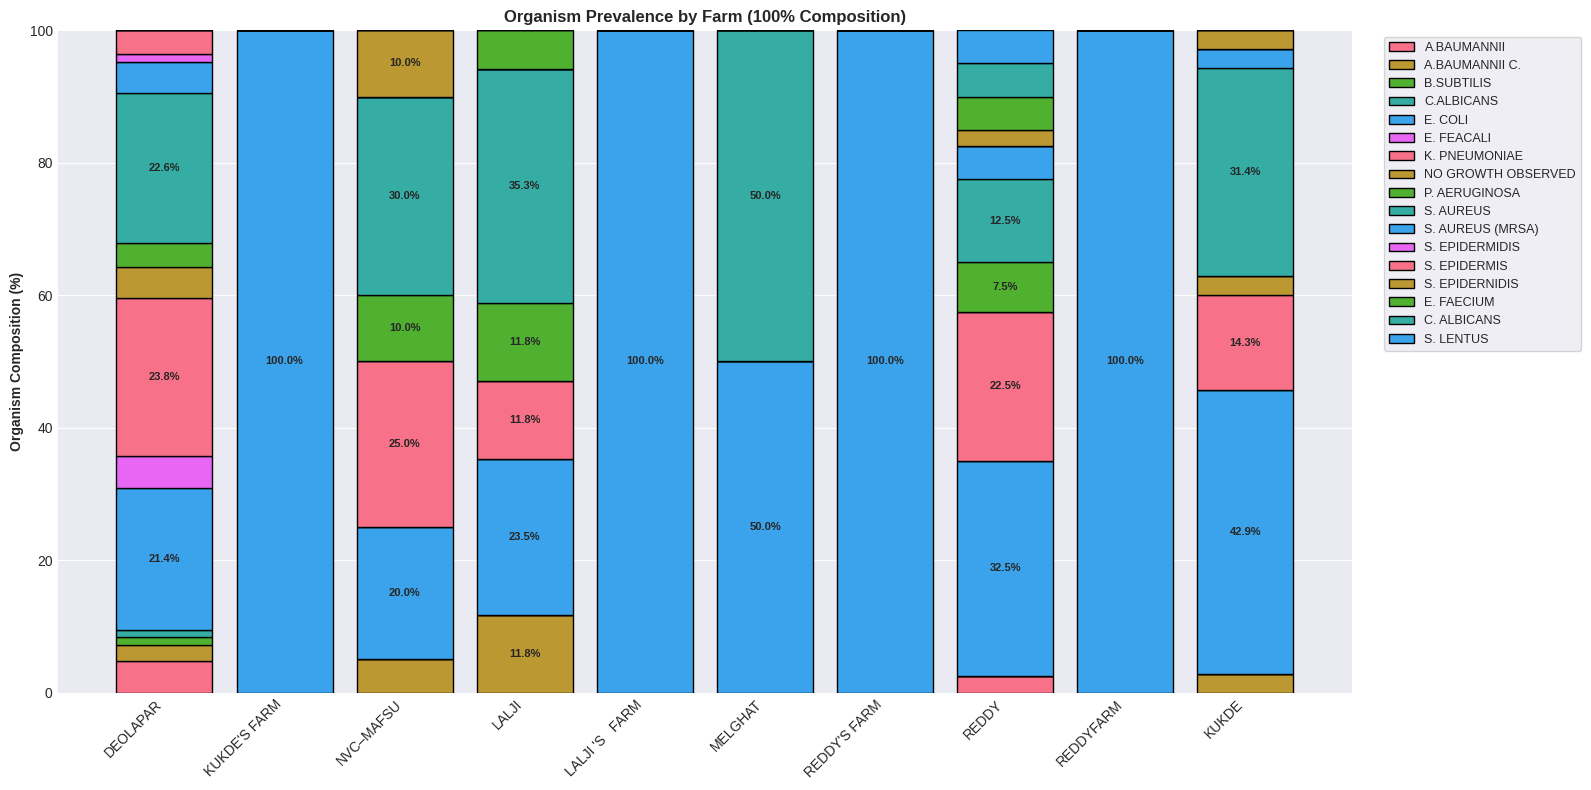

✓ COMPLETE – Organism prevalence plot generated


In [20]:
# ============================================================
# ORGANISM PREVALENCE BY FARM – 100% STACKED BAR (FINAL)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ====================
# 1. LOAD & FIX EXCEL
# ====================

def load_and_fix_excel(file_bytes, source, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    # Fix antibiotic headers (same structure as earlier)
    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source
    return df


def load_all_amr_data():
    data = []

    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        data.append(load_and_fix_excel(up[fname], src))

    return pd.concat(data, ignore_index=True)


# ====================
# 2. DETECT ORGANISM COLUMN
# ====================

def get_organism_column(df):
    for col in ['Pathogen', 'Organism', 'Bacteria']:
        if col in df.columns:
            return col
    raise ValueError(
        "No organism column found. Expected one of: Pathogen / Organism / Bacteria"
    )


# ====================
# 3. FARM NAME NORMALIZATION
# ====================

FARM_MAP = {
    'KUKDE FARM': 'KUKDE',
    'KUKDE': 'KUKDE',
    'DEOLAPAR FARM': 'DEOLAPAR',
    'DEOLAPAR FRAM': 'DEOLAPAR',
    'DEOLAPAR': 'DEOLAPAR',
    'REDDY FARM': 'REDDY',
    'REDDY FRAM': 'REDDY',
    'REDDY': 'REDDY',
    'LALJI FARM': 'LALJI',
    'LALJI': 'LALJI',
    'NVC FARM': 'NVC–MAFSU',
    'MAFSU': 'NVC–MAFSU'
}

REMOVE_LOCS = {'NAN', 'R2.1M', '', 'NONE'}

def normalize_farms(df):
    df = df.copy()
    df['Location'] = df['Location'].replace(FARM_MAP)
    df = df[~df['Location'].isin(REMOVE_LOCS)]
    return df


# ====================
# 4. ORGANISM COMPOSITION CALCULATION
# ====================

def calculate_organism_composition(df):
    """
    Calculate organism prevalence per farm.
    Each farm sums to 100%.
    """

    org_col = get_organism_column(df)

    # Identify location column
    if 'Farm Name' in df.columns:
        loc_col = 'Farm Name'
    elif 'Sample Code' in df.columns:
        loc_col = 'Sample Code'
    else:
        raise ValueError("No Farm Name or Sample Code column found")

    df = df.copy()

    df['Location'] = (
        df[loc_col]
        .astype(str)
        .str.upper()
        .str.strip()
    )

    df[org_col] = (
        df[org_col]
        .astype(str)
        .str.upper()
        .str.strip()
    )

    df = normalize_farms(df)

    counts = (
        df.groupby(['Location', org_col])
        .size()
        .reset_index(name='Isolate Count')
    )

    totals = (
        counts
        .groupby('Location')['Isolate Count']
        .sum()
        .rename('Total Isolates')
        .reset_index()
    )

    comp = counts.merge(totals, on='Location', how='left')
    comp['Percent'] = comp['Isolate Count'] / comp['Total Isolates'] * 100

    comp = comp.rename(columns={org_col: 'Organism'})
    return comp


# ====================
# 5. PLOTTING
# ====================

def plot_organism_composition(df, title):
    locations = (
        df.groupby('Location')['Percent']
        .sum()
        .sort_values(ascending=False)
        .index
    )

    organisms = df['Organism'].unique()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for org in organisms:
        sub = df[df['Organism'] == org]

        vals = [
            sub[sub['Location'] == loc]['Percent'].sum()
            if loc in sub['Location'].values else 0
            for loc in locations
        ]

        plt.bar(
            x, vals,
            bottom=bottom,
            label=org,
            edgecolor='black'
        )

        # Label meaningful segments only
        for xi, yi, bi in zip(x, vals, bottom):
            if yi >= 7:
                plt.text(
                    xi,
                    bi + yi / 2,
                    f"{yi:.1f}%",
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom += np.array(vals)

    plt.ylim(0, 100)
    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Organism Composition (%)", fontweight='bold')
    plt.title(title, fontweight='bold')

    plt.legend(
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        fontsize=9,
        frameon=True
    )

    plt.tight_layout()
    plt.show()


# ====================
# 6. MAIN EXECUTION
# ====================

all_data = load_all_amr_data()

organism_comp = calculate_organism_composition(all_data)

plot_organism_composition(
    organism_comp,
    "Organism Prevalence by Farm (100% Composition)"
)

print("✓ COMPLETE – Organism prevalence plot generated")


In [31]:
# ============================================================
# ORGANISM PREVALENCE BY FARM (FILTERED + MERGED)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

# ====================
# 1. LOAD DATA
# ====================

def load_and_fix_excel(file_bytes, source, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source
    return df


def load_all_amr_data():
    dfs = []
    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        dfs.append(load_and_fix_excel(up[fname], src))
    return pd.concat(dfs, ignore_index=True)


# ====================
# 2. FARM NORMALIZATION
# ====================

FARM_MAP = {
    # DEOLAPAR
    'DEOLAPAR': 'DEOLAPAR',
    'DEOLAPAR FARM': 'DEOLAPAR',
    'DEOLAPAR FRAM': 'DEOLAPAR',

    # LALJI
    'LALJI': 'LALJI',
    'LALJI FARM': 'LALJI',
    "LALJI'S FARM": 'LALJI',

    # KUKDE
    'KUKDE': 'KUKDE',
    'KUKDE FARM': 'KUKDE',
    "KUKDE'S FARM": 'KUKDE',

    # REDDY
    'REDDY': 'REDDY',
    'REDDY FARM': 'REDDY',
    "REDDY'S FARM": 'REDDY',
    'REDDYFARM': 'REDDY',

    # NVC / MAFSU
    'NVC FARM': 'NVC–MAFSU',
    'MAFSU': 'NVC–MAFSU'
}

REMOVE_LOCS = {'NAN', 'NONE', '', 'R2.1M'}


def normalize_farms(df, loc_col):
    df = df.copy()

    df['Location'] = (
        df[loc_col]
        .astype(str)
        .str.upper()
        .str.strip()
        .replace(FARM_MAP)
    )

    df = df[~df['Location'].isin(REMOVE_LOCS)]
    return df



# ====================
# 3. ORGANISM HANDLING
# ====================

FOCUS_ORGANISMS = {
    'E. COLI',
    'K. PNEUMONIAE',
    'S. AUREUS',
    'S. AUREUS (MRSA)',
    'S. PNEUMONIAE',
    'A. BAUMANNII',
    'P. AERUGINOSA',
    'NO GROWTH'
}

def normalize_organism(name):
    name = str(name).upper().strip()
    return name if name in FOCUS_ORGANISMS else 'OTHERS'


def get_organism_column(df):
    for col in ['Pathogen', 'Organism', 'Bacteria']:
        if col in df.columns:
            return col
    raise ValueError("No organism column found")


# ====================
# 4. CALCULATE COMPOSITION
# ====================

def calculate_organism_composition(df):
    org_col = get_organism_column(df)

    loc_col = (
        'Farm Name' if 'Farm Name' in df.columns else
        'Sample Code' if 'Sample Code' in df.columns else
        None
    )
    if loc_col is None:
        raise ValueError("No location column found")

    import re

def normalize_farms(df, loc_col):
    """
    Robust farm name normalization using pattern rules.
    This collapses ALL Lalji / Deolapar / Kukde / Reddy variants.
    """

    def canon(name):
        name = str(name).upper().strip()

        # remove punctuation
        name = re.sub(r"[’'`]", "", name)

        # collapse whitespace
        name = re.sub(r"\s+", " ", name)

        if re.search(r"\bLALJI\b", name):
            return "LALJI"

        if re.search(r"\bDEOLAPAR\b", name):
            return "DEOLAPAR"

        if re.search(r"\bKUKDE\b", name):
            return "KUKDE"

        if re.search(r"\bREDDY\b", name):
            return "REDDY"

        if re.search(r"\b(NVC|MAFSU)\b", name):
            return "NVC–MAFSU"

        return name  # fallback for unknown farms

    df = df.copy()

    df["Location"] = (
        df[loc_col]
        .astype(str)
        .apply(canon)
    )

    # remove junk
    df = df[~df["Location"].isin({"NAN", "NONE", "", "R2.1M"})]

    return df




# ====================
# 5. PLOT
# ====================

def plot_organism_composition(df, title):
    """
    Plot 100% stacked bar chart of organism composition per farm.
    Expects columns: Location, Organism, Percent
    """

    if df is None or df.empty:
        raise ValueError("plot_organism_composition received empty/None dataframe")

    # Order farms
    locations = (
        df.groupby('Location')['Percent']
        .sum()
        .sort_values(ascending=False)
        .index
        .tolist()
    )

    organisms = df['Organism'].unique().tolist()

    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))  # <-- MUST exist before loop

    plt.figure(figsize=(16, 8))

    for org in organisms:
        sub = df[df['Organism'] == org]

        vals = [
            sub.loc[sub['Location'] == loc, 'Percent'].sum()
            for loc in locations
        ]

        plt.bar(
            x,
            vals,
            bottom=bottom,
            label=org,
            edgecolor='black'
        )

        # Label segments
        for xi, yi, bi in zip(x, vals, bottom):
            if yi >= 7:
                plt.text(
                    xi,
                    bi + yi / 2,
                    f"{yi:.1f}%",
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom = bottom + np.array(vals)  # <-- explicit reassignment (safe)

    plt.ylim(0, 100)
    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Organism Composition (%)", fontweight='bold')
    plt.title(title, fontweight='bold')

    plt.legend(
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        fontsize=9,
        frameon=True
    )

    plt.tight_layout()
    plt.show()



# ====================
# 6. MAIN
# ====================

all_data = load_all_amr_data()

organism_comp = calculate_organism_composition(all_data)

plot_organism_composition(
    organism_comp,
    "Organism Prevalence by Farm (Focused Organisms, 100% Composition)"
)

print("✓ DONE")



Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (22).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (19).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (19).xlsx


/tmp/ipython-input-1643797982.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True)


ValueError: plot_organism_composition received empty/None dataframe

In [32]:
print(all_data.columns.tolist())
print(all_data.head(3))


['Sr. No', 'Sample Code', 'Name', 'Mobile number', 'Follow up (Yes/No)', 'Age', 'Gender', 'Farm Name', 'Latitude', 'Longitude', 'Date of Sample Collection', 'Name of Data Collector', 'Processing centre', 'Pathogen', 'RESISTANT ', 'Amoxycillin/Clavulanic acid', 'Piperacillin/Tazobactum', 'Cefuroxime', 'Cefuroxime Axetil', 'Ceftriaxone', 'Cefoperazone/Sulbactum', 'Cefepime', 'Entrapenum', 'Imipenum', 'Meropenem', 'Amikacin', 'Gentamicin', 'Ciprofloxacin', 'Tigecycline', 'Fosfomycin', 'Colistin', 'Trimethoprim/Sulfmaethozole', 'Beta-lactamase', 'Cefoxitin', 'Benzylpenicillin', 'Oxacillin', 'Gentamicin High Level (synergy)', 'Gentamycin', 'Levofloxacin', 'Induciable Clindamycin Resistance', 'Erythromycin', 'Clindamycin', 'Linezolid', 'Daptomycin', 'Teicoplanin', 'Vanomycin', 'Tetracyclin', 'Nitrofurantoin', 'Rifampicin', 'Trimethoprim/Sulfamethoxazole', 'Cefoxitin Screen', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Source', 'sample type ', 'List of Antimicrograms', 'Unnamed: 12', 'Unnam


Upload Human AMR Excel file:


Saving Human Samples.xlsx to Human Samples (27).xlsx

Upload Animal AMR Excel file:


Saving Animal Samples.xlsx to Animal Samples (24).xlsx

Upload Environment AMR Excel file:


Saving Enviormental Samples.xlsx to Enviormental Samples (24).xlsx


/tmp/ipython-input-1663843621.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True)


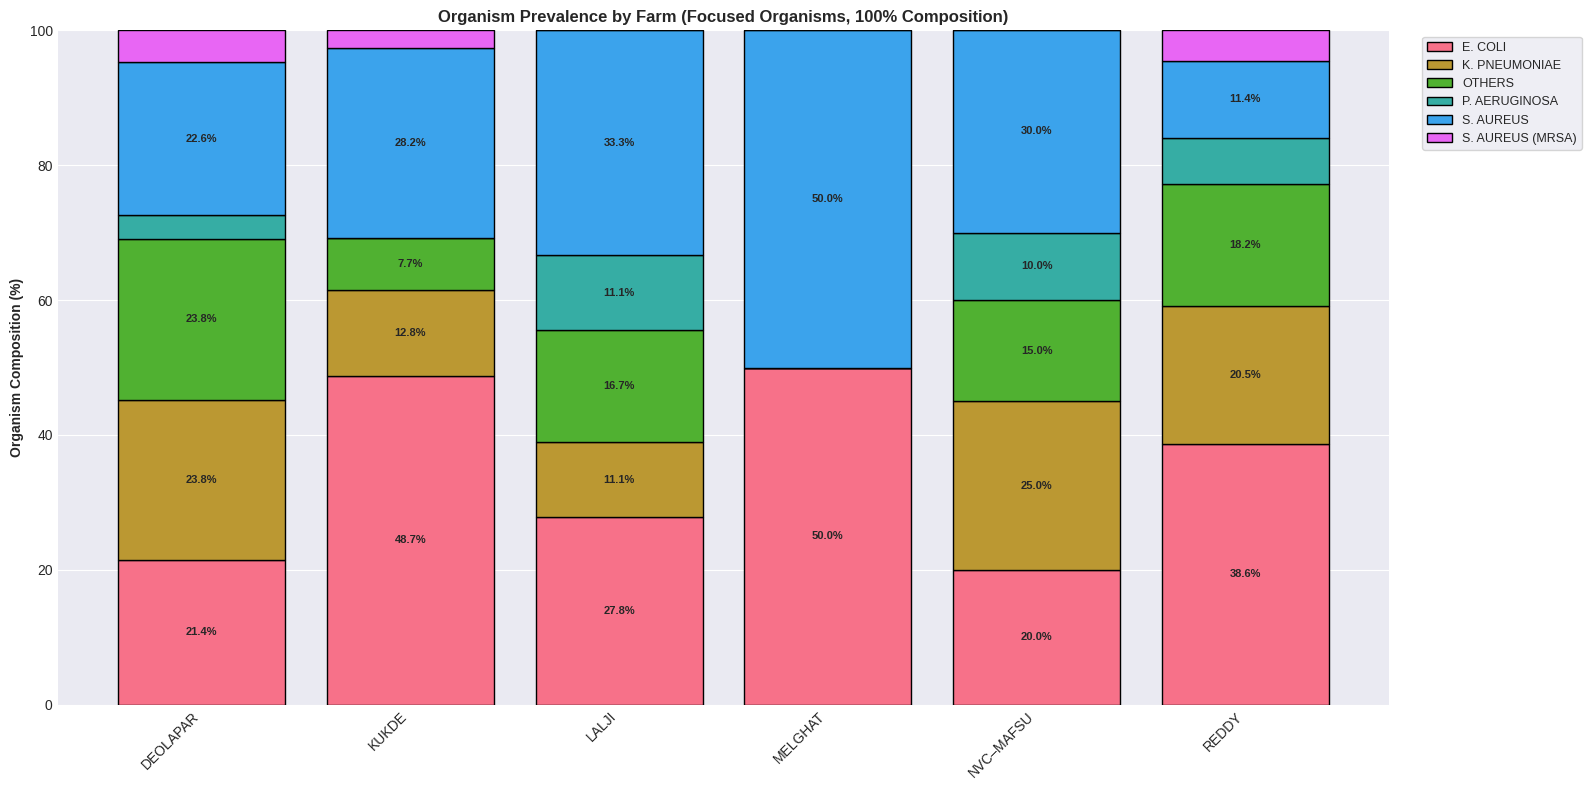

✓ COMPLETE – organism prevalence plot generated successfully


In [37]:
# ============================================================
# ORGANISM PREVALENCE BY FARM – FINAL STABLE VERSION
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
import re

# ====================
# 1. LOAD DATA
# ====================

def load_and_fix_excel(file_bytes, source, start_idx=15, end_idx=50):
    df = pd.read_excel(io.BytesIO(file_bytes))

    # Fix antibiotic headers (structure preserved)
    abx_row = df.iloc[0, start_idx:end_idx+1]
    cols = list(df.columns)
    cols[start_idx:end_idx+1] = abx_row.tolist()
    df.columns = cols

    df = df.drop(index=0).reset_index(drop=True)
    df['Source'] = source
    return df


def load_all_amr_data():
    dfs = []
    for src in ['Human', 'Animal', 'Environment']:
        print(f"\nUpload {src} AMR Excel file:")
        up = files.upload()
        fname = list(up.keys())[0]
        dfs.append(load_and_fix_excel(up[fname], src))
    return pd.concat(dfs, ignore_index=True)


# ====================
# 2. ROBUST FARM NORMALIZATION (FINAL FIX)
# ====================

def normalize_farms(df, loc_col):
    """
    Canonicalize farm names and REMOVE NaN / RM2 1M early.
    """

    def canon(name):
        if pd.isna(name):
            return None

        name = str(name).upper()

        # remove punctuation and normalize spaces
        name = re.sub(r"[’'`]", "", name)
        name = re.sub(r"[^A-Z0-9 ]", " ", name)
        name = re.sub(r"\s+", " ", name).strip()

        # explicit junk removal
        if name in {"NAN", "RM2 1M", "R2 1M", ""}:
            return None

        if "LALJI" in name:
            return "LALJI"
        if "DEOLAPAR" in name:
            return "DEOLAPAR"
        if "KUKDE" in name:
            return "KUKDE"
        if "REDDY" in name:
            return "REDDY"
        if "NVC" in name or "MAFSU" in name:
            return "NVC–MAFSU"
        if "MELGHAT" in name:
            return "MELGHAT"

        return name

    df = df.copy()
    df["Location"] = df[loc_col].apply(canon)

    # 🔴 DROP NaN / R2 1M rows HERE
    df = df[df["Location"].notna()]

    return df




# ====================
# 3. ORGANISM HANDLING
# ====================

FOCUS_ORGANISMS = {
    'E. COLI',
    'K. PNEUMONIAE',
    'S. AUREUS',
    'S. AUREUS (MRSA)',
    'S. PNEUMONIAE',
    'A. BAUMANNII',
    'P. AERUGINOSA',
    'NO GROWTH'
}

def normalize_organism(name):
    name = str(name).upper().strip()
    return name if name in FOCUS_ORGANISMS else 'OTHERS'


def detect_organism_column(df):
    for col in ['Pathogen', 'Organism', 'Bacteria']:
        if col in df.columns:
            return col
    raise ValueError("No organism column found (Pathogen / Organism / Bacteria)")


# ====================
# 4. ORGANISM COMPOSITION (BULLETPROOF)
# ====================

def calculate_organism_composition(df):
    """
    Returns organism composition per farm (each farm = 100%).
    Never returns empty silently.
    """

    if df is None or df.empty:
        raise ValueError("Input dataframe is empty")

    org_col = detect_organism_column(df)

    if 'Farm Name' in df.columns:
        loc_col = 'Farm Name'
    elif 'Sample Code' in df.columns:
        loc_col = 'Sample Code'
    else:
        raise ValueError("No Farm Name or Sample Code column found")

    # Normalize farms
    df = normalize_farms(df, loc_col)

    if df.empty:
        raise RuntimeError("All rows removed after farm normalization")

    # Normalize organisms
    df['Organism'] = (
        df[org_col]
        .fillna('UNKNOWN')
        .astype(str)
        .apply(normalize_organism)
    )

    counts = (
        df.groupby(['Location', 'Organism'])
        .size()
        .reset_index(name='Isolate Count')
    )

    if counts.empty:
        raise RuntimeError("No organism counts produced")

    totals = (
        counts.groupby('Location')['Isolate Count']
        .sum()
        .reset_index(name='Total')
    )

    comp = counts.merge(totals, on='Location', how='left')
    comp['Percent'] = comp['Isolate Count'] / comp['Total'] * 100

    return comp


# ====================
# 5. PLOTTING (100% STACKED)
# ====================

def plot_organism_composition(df, title):
    if df is None or df.empty:
        raise ValueError("plot_organism_composition received empty/None dataframe")

    locations = (
        df.groupby('Location')['Percent']
        .sum()
        .sort_values(ascending=False)
        .index
        .tolist()
    )

    organisms = df['Organism'].unique().tolist()
    x = np.arange(len(locations))
    bottom = np.zeros(len(locations))

    plt.figure(figsize=(16, 8))

    for org in organisms:
        sub = df[df['Organism'] == org]

        vals = [
            sub.loc[sub['Location'] == loc, 'Percent'].sum()
            for loc in locations
        ]

        plt.bar(
            x,
            vals,
            bottom=bottom,
            label=org,
            edgecolor='black'
        )

        for xi, yi, bi in zip(x, vals, bottom):
            if yi >= 7:
                plt.text(
                    xi,
                    bi + yi / 2,
                    f"{yi:.1f}%",
                    ha='center',
                    va='center',
                    fontsize=8,
                    fontweight='bold'
                )

        bottom = bottom + np.array(vals)

    plt.ylim(0, 100)
    plt.xticks(x, locations, rotation=45, ha='right')
    plt.ylabel("Organism Composition (%)", fontweight='bold')
    plt.title(title, fontweight='bold')

    plt.legend(
        bbox_to_anchor=(1.02, 1),
        loc='upper left',
        fontsize=9,
        frameon=True
    )

    plt.tight_layout()
    plt.show()


# ====================
# 6. MAIN EXECUTION
# ====================

all_data = load_all_amr_data()

organism_comp = calculate_organism_composition(all_data)

plot_organism_composition(
    organism_comp,
    "Organism Prevalence by Farm (Focused Organisms, 100% Composition)"
)

print("✓ COMPLETE – organism prevalence plot generated successfully")
